In [31]:
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv('./data/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movie_titles = pd.read_csv("./data/Movie_Id_Titles.txt")

In [33]:
df['date'] = pd.to_datetime(df['timestamp'], unit="s")

In [34]:
#df.groupby(by=['user_id'])
a = df.sort_values(by=['user_id', 'date'])

In [35]:
u1 = a[a['user_id'] == 1]

In [36]:
u1['session'] = (u1['timestamp'] - u1['timestamp'].shift(1) > 60*20).fillna(0).cumsum(skipna=False)

/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
u1['rating'] = 0.5*(u1['rating'] - 3)

/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
u1

,user_id,item_id,rating,timestamp,date,session
59972,1,168,1.0,874965478,1997-09-22 21:57:58,0
92487,1,172,1.0,874965478,1997-09-22 21:57:58,0
74577,1,165,1.0,874965518,1997-09-22 21:58:38,0
48214,1,156,0.5,874965556,1997-09-22 21:59:16,0
15764,1,196,1.0,874965677,1997-09-22 22:01:17,0
22971,1,166,1.0,874965677,1997-09-22 22:01:17,0
21626,1,187,0.5,874965678,1997-09-22 22:01:18,0
9170,1,14,1.0,874965706,1997-09-22 22:01:46,0
12948,1,250,0.5,874965706,1997-09-22 22:01:46,0
53552,1,127,1.0,874965706,1997-09-22 22:01:46,0


In [51]:
!ls data

ml-100k  ml-100k.zip  Movie_Id_Titles.txt  u.data  u.item


In [124]:
movie_info = pd.read_csv('./data/u.item', sep='|', encoding="ISO-8859-1", names=['idx', 'title', 'date', 'x', 'link', *range(19)])

In [68]:
df['rating_bin'] = df['rating'] > 3

In [95]:
from collections import defaultdict
#  current_consecutive = { user : { 'pos' : , 'neg' : } }
#  ratings_pos = { 'n_pos' : [ratings] }
#  ratings_neg = { 'n_neg' : [ratings] }
current_consecutive = {}
rating_pos = defaultdict(list)
rating_neg = defaultdict(list)

for i, row in df.sort_values('timestamp').iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    rating  = row['rating']
    ispositive = row['rating'] > 3
    
    if user_id not in current_consecutive:
        current_consecutive[user_id] = {
            'pos' : 0,
            'neg' : 0,
        }
    
    user = current_consecutive[user_id]
    
    if user['pos'] > 0:
        rating_pos[user['pos']].append(rating)
    if user['neg'] > 0:
        rating_neg[user['neg']].append(rating)
    
    if ispositive:
        if user['pos'] > 0:
            user['pos'] += 1
        else:
            user['pos'] = 1
            user['neg'] = 0        
    else:
        if user['neg'] > 0:
            user['neg'] += 1
        else:
            user['neg'] = 1
            user['pos'] = 0

In [99]:
import matplotlib.pylab as plt
%matplotlib inline

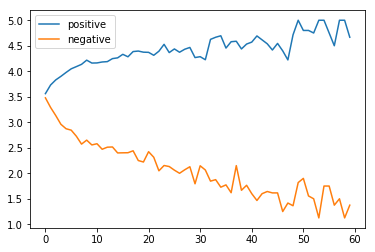

In [110]:
n = 60
plt.plot([ np.mean(v) for k, v in rating_pos.items()][:n], label='positive')
plt.plot([ np.mean(v) for k, v in rating_neg.items()][:n], label='negative')
plt.legend();

In [111]:
df = pd.read_csv('./data/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [117]:
N = df.shape[0]
split = int(0.8*N)
train, test = df.sort_values('timestamp')[:split], df.sort_values('timestamp')[split:] 

In [119]:
train.user_id.nunique()

751

In [120]:
test.user_id.nunique()

301

In [122]:
df.user_id.nunique()

943

In [123]:
df.item_id.nunique()

1682

In [133]:
movie_info = pd.read_csv('./data/u.item', sep='|', encoding="ISO-8859-1", names=['idx', 'title', 'date', 'x', 'link', *range(19)])
movie_info.set_index('idx', inplace=True)
movie_info.drop(columns=['x', 'link'], inplace=True)

In [137]:
all_ratings = df.copy()

In [138]:
from sklearn.model_selection import train_test_split

train_ratings, test_ratings = train_test_split(all_ratings, test_size=0.2, random_state=0)

user_id_train = train_ratings['user_id']
item_id_train = train_ratings['item_id']
rating_train = train_ratings['rating']

user_id_test = test_ratings['user_id']
item_id_test = test_ratings['item_id']
rating_test = test_ratings['rating']

In [150]:
from surprise import Dataset, Reader, accuracy


reader = Reader(rating_scale=(1, 5))
train_spr = Dataset.load_from_df(train_ratings[['user_id','item_id','rating']],reader).build_full_trainset()
test_spr = Dataset.load_from_df(test_ratings[['user_id','item_id','rating']],reader).build_full_trainset()
test_spr = test_spr.build_testset()

In [151]:
from surprise import SVD
algo = SVD(n_factors=100, biased=False) # 100 dim PMF

In [152]:
algo.fit(train_spr)

In [153]:
print('user embeddings shape = ' , algo.pu.shape)
print('item embeddings shape = ' , algo.qi.shape)

user embeddings shape =  (943, 100)
item embeddings shape =  (1639, 100)


In [154]:
predictions = algo.test(test_spr)
accuracy.rmse(predictions), accuracy.mae(predictions)

RMSE: 0.9489
MAE:  0.7480


(0.948940681493232, 0.74803714929463)

In [164]:
train_spr.ur[0]

[(0, 5.0),
 (33, 1.0),
 (76, 3.0),
 (613, 3.0),
 (85, 3.0),
 (162, 3.0),
 (870, 3.0),
 (257, 4.0),
 (627, 2.0),
 (587, 4.0),
 (154, 3.0),
 (89, 3.0),
 (315, 4.0),
 (380, 3.0),
 (336, 4.0),
 (565, 3.0),
 (77, 4.0),
 (539, 5.0),
 (504, 3.0),
 (230, 4.0),
 (365, 2.0),
 (36, 3.0),
 (48, 2.0),
 (1100, 3.0),
 (207, 3.0),
 (239, 4.0),
 (13, 4.0),
 (40, 4.0),
 (936, 2.0),
 (351, 3.0),
 (496, 4.0),
 (569, 4.0),
 (372, 4.0),
 (298, 4.0),
 (481, 4.0),
 (306, 4.0),
 (205, 3.0),
 (473, 3.0),
 (628, 5.0),
 (450, 3.0),
 (53, 4.0),
 (1479, 3.0),
 (295, 4.0),
 (244, 3.0),
 (784, 3.0),
 (4, 4.0),
 (499, 4.0),
 (23, 3.0),
 (928, 4.0),
 (464, 3.0),
 (546, 3.0),
 (312, 4.0),
 (62, 4.0),
 (1, 5.0),
 (630, 4.0),
 (27, 3.0),
 (368, 4.0),
 (311, 4.0),
 (360, 4.0),
 (434, 3.0),
 (881, 3.0),
 (721, 2.0),
 (185, 3.0),
 (135, 5.0),
 (632, 2.0),
 (14, 5.0),
 (359, 3.0),
 (502, 4.0),
 (558, 2.0),
 (715, 4.0),
 (1566, 3.0),
 (41, 4.0),
 (887, 2.0),
 (160, 4.0),
 (489, 3.0),
 (321, 2.0),
 (331, 4.0),
 (354, 3.0),
 (69

In [187]:
algo.predict(5, 5)

Prediction(uid=5, iid=5, r_ui=None, est=2.809535147506899, details={'was_impossible': False})

In [174]:
algo.qi.shape

(1639, 100)

In [ ]:
['session'] = (u1['timestamp'] - u1['timestamp'].shift(1) > 60*20).fillna(0).cumsum(skipna=False)

In [179]:
sorted_all_ratings = all_ratings.sort_values('timestamp')

def enum_sessions(x):
    return ((x['timestamp'] - x['timestamp']).shift(1) > 60*20).fillna(0).cumsum(skipna=True)

sorted_all_ratings.groupby('user_id').apply(enum_sessions)

user_id       
1        59972    0
         92487    0
         74577    0
         48214    0
         22971    0
         15764    0
         21626    0
         9170     0
         12948    0
         53552    0
         38193    0
         972      0
         40519    0
         32236    0
         20470    0
         38751    0
         10480    0
         45796    0
         24896    0
         1382     0
         8844     0
         31376    0
         16673    0
         77073    0
         85557    0
         60926    0
         51616    0
         22669    0
         70539    0
         4974     0
                 ..
943      67975    0
         98422    0
         75307    0
         95132    0
         87976    0
         91550    0
         92183    0
         95187    0
         94825    0
         98466    0
         81212    0
         74200    0
         78704    0
         96489    0
         95893    0
         86600    0
         73651    0
         99979    0
     

In [183]:
#train_ratings.sort_values(['timestamp', 'user_id'])

In [564]:
import gym 
from collections import namedtuple, defaultdict
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, accuracy, SVD
from sklearn.model_selection import train_test_split
from gym.utils import seeding

Interaction = namedtuple('Interaction', ['t', 'uid', 'recs', 'rewards', 'probs', 'best_ps', 'ranks'])

class MovieLens(gym.Env):
    def __init__(self):
        self.embedding_dimension = 20
        self.n_rec = 1
        self.seed(0)
        
        self.df = pd.read_csv('./data/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
        
        self.train_ratings, self.test_ratings = train_test_split(self.df, test_size=0.2, random_state=0)

        reader = Reader(rating_scale=(1, 5))
        train_spr = Dataset.load_from_df(self.train_ratings[['user_id','item_id','rating']],reader).build_full_trainset()
        test_spr = Dataset.load_from_df(self.test_ratings[['user_id','item_id','rating']],reader).build_full_trainset()
        test_spr = test_spr.build_testset()
        
        self.algo = SVD(n_factors=self.embedding_dimension, biased=False)
        self.algo.fit(train_spr)
        
        self.users = self.algo.pu[:40]
        self.items = self.algo.qi[:500]
        self.n_users = len(self.users)
        self.n_items = len(self.items)
        
        self.active_uid = self.np_random.choice(range(self.n_users))
        
        self.bought_items = defaultdict(set)
        
        # logs
        self.steps_count = 0
        self.interactions = []
        
    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]
            
    def _get_observation(self):
        pos = 0
        self.item_pos2id = {}
        possible_items = []
        
        for i in set(range(self.n_items)) - self.bought_items[self.active_uid]:
            possible_items.append(self.items[i])
            
            self.item_pos2id[pos] = i
            pos += 1
        
        user_repr = self.users[self.active_uid]
        return (np.array(user_repr), np.array(possible_items))
        
    
    def _reward(self, action):
        assert len(action) == self.n_rec
        uid = self.active_uid
        rewards = []
        for a in action:
            iid = self.item_pos2id[a]
            
            r = self.algo.estimate(u=uid, i=iid)
            
            # normalize [-1, 1]
            r = 0.5*(r-3)
            
            rewards.append(r)
            
            self.bought_items[uid].add(iid)
        
        self.interactions.append(Interaction(t=self.steps_count,
                                             uid=uid,
                                             recs=action,
                                             rewards=rewards,
                                             probs=None,
                                             best_ps=None,
                                             ranks=None))
        
        return np.sum(rewards)
    
    def _evolve(self):
        
        users_to_play = []
        for i in range(self.n_users):
            if len(self.bought_items[i]) < (self.n_items - self.n_rec):
                users_to_play.append(i)
                
        self.active_uid = self.np_random.choice(users_to_play)
        
    def step(self, action):
        self.steps_count += 1
        reward = self._reward(action)
        
        self._evolve()
        observation = self._get_observation()
        done = None
        info = None
        #print(len(observation[1]))
        return observation, reward, done, info

    def reset(self):
        observation = self._get_observation()
        return observation


In [565]:
base_env = MovieLens()

In [566]:
base_env.embedding_dimension

20

In [580]:
import tensorflow as tf 
from agents.ddpg import DDPGAgent
from rec_gym.runner import run_experiment
from copy import deepcopy

In [581]:
env = deepcopy(base_env)
tf.reset_default_graph()
sess = tf.InteractiveSession()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = DDPGAgent(action_size = action_size,
                 state_dim = state_dim,
                 action_dim = action_dim,
                 gamma = .9,
                 sess = sess,
                 optimizer = tf.train.AdamOptimizer(
                     learning_rate=0.01
                 ),
                 max_tf_checkpoints_to_keep = 3,
                 experience_size = 300,
                 per = True,
                 batch_size = 64, 
                 start_steps = 400)

/home/anton/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [582]:
n_train = 8000

In [583]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=n_train, t_test=0)




  0%|          | 0/8000 [00:00<?, ?it/s]/media/anton/0b9d5a44-bb63-4de1-9cfe-0da47b81e88a/TPT/3A/PRIM Vente Privee/rec_gym/agents/utils.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  max_weight = (p_min * n) ** (-self.PER_b)



  1%|          | 64/8000 [00:00<00:24, 329.84it/s]


  1%|          | 74/8000 [00:00<01:20, 98.91it/s] 


  1%|          | 82/8000 [00:01<01:53, 69.97it/s]


  1%|          | 88/8000 [00:01<02:15, 58.35it/s]


  1%|          | 93/8000 [00:01<02:30, 52.39it/s]


  1%|          | 97/8000 [00:01<02:42, 48.52it/s]


  1%|▏         | 101/8000 [00:02<02:52, 45.71it/s]


  1%|▏         | 104/8000 [00:02<03:00, 43.75it/s]


  1%|▏         | 107/8000 [00:02<03:06, 42.28it/s]


  1%|▏         | 110/8000 [00:02<03:12, 40.92it/s]


  1%|▏         | 113/8000 [00:02<03:19, 39.60it/s]


  1%|▏         | 116/8000 [00:03<03:24, 38.48it/s]


  1%|▏         | 119/8000 [00:03<03:30, 37.39it/s]


  2%|▏         | 121/8000 [00:03<03:34, 36.73it/s]


  2%|▏ 

  4%|▍         | 356/8000 [00:16<05:55, 21.49it/s]


  4%|▍         | 358/8000 [00:16<05:55, 21.48it/s]


  4%|▍         | 360/8000 [00:16<05:56, 21.46it/s]


  5%|▍         | 362/8000 [00:16<05:56, 21.44it/s]


  5%|▍         | 364/8000 [00:16<05:56, 21.42it/s]


  5%|▍         | 367/8000 [00:17<05:56, 21.41it/s]


  5%|▍         | 369/8000 [00:17<05:56, 21.38it/s]


  5%|▍         | 371/8000 [00:17<05:57, 21.36it/s]


  5%|▍         | 373/8000 [00:17<05:57, 21.35it/s]


  5%|▍         | 375/8000 [00:17<05:57, 21.33it/s]


  5%|▍         | 377/8000 [00:17<05:57, 21.31it/s]


  5%|▍         | 379/8000 [00:17<05:58, 21.27it/s]


  5%|▍         | 381/8000 [00:17<05:58, 21.24it/s]


  5%|▍         | 383/8000 [00:18<05:59, 21.20it/s]


  5%|▍         | 385/8000 [00:18<05:59, 21.16it/s]


  5%|▍         | 387/8000 [00:18<06:00, 21.12it/s]


  5%|▍         | 389/8000 [00:18<06:00, 21.10it/s]


  5%|▍         | 391/8000 [00:18<06:01, 21.05it/s]


  5%|▍         | 393/8000 [00:18<06:01, 21.02i

  8%|▊         | 626/8000 [00:32<06:17, 19.53it/s]


  8%|▊         | 628/8000 [00:32<06:17, 19.52it/s]


  8%|▊         | 630/8000 [00:32<06:17, 19.51it/s]


  8%|▊         | 632/8000 [00:32<06:17, 19.50it/s]


  8%|▊         | 634/8000 [00:32<06:17, 19.49it/s]


  8%|▊         | 636/8000 [00:32<06:17, 19.48it/s]


  8%|▊         | 638/8000 [00:32<06:17, 19.48it/s]


  8%|▊         | 640/8000 [00:32<06:18, 19.47it/s]


  8%|▊         | 642/8000 [00:32<06:18, 19.46it/s]


  8%|▊         | 644/8000 [00:33<06:18, 19.45it/s]


  8%|▊         | 646/8000 [00:33<06:18, 19.44it/s]


  8%|▊         | 648/8000 [00:33<06:18, 19.43it/s]


  8%|▊         | 650/8000 [00:33<06:18, 19.42it/s]


  8%|▊         | 652/8000 [00:33<06:18, 19.42it/s]


  8%|▊         | 654/8000 [00:33<06:18, 19.41it/s]


  8%|▊         | 656/8000 [00:33<06:18, 19.40it/s]


  8%|▊         | 658/8000 [00:33<06:19, 19.37it/s]


  8%|▊         | 660/8000 [00:34<06:19, 19.34it/s]


  8%|▊         | 662/8000 [00:34<06:19, 19.31i

 11%|█         | 890/8000 [00:48<06:31, 18.17it/s]


 11%|█         | 892/8000 [00:49<06:31, 18.17it/s]


 11%|█         | 894/8000 [00:49<06:31, 18.17it/s]


 11%|█         | 896/8000 [00:49<06:30, 18.17it/s]


 11%|█         | 898/8000 [00:49<06:30, 18.17it/s]


 11%|█▏        | 900/8000 [00:49<06:30, 18.17it/s]


 11%|█▏        | 902/8000 [00:49<06:30, 18.17it/s]


 11%|█▏        | 904/8000 [00:49<06:30, 18.17it/s]


 11%|█▏        | 906/8000 [00:49<06:30, 18.17it/s]


 11%|█▏        | 908/8000 [00:49<06:30, 18.17it/s]


 11%|█▏        | 910/8000 [00:50<06:30, 18.17it/s]


 11%|█▏        | 912/8000 [00:50<06:30, 18.17it/s]


 11%|█▏        | 914/8000 [00:50<06:30, 18.17it/s]


 11%|█▏        | 916/8000 [00:50<06:30, 18.16it/s]


 11%|█▏        | 918/8000 [00:50<06:30, 18.16it/s]


 12%|█▏        | 920/8000 [00:50<06:29, 18.16it/s]


 12%|█▏        | 922/8000 [00:50<06:29, 18.15it/s]


 12%|█▏        | 924/8000 [00:50<06:29, 18.15it/s]


 12%|█▏        | 926/8000 [00:51<06:29, 18.15i

 14%|█▍        | 1150/8000 [01:03<06:20, 18.01it/s]


 14%|█▍        | 1152/8000 [01:03<06:20, 18.01it/s]


 14%|█▍        | 1154/8000 [01:04<06:20, 18.01it/s]


 14%|█▍        | 1156/8000 [01:04<06:20, 18.00it/s]


 14%|█▍        | 1158/8000 [01:04<06:20, 18.00it/s]


 14%|█▍        | 1160/8000 [01:04<06:20, 18.00it/s]


 15%|█▍        | 1162/8000 [01:04<06:19, 18.00it/s]


 15%|█▍        | 1164/8000 [01:04<06:19, 18.00it/s]


 15%|█▍        | 1166/8000 [01:04<06:19, 17.99it/s]


 15%|█▍        | 1168/8000 [01:04<06:19, 17.99it/s]


 15%|█▍        | 1170/8000 [01:05<06:19, 17.99it/s]


 15%|█▍        | 1172/8000 [01:05<06:19, 17.99it/s]


 15%|█▍        | 1174/8000 [01:05<06:19, 17.99it/s]


 15%|█▍        | 1176/8000 [01:05<06:19, 17.99it/s]


 15%|█▍        | 1178/8000 [01:05<06:19, 17.99it/s]


 15%|█▍        | 1180/8000 [01:05<06:19, 17.99it/s]


 15%|█▍        | 1182/8000 [01:05<06:19, 17.99it/s]


 15%|█▍        | 1184/8000 [01:05<06:18, 17.99it/s]


 15%|█▍        | 1186/8000 [

 18%|█▊        | 1411/8000 [01:18<06:07, 17.92it/s]


 18%|█▊        | 1413/8000 [01:18<06:07, 17.92it/s]


 18%|█▊        | 1415/8000 [01:18<06:07, 17.92it/s]


 18%|█▊        | 1417/8000 [01:19<06:07, 17.92it/s]


 18%|█▊        | 1419/8000 [01:19<06:07, 17.92it/s]


 18%|█▊        | 1421/8000 [01:19<06:07, 17.93it/s]


 18%|█▊        | 1423/8000 [01:19<06:06, 17.93it/s]


 18%|█▊        | 1425/8000 [01:19<06:06, 17.93it/s]


 18%|█▊        | 1427/8000 [01:19<06:06, 17.93it/s]


 18%|█▊        | 1429/8000 [01:19<06:06, 17.92it/s]


 18%|█▊        | 1431/8000 [01:19<06:06, 17.92it/s]


 18%|█▊        | 1433/8000 [01:19<06:06, 17.92it/s]


 18%|█▊        | 1435/8000 [01:20<06:06, 17.92it/s]


 18%|█▊        | 1437/8000 [01:20<06:06, 17.92it/s]


 18%|█▊        | 1439/8000 [01:20<06:06, 17.92it/s]


 18%|█▊        | 1441/8000 [01:20<06:05, 17.92it/s]


 18%|█▊        | 1443/8000 [01:20<06:05, 17.92it/s]


 18%|█▊        | 1445/8000 [01:20<06:05, 17.92it/s]


 18%|█▊        | 1447/8000 [

 21%|██        | 1672/8000 [01:33<05:54, 17.85it/s]


 21%|██        | 1674/8000 [01:33<05:54, 17.85it/s]


 21%|██        | 1676/8000 [01:33<05:54, 17.85it/s]


 21%|██        | 1678/8000 [01:33<05:54, 17.85it/s]


 21%|██        | 1680/8000 [01:34<05:54, 17.85it/s]


 21%|██        | 1682/8000 [01:34<05:53, 17.85it/s]


 21%|██        | 1684/8000 [01:34<05:53, 17.85it/s]


 21%|██        | 1686/8000 [01:34<05:53, 17.85it/s]


 21%|██        | 1688/8000 [01:34<05:53, 17.85it/s]


 21%|██        | 1690/8000 [01:34<05:53, 17.85it/s]


 21%|██        | 1692/8000 [01:34<05:53, 17.85it/s]


 21%|██        | 1694/8000 [01:34<05:53, 17.85it/s]


 21%|██        | 1696/8000 [01:35<05:53, 17.84it/s]


 21%|██        | 1698/8000 [01:35<05:53, 17.84it/s]


 21%|██▏       | 1700/8000 [01:35<05:53, 17.84it/s]


 21%|██▏       | 1702/8000 [01:35<05:52, 17.84it/s]


 21%|██▏       | 1704/8000 [01:35<05:52, 17.84it/s]


 21%|██▏       | 1706/8000 [01:35<05:52, 17.84it/s]


 21%|██▏       | 1708/8000 [

 24%|██▍       | 1932/8000 [01:48<05:40, 17.80it/s]


 24%|██▍       | 1934/8000 [01:48<05:40, 17.80it/s]


 24%|██▍       | 1936/8000 [01:48<05:40, 17.80it/s]


 24%|██▍       | 1938/8000 [01:48<05:40, 17.80it/s]


 24%|██▍       | 1940/8000 [01:49<05:40, 17.80it/s]


 24%|██▍       | 1942/8000 [01:49<05:40, 17.80it/s]


 24%|██▍       | 1944/8000 [01:49<05:40, 17.80it/s]


 24%|██▍       | 1946/8000 [01:49<05:40, 17.80it/s]


 24%|██▍       | 1948/8000 [01:49<05:40, 17.80it/s]


 24%|██▍       | 1950/8000 [01:49<05:39, 17.80it/s]


 24%|██▍       | 1952/8000 [01:49<05:39, 17.80it/s]


 24%|██▍       | 1954/8000 [01:49<05:39, 17.80it/s]


 24%|██▍       | 1956/8000 [01:49<05:39, 17.79it/s]


 24%|██▍       | 1958/8000 [01:50<05:39, 17.79it/s]


 24%|██▍       | 1960/8000 [01:50<05:39, 17.79it/s]


 25%|██▍       | 1962/8000 [01:50<05:39, 17.79it/s]


 25%|██▍       | 1964/8000 [01:50<05:39, 17.79it/s]


 25%|██▍       | 1966/8000 [01:50<05:39, 17.79it/s]


 25%|██▍       | 1968/8000 [

 27%|██▋       | 2192/8000 [02:03<05:26, 17.77it/s]


 27%|██▋       | 2194/8000 [02:03<05:26, 17.76it/s]


 27%|██▋       | 2196/8000 [02:03<05:26, 17.76it/s]


 27%|██▋       | 2198/8000 [02:03<05:26, 17.76it/s]


 28%|██▊       | 2200/8000 [02:03<05:26, 17.76it/s]


 28%|██▊       | 2202/8000 [02:03<05:26, 17.76it/s]


 28%|██▊       | 2204/8000 [02:04<05:26, 17.76it/s]


 28%|██▊       | 2206/8000 [02:04<05:26, 17.76it/s]


 28%|██▊       | 2208/8000 [02:04<05:26, 17.76it/s]


 28%|██▊       | 2210/8000 [02:04<05:26, 17.76it/s]


 28%|██▊       | 2212/8000 [02:04<05:25, 17.76it/s]


 28%|██▊       | 2214/8000 [02:04<05:25, 17.76it/s]


 28%|██▊       | 2216/8000 [02:04<05:25, 17.76it/s]


 28%|██▊       | 2218/8000 [02:04<05:25, 17.76it/s]


 28%|██▊       | 2220/8000 [02:04<05:25, 17.76it/s]


 28%|██▊       | 2222/8000 [02:05<05:25, 17.76it/s]


 28%|██▊       | 2224/8000 [02:05<05:25, 17.76it/s]


 28%|██▊       | 2226/8000 [02:05<05:25, 17.76it/s]


 28%|██▊       | 2228/8000 [

 31%|███       | 2453/8000 [02:18<05:12, 17.76it/s]


 31%|███       | 2455/8000 [02:18<05:12, 17.76it/s]


 31%|███       | 2457/8000 [02:18<05:12, 17.76it/s]


 31%|███       | 2459/8000 [02:18<05:12, 17.76it/s]


 31%|███       | 2461/8000 [02:18<05:11, 17.76it/s]


 31%|███       | 2463/8000 [02:18<05:11, 17.76it/s]


 31%|███       | 2465/8000 [02:18<05:11, 17.76it/s]


 31%|███       | 2467/8000 [02:18<05:11, 17.75it/s]


 31%|███       | 2469/8000 [02:19<05:11, 17.75it/s]


 31%|███       | 2471/8000 [02:19<05:11, 17.75it/s]


 31%|███       | 2473/8000 [02:19<05:11, 17.75it/s]


 31%|███       | 2475/8000 [02:19<05:11, 17.75it/s]


 31%|███       | 2477/8000 [02:19<05:11, 17.75it/s]


 31%|███       | 2479/8000 [02:19<05:10, 17.75it/s]


 31%|███       | 2481/8000 [02:19<05:10, 17.75it/s]


 31%|███       | 2483/8000 [02:19<05:10, 17.75it/s]


 31%|███       | 2485/8000 [02:19<05:10, 17.75it/s]


 31%|███       | 2487/8000 [02:20<05:10, 17.75it/s]


 31%|███       | 2489/8000 [

 34%|███▍      | 2714/8000 [02:33<04:58, 17.74it/s]


 34%|███▍      | 2716/8000 [02:33<04:57, 17.74it/s]


 34%|███▍      | 2718/8000 [02:33<04:57, 17.74it/s]


 34%|███▍      | 2720/8000 [02:33<04:57, 17.74it/s]


 34%|███▍      | 2722/8000 [02:33<04:57, 17.74it/s]


 34%|███▍      | 2724/8000 [02:33<04:57, 17.74it/s]


 34%|███▍      | 2726/8000 [02:33<04:57, 17.74it/s]


 34%|███▍      | 2728/8000 [02:33<04:57, 17.74it/s]


 34%|███▍      | 2730/8000 [02:33<04:57, 17.74it/s]


 34%|███▍      | 2732/8000 [02:34<04:56, 17.74it/s]


 34%|███▍      | 2734/8000 [02:34<04:56, 17.74it/s]


 34%|███▍      | 2736/8000 [02:34<04:56, 17.74it/s]


 34%|███▍      | 2738/8000 [02:34<04:56, 17.74it/s]


 34%|███▍      | 2740/8000 [02:34<04:56, 17.74it/s]


 34%|███▍      | 2742/8000 [02:34<04:56, 17.74it/s]


 34%|███▍      | 2744/8000 [02:34<04:56, 17.74it/s]


 34%|███▍      | 2746/8000 [02:34<04:56, 17.73it/s]


 34%|███▍      | 2748/8000 [02:34<04:56, 17.73it/s]


 34%|███▍      | 2750/8000 [

 37%|███▋      | 2975/8000 [02:47<04:43, 17.73it/s]


 37%|███▋      | 2977/8000 [02:47<04:43, 17.73it/s]


 37%|███▋      | 2979/8000 [02:48<04:43, 17.73it/s]


 37%|███▋      | 2981/8000 [02:48<04:43, 17.73it/s]


 37%|███▋      | 2983/8000 [02:48<04:43, 17.73it/s]


 37%|███▋      | 2985/8000 [02:48<04:42, 17.73it/s]


 37%|███▋      | 2987/8000 [02:48<04:42, 17.73it/s]


 37%|███▋      | 2989/8000 [02:48<04:42, 17.73it/s]


 37%|███▋      | 2991/8000 [02:48<04:42, 17.73it/s]


 37%|███▋      | 2993/8000 [02:48<04:42, 17.73it/s]


 37%|███▋      | 2995/8000 [02:48<04:42, 17.73it/s]


 37%|███▋      | 2997/8000 [02:49<04:42, 17.73it/s]


 37%|███▋      | 2999/8000 [02:49<04:42, 17.73it/s]


 38%|███▊      | 3001/8000 [02:49<04:42, 17.73it/s]


 38%|███▊      | 3003/8000 [02:49<04:41, 17.73it/s]


 38%|███▊      | 3005/8000 [02:49<04:41, 17.73it/s]


 38%|███▊      | 3007/8000 [02:49<04:41, 17.73it/s]


 38%|███▊      | 3009/8000 [02:49<04:41, 17.73it/s]


 38%|███▊      | 3011/8000 [

 40%|████      | 3236/8000 [03:02<04:28, 17.73it/s]


 40%|████      | 3238/8000 [03:02<04:28, 17.73it/s]


 40%|████      | 3240/8000 [03:02<04:28, 17.73it/s]


 41%|████      | 3242/8000 [03:02<04:28, 17.73it/s]


 41%|████      | 3244/8000 [03:02<04:28, 17.73it/s]


 41%|████      | 3246/8000 [03:03<04:28, 17.73it/s]


 41%|████      | 3248/8000 [03:03<04:28, 17.73it/s]


 41%|████      | 3250/8000 [03:03<04:27, 17.73it/s]


 41%|████      | 3252/8000 [03:03<04:27, 17.73it/s]


 41%|████      | 3254/8000 [03:03<04:27, 17.73it/s]


 41%|████      | 3256/8000 [03:03<04:27, 17.73it/s]


 41%|████      | 3258/8000 [03:03<04:27, 17.73it/s]


 41%|████      | 3260/8000 [03:03<04:27, 17.73it/s]


 41%|████      | 3262/8000 [03:03<04:27, 17.73it/s]


 41%|████      | 3264/8000 [03:04<04:27, 17.73it/s]


 41%|████      | 3266/8000 [03:04<04:27, 17.73it/s]


 41%|████      | 3268/8000 [03:04<04:26, 17.73it/s]


 41%|████      | 3270/8000 [03:04<04:26, 17.73it/s]


 41%|████      | 3272/8000 [

 44%|████▎     | 3497/8000 [03:17<04:13, 17.73it/s]


 44%|████▎     | 3499/8000 [03:17<04:13, 17.73it/s]


 44%|████▍     | 3501/8000 [03:17<04:13, 17.73it/s]


 44%|████▍     | 3503/8000 [03:17<04:13, 17.73it/s]


 44%|████▍     | 3505/8000 [03:17<04:13, 17.73it/s]


 44%|████▍     | 3507/8000 [03:17<04:13, 17.73it/s]


 44%|████▍     | 3509/8000 [03:17<04:13, 17.73it/s]


 44%|████▍     | 3511/8000 [03:18<04:13, 17.73it/s]


 44%|████▍     | 3513/8000 [03:18<04:13, 17.73it/s]


 44%|████▍     | 3515/8000 [03:18<04:12, 17.73it/s]


 44%|████▍     | 3517/8000 [03:18<04:12, 17.73it/s]


 44%|████▍     | 3519/8000 [03:18<04:12, 17.73it/s]


 44%|████▍     | 3521/8000 [03:18<04:12, 17.73it/s]


 44%|████▍     | 3523/8000 [03:18<04:12, 17.73it/s]


 44%|████▍     | 3525/8000 [03:18<04:12, 17.73it/s]


 44%|████▍     | 3527/8000 [03:18<04:12, 17.73it/s]


 44%|████▍     | 3529/8000 [03:19<04:12, 17.73it/s]


 44%|████▍     | 3531/8000 [03:19<04:12, 17.73it/s]


 44%|████▍     | 3533/8000 [

 47%|████▋     | 3758/8000 [03:32<03:59, 17.73it/s]


 47%|████▋     | 3760/8000 [03:32<03:59, 17.73it/s]


 47%|████▋     | 3762/8000 [03:32<03:59, 17.73it/s]


 47%|████▋     | 3764/8000 [03:32<03:58, 17.73it/s]


 47%|████▋     | 3766/8000 [03:32<03:58, 17.73it/s]


 47%|████▋     | 3768/8000 [03:32<03:58, 17.73it/s]


 47%|████▋     | 3770/8000 [03:32<03:58, 17.73it/s]


 47%|████▋     | 3772/8000 [03:32<03:58, 17.73it/s]


 47%|████▋     | 3774/8000 [03:32<03:58, 17.73it/s]


 47%|████▋     | 3776/8000 [03:33<03:58, 17.73it/s]


 47%|████▋     | 3778/8000 [03:33<03:58, 17.73it/s]


 47%|████▋     | 3780/8000 [03:33<03:58, 17.73it/s]


 47%|████▋     | 3782/8000 [03:33<03:57, 17.73it/s]


 47%|████▋     | 3784/8000 [03:33<03:57, 17.73it/s]


 47%|████▋     | 3786/8000 [03:33<03:57, 17.73it/s]


 47%|████▋     | 3788/8000 [03:33<03:57, 17.73it/s]


 47%|████▋     | 3791/8000 [03:33<03:57, 17.73it/s]


 47%|████▋     | 3793/8000 [03:33<03:57, 17.73it/s]


 47%|████▋     | 3795/8000 [

 50%|█████     | 4021/8000 [03:47<03:44, 17.71it/s]


 50%|█████     | 4023/8000 [03:47<03:44, 17.71it/s]


 50%|█████     | 4025/8000 [03:47<03:44, 17.71it/s]


 50%|█████     | 4027/8000 [03:47<03:44, 17.71it/s]


 50%|█████     | 4029/8000 [03:47<03:44, 17.71it/s]


 50%|█████     | 4031/8000 [03:47<03:44, 17.71it/s]


 50%|█████     | 4033/8000 [03:47<03:43, 17.71it/s]


 50%|█████     | 4035/8000 [03:47<03:43, 17.71it/s]


 50%|█████     | 4037/8000 [03:47<03:43, 17.71it/s]


 50%|█████     | 4039/8000 [03:48<03:43, 17.71it/s]


 51%|█████     | 4041/8000 [03:48<03:43, 17.71it/s]


 51%|█████     | 4043/8000 [03:48<03:43, 17.71it/s]


 51%|█████     | 4045/8000 [03:48<03:43, 17.71it/s]


 51%|█████     | 4047/8000 [03:48<03:43, 17.71it/s]


 51%|█████     | 4049/8000 [03:48<03:43, 17.71it/s]


 51%|█████     | 4051/8000 [03:48<03:42, 17.71it/s]


 51%|█████     | 4053/8000 [03:48<03:42, 17.71it/s]


 51%|█████     | 4055/8000 [03:48<03:42, 17.71it/s]


 51%|█████     | 4057/8000 [

 54%|█████▎    | 4282/8000 [04:01<03:29, 17.71it/s]


 54%|█████▎    | 4284/8000 [04:01<03:29, 17.70it/s]


 54%|█████▎    | 4286/8000 [04:02<03:29, 17.70it/s]


 54%|█████▎    | 4288/8000 [04:02<03:29, 17.70it/s]


 54%|█████▎    | 4290/8000 [04:02<03:29, 17.70it/s]


 54%|█████▎    | 4292/8000 [04:02<03:29, 17.70it/s]


 54%|█████▎    | 4294/8000 [04:02<03:29, 17.71it/s]


 54%|█████▎    | 4296/8000 [04:02<03:29, 17.70it/s]


 54%|█████▎    | 4298/8000 [04:02<03:29, 17.70it/s]


 54%|█████▍    | 4300/8000 [04:02<03:29, 17.70it/s]


 54%|█████▍    | 4302/8000 [04:02<03:28, 17.70it/s]


 54%|█████▍    | 4304/8000 [04:03<03:28, 17.70it/s]


 54%|█████▍    | 4306/8000 [04:03<03:28, 17.71it/s]


 54%|█████▍    | 4308/8000 [04:03<03:28, 17.71it/s]


 54%|█████▍    | 4310/8000 [04:03<03:28, 17.71it/s]


 54%|█████▍    | 4313/8000 [04:03<03:28, 17.71it/s]


 54%|█████▍    | 4315/8000 [04:03<03:28, 17.71it/s]


 54%|█████▍    | 4317/8000 [04:03<03:27, 17.71it/s]


 54%|█████▍    | 4319/8000 [

 57%|█████▋    | 4552/8000 [04:16<03:14, 17.73it/s]


 57%|█████▋    | 4554/8000 [04:16<03:14, 17.72it/s]


 57%|█████▋    | 4556/8000 [04:17<03:14, 17.73it/s]


 57%|█████▋    | 4558/8000 [04:17<03:14, 17.72it/s]


 57%|█████▋    | 4560/8000 [04:17<03:14, 17.72it/s]


 57%|█████▋    | 4562/8000 [04:17<03:13, 17.72it/s]


 57%|█████▋    | 4564/8000 [04:17<03:13, 17.72it/s]


 57%|█████▋    | 4566/8000 [04:17<03:13, 17.72it/s]


 57%|█████▋    | 4568/8000 [04:17<03:13, 17.72it/s]


 57%|█████▋    | 4570/8000 [04:17<03:13, 17.72it/s]


 57%|█████▋    | 4572/8000 [04:17<03:13, 17.72it/s]


 57%|█████▋    | 4574/8000 [04:18<03:13, 17.72it/s]


 57%|█████▋    | 4576/8000 [04:18<03:13, 17.72it/s]


 57%|█████▋    | 4578/8000 [04:18<03:13, 17.72it/s]


 57%|█████▋    | 4580/8000 [04:18<03:12, 17.72it/s]


 57%|█████▋    | 4582/8000 [04:18<03:12, 17.72it/s]


 57%|█████▋    | 4584/8000 [04:18<03:12, 17.72it/s]


 57%|█████▋    | 4586/8000 [04:18<03:12, 17.72it/s]


 57%|█████▋    | 4588/8000 [

 60%|██████    | 4812/8000 [04:32<03:00, 17.64it/s]


 60%|██████    | 4814/8000 [04:32<03:00, 17.63it/s]


 60%|██████    | 4816/8000 [04:33<03:00, 17.63it/s]


 60%|██████    | 4818/8000 [04:33<03:00, 17.63it/s]


 60%|██████    | 4820/8000 [04:33<03:00, 17.62it/s]


 60%|██████    | 4822/8000 [04:33<03:00, 17.62it/s]


 60%|██████    | 4824/8000 [04:33<03:00, 17.62it/s]


 60%|██████    | 4826/8000 [04:33<03:00, 17.61it/s]


 60%|██████    | 4828/8000 [04:34<03:00, 17.61it/s]


 60%|██████    | 4830/8000 [04:34<03:00, 17.61it/s]


 60%|██████    | 4832/8000 [04:34<02:59, 17.61it/s]


 60%|██████    | 4834/8000 [04:34<02:59, 17.61it/s]


 60%|██████    | 4836/8000 [04:34<02:59, 17.60it/s]


 60%|██████    | 4838/8000 [04:34<02:59, 17.60it/s]


 60%|██████    | 4840/8000 [04:34<02:59, 17.60it/s]


 61%|██████    | 4842/8000 [04:35<02:59, 17.60it/s]


 61%|██████    | 4844/8000 [04:35<02:59, 17.60it/s]


 61%|██████    | 4846/8000 [04:35<02:59, 17.59it/s]


 61%|██████    | 4848/8000 [

 63%|██████▎   | 5078/8000 [04:49<02:46, 17.54it/s]


 64%|██████▎   | 5080/8000 [04:49<02:46, 17.54it/s]


 64%|██████▎   | 5082/8000 [04:49<02:46, 17.54it/s]


 64%|██████▎   | 5084/8000 [04:49<02:46, 17.54it/s]


 64%|██████▎   | 5086/8000 [04:49<02:46, 17.54it/s]


 64%|██████▎   | 5088/8000 [04:50<02:45, 17.54it/s]


 64%|██████▎   | 5090/8000 [04:50<02:45, 17.55it/s]


 64%|██████▎   | 5092/8000 [04:50<02:45, 17.55it/s]


 64%|██████▎   | 5094/8000 [04:50<02:45, 17.55it/s]


 64%|██████▎   | 5096/8000 [04:50<02:45, 17.55it/s]


 64%|██████▎   | 5098/8000 [04:50<02:45, 17.55it/s]


 64%|██████▍   | 5100/8000 [04:50<02:45, 17.55it/s]


 64%|██████▍   | 5102/8000 [04:50<02:45, 17.55it/s]


 64%|██████▍   | 5104/8000 [04:50<02:45, 17.55it/s]


 64%|██████▍   | 5106/8000 [04:50<02:44, 17.55it/s]


 64%|██████▍   | 5108/8000 [04:51<02:44, 17.55it/s]


 64%|██████▍   | 5110/8000 [04:51<02:44, 17.55it/s]


 64%|██████▍   | 5112/8000 [04:51<02:44, 17.55it/s]


 64%|██████▍   | 5114/8000 [

 67%|██████▋   | 5351/8000 [05:04<02:30, 17.59it/s]


 67%|██████▋   | 5354/8000 [05:04<02:30, 17.59it/s]


 67%|██████▋   | 5356/8000 [05:04<02:30, 17.59it/s]


 67%|██████▋   | 5358/8000 [05:04<02:30, 17.59it/s]


 67%|██████▋   | 5360/8000 [05:04<02:30, 17.59it/s]


 67%|██████▋   | 5362/8000 [05:04<02:29, 17.59it/s]


 67%|██████▋   | 5364/8000 [05:05<02:29, 17.59it/s]


 67%|██████▋   | 5366/8000 [05:05<02:29, 17.59it/s]


 67%|██████▋   | 5368/8000 [05:05<02:29, 17.59it/s]


 67%|██████▋   | 5370/8000 [05:05<02:29, 17.59it/s]


 67%|██████▋   | 5372/8000 [05:05<02:29, 17.59it/s]


 67%|██████▋   | 5374/8000 [05:05<02:29, 17.59it/s]


 67%|██████▋   | 5376/8000 [05:05<02:29, 17.59it/s]


 67%|██████▋   | 5378/8000 [05:05<02:29, 17.59it/s]


 67%|██████▋   | 5380/8000 [05:05<02:28, 17.59it/s]


 67%|██████▋   | 5382/8000 [05:05<02:28, 17.59it/s]


 67%|██████▋   | 5384/8000 [05:06<02:28, 17.59it/s]


 67%|██████▋   | 5386/8000 [05:06<02:28, 17.59it/s]


 67%|██████▋   | 5388/8000 [

 70%|███████   | 5613/8000 [05:18<02:15, 17.60it/s]


 70%|███████   | 5615/8000 [05:19<02:15, 17.60it/s]


 70%|███████   | 5617/8000 [05:19<02:15, 17.60it/s]


 70%|███████   | 5619/8000 [05:19<02:15, 17.60it/s]


 70%|███████   | 5621/8000 [05:19<02:15, 17.60it/s]


 70%|███████   | 5623/8000 [05:19<02:15, 17.60it/s]


 70%|███████   | 5625/8000 [05:19<02:14, 17.60it/s]


 70%|███████   | 5627/8000 [05:19<02:14, 17.60it/s]


 70%|███████   | 5629/8000 [05:19<02:14, 17.60it/s]


 70%|███████   | 5631/8000 [05:19<02:14, 17.60it/s]


 70%|███████   | 5633/8000 [05:20<02:14, 17.60it/s]


 70%|███████   | 5635/8000 [05:20<02:14, 17.60it/s]


 70%|███████   | 5637/8000 [05:20<02:14, 17.60it/s]


 70%|███████   | 5639/8000 [05:20<02:14, 17.60it/s]


 71%|███████   | 5641/8000 [05:20<02:14, 17.60it/s]


 71%|███████   | 5643/8000 [05:20<02:13, 17.60it/s]


 71%|███████   | 5645/8000 [05:20<02:13, 17.60it/s]


 71%|███████   | 5647/8000 [05:20<02:13, 17.60it/s]


 71%|███████   | 5649/8000 [

 73%|███████▎  | 5874/8000 [05:33<02:00, 17.61it/s]


 73%|███████▎  | 5876/8000 [05:33<02:00, 17.61it/s]


 73%|███████▎  | 5878/8000 [05:33<02:00, 17.61it/s]


 74%|███████▎  | 5880/8000 [05:33<02:00, 17.61it/s]


 74%|███████▎  | 5882/8000 [05:34<02:00, 17.61it/s]


 74%|███████▎  | 5884/8000 [05:34<02:00, 17.61it/s]


 74%|███████▎  | 5886/8000 [05:34<02:00, 17.61it/s]


 74%|███████▎  | 5888/8000 [05:34<01:59, 17.61it/s]


 74%|███████▎  | 5890/8000 [05:34<01:59, 17.61it/s]


 74%|███████▎  | 5892/8000 [05:34<01:59, 17.60it/s]


 74%|███████▎  | 5894/8000 [05:34<01:59, 17.60it/s]


 74%|███████▎  | 5896/8000 [05:34<01:59, 17.60it/s]


 74%|███████▎  | 5898/8000 [05:35<01:59, 17.60it/s]


 74%|███████▍  | 5900/8000 [05:35<01:59, 17.60it/s]


 74%|███████▍  | 5902/8000 [05:35<01:59, 17.60it/s]


 74%|███████▍  | 5904/8000 [05:35<01:59, 17.60it/s]


 74%|███████▍  | 5906/8000 [05:35<01:58, 17.60it/s]


 74%|███████▍  | 5908/8000 [05:35<01:58, 17.60it/s]


 74%|███████▍  | 5910/8000 [

 77%|███████▋  | 6138/8000 [05:48<01:45, 17.61it/s]


 77%|███████▋  | 6140/8000 [05:48<01:45, 17.61it/s]


 77%|███████▋  | 6142/8000 [05:48<01:45, 17.61it/s]


 77%|███████▋  | 6144/8000 [05:48<01:45, 17.61it/s]


 77%|███████▋  | 6146/8000 [05:49<01:45, 17.61it/s]


 77%|███████▋  | 6148/8000 [05:49<01:45, 17.61it/s]


 77%|███████▋  | 6150/8000 [05:49<01:45, 17.61it/s]


 77%|███████▋  | 6152/8000 [05:49<01:44, 17.61it/s]


 77%|███████▋  | 6154/8000 [05:49<01:44, 17.61it/s]


 77%|███████▋  | 6156/8000 [05:49<01:44, 17.61it/s]


 77%|███████▋  | 6158/8000 [05:49<01:44, 17.61it/s]


 77%|███████▋  | 6161/8000 [05:49<01:44, 17.61it/s]


 77%|███████▋  | 6163/8000 [05:49<01:44, 17.61it/s]


 77%|███████▋  | 6165/8000 [05:50<01:44, 17.61it/s]


 77%|███████▋  | 6167/8000 [05:50<01:44, 17.61it/s]


 77%|███████▋  | 6169/8000 [05:50<01:43, 17.61it/s]


 77%|███████▋  | 6171/8000 [05:50<01:43, 17.61it/s]


 77%|███████▋  | 6173/8000 [05:50<01:43, 17.61it/s]


 77%|███████▋  | 6175/8000 [

 80%|████████  | 6408/8000 [06:03<01:30, 17.61it/s]


 80%|████████  | 6410/8000 [06:04<01:30, 17.61it/s]


 80%|████████  | 6412/8000 [06:04<01:30, 17.61it/s]


 80%|████████  | 6415/8000 [06:04<01:30, 17.61it/s]


 80%|████████  | 6417/8000 [06:04<01:29, 17.61it/s]


 80%|████████  | 6419/8000 [06:04<01:29, 17.61it/s]


 80%|████████  | 6421/8000 [06:04<01:29, 17.61it/s]


 80%|████████  | 6423/8000 [06:04<01:29, 17.61it/s]


 80%|████████  | 6425/8000 [06:04<01:29, 17.61it/s]


 80%|████████  | 6427/8000 [06:04<01:29, 17.61it/s]


 80%|████████  | 6429/8000 [06:05<01:29, 17.61it/s]


 80%|████████  | 6431/8000 [06:05<01:29, 17.61it/s]


 80%|████████  | 6433/8000 [06:05<01:28, 17.61it/s]


 80%|████████  | 6436/8000 [06:05<01:28, 17.61it/s]


 80%|████████  | 6438/8000 [06:05<01:28, 17.61it/s]


 80%|████████  | 6440/8000 [06:05<01:28, 17.61it/s]


 81%|████████  | 6443/8000 [06:05<01:28, 17.61it/s]


 81%|████████  | 6445/8000 [06:05<01:28, 17.61it/s]


 81%|████████  | 6447/8000 [

 83%|████████▎ | 6677/8000 [06:19<01:15, 17.60it/s]


 83%|████████▎ | 6679/8000 [06:19<01:15, 17.59it/s]


 84%|████████▎ | 6681/8000 [06:19<01:14, 17.59it/s]


 84%|████████▎ | 6683/8000 [06:19<01:14, 17.59it/s]


 84%|████████▎ | 6685/8000 [06:20<01:14, 17.59it/s]


 84%|████████▎ | 6687/8000 [06:20<01:14, 17.59it/s]


 84%|████████▎ | 6689/8000 [06:20<01:14, 17.59it/s]


 84%|████████▎ | 6691/8000 [06:20<01:14, 17.59it/s]


 84%|████████▎ | 6693/8000 [06:20<01:14, 17.59it/s]


 84%|████████▎ | 6695/8000 [06:20<01:14, 17.59it/s]


 84%|████████▎ | 6697/8000 [06:20<01:14, 17.59it/s]


 84%|████████▎ | 6699/8000 [06:20<01:13, 17.59it/s]


 84%|████████▍ | 6701/8000 [06:21<01:13, 17.58it/s]


 84%|████████▍ | 6703/8000 [06:21<01:13, 17.58it/s]


 84%|████████▍ | 6705/8000 [06:21<01:13, 17.58it/s]


 84%|████████▍ | 6707/8000 [06:21<01:13, 17.58it/s]


 84%|████████▍ | 6709/8000 [06:21<01:13, 17.58it/s]


 84%|████████▍ | 6711/8000 [06:21<01:13, 17.58it/s]


 84%|████████▍ | 6713/8000 [

 87%|████████▋ | 6937/8000 [06:38<01:01, 17.39it/s]


 87%|████████▋ | 6939/8000 [06:39<01:01, 17.39it/s]


 87%|████████▋ | 6941/8000 [06:39<01:00, 17.39it/s]


 87%|████████▋ | 6943/8000 [06:39<01:00, 17.39it/s]


 87%|████████▋ | 6945/8000 [06:39<01:00, 17.38it/s]


 87%|████████▋ | 6947/8000 [06:39<01:00, 17.38it/s]


 87%|████████▋ | 6949/8000 [06:39<01:00, 17.38it/s]


 87%|████████▋ | 6951/8000 [06:39<01:00, 17.38it/s]


 87%|████████▋ | 6953/8000 [06:40<01:00, 17.38it/s]


 87%|████████▋ | 6955/8000 [06:40<01:00, 17.38it/s]


 87%|████████▋ | 6957/8000 [06:40<01:00, 17.38it/s]


 87%|████████▋ | 6959/8000 [06:40<00:59, 17.38it/s]


 87%|████████▋ | 6961/8000 [06:40<00:59, 17.38it/s]


 87%|████████▋ | 6963/8000 [06:40<00:59, 17.38it/s]


 87%|████████▋ | 6965/8000 [06:40<00:59, 17.37it/s]


 87%|████████▋ | 6967/8000 [06:41<00:59, 17.37it/s]


 87%|████████▋ | 6969/8000 [06:41<00:59, 17.37it/s]


 87%|████████▋ | 6971/8000 [06:41<00:59, 17.37it/s]


 87%|████████▋ | 6973/8000 [

 90%|█████████ | 7209/8000 [06:54<00:45, 17.40it/s]


 90%|█████████ | 7211/8000 [06:54<00:45, 17.40it/s]


 90%|█████████ | 7213/8000 [06:54<00:45, 17.40it/s]


 90%|█████████ | 7215/8000 [06:54<00:45, 17.40it/s]


 90%|█████████ | 7217/8000 [06:54<00:45, 17.40it/s]


 90%|█████████ | 7219/8000 [06:54<00:44, 17.40it/s]


 90%|█████████ | 7221/8000 [06:55<00:44, 17.40it/s]


 90%|█████████ | 7223/8000 [06:55<00:44, 17.40it/s]


 90%|█████████ | 7225/8000 [06:55<00:44, 17.40it/s]


 90%|█████████ | 7227/8000 [06:55<00:44, 17.40it/s]


 90%|█████████ | 7229/8000 [06:55<00:44, 17.40it/s]


 90%|█████████ | 7231/8000 [06:55<00:44, 17.40it/s]


 90%|█████████ | 7234/8000 [06:55<00:44, 17.40it/s]


 90%|█████████ | 7236/8000 [06:55<00:43, 17.40it/s]


 90%|█████████ | 7238/8000 [06:55<00:43, 17.40it/s]


 90%|█████████ | 7240/8000 [06:56<00:43, 17.40it/s]


 91%|█████████ | 7242/8000 [06:56<00:43, 17.40it/s]


 91%|█████████ | 7244/8000 [06:56<00:43, 17.40it/s]


 91%|█████████ | 7246/8000 [

 94%|█████████▎| 7484/8000 [07:09<00:29, 17.44it/s]


 94%|█████████▎| 7486/8000 [07:09<00:29, 17.44it/s]


 94%|█████████▎| 7488/8000 [07:09<00:29, 17.44it/s]


 94%|█████████▎| 7490/8000 [07:09<00:29, 17.44it/s]


 94%|█████████▎| 7492/8000 [07:09<00:29, 17.44it/s]


 94%|█████████▎| 7495/8000 [07:09<00:28, 17.44it/s]


 94%|█████████▎| 7497/8000 [07:09<00:28, 17.44it/s]


 94%|█████████▎| 7499/8000 [07:10<00:28, 17.44it/s]


 94%|█████████▍| 7501/8000 [07:10<00:28, 17.44it/s]


 94%|█████████▍| 7503/8000 [07:10<00:28, 17.44it/s]


 94%|█████████▍| 7505/8000 [07:10<00:28, 17.44it/s]


 94%|█████████▍| 7507/8000 [07:10<00:28, 17.44it/s]


 94%|█████████▍| 7509/8000 [07:10<00:28, 17.44it/s]


 94%|█████████▍| 7512/8000 [07:10<00:27, 17.44it/s]


 94%|█████████▍| 7514/8000 [07:10<00:27, 17.44it/s]


 94%|█████████▍| 7516/8000 [07:10<00:27, 17.44it/s]


 94%|█████████▍| 7518/8000 [07:11<00:27, 17.44it/s]


 94%|█████████▍| 7520/8000 [07:11<00:27, 17.44it/s]


 94%|█████████▍| 7522/8000 [

 97%|█████████▋| 7760/8000 [07:24<00:13, 17.47it/s]


 97%|█████████▋| 7762/8000 [07:24<00:13, 17.47it/s]


 97%|█████████▋| 7764/8000 [07:24<00:13, 17.47it/s]


 97%|█████████▋| 7766/8000 [07:24<00:13, 17.47it/s]


 97%|█████████▋| 7768/8000 [07:24<00:13, 17.47it/s]


 97%|█████████▋| 7770/8000 [07:24<00:13, 17.47it/s]


 97%|█████████▋| 7772/8000 [07:24<00:13, 17.47it/s]


 97%|█████████▋| 7774/8000 [07:24<00:12, 17.47it/s]


 97%|█████████▋| 7776/8000 [07:24<00:12, 17.47it/s]


 97%|█████████▋| 7778/8000 [07:25<00:12, 17.47it/s]


 97%|█████████▋| 7780/8000 [07:25<00:12, 17.47it/s]


 97%|█████████▋| 7782/8000 [07:25<00:12, 17.48it/s]


 97%|█████████▋| 7784/8000 [07:25<00:12, 17.48it/s]


 97%|█████████▋| 7786/8000 [07:25<00:12, 17.48it/s]


 97%|█████████▋| 7788/8000 [07:25<00:12, 17.48it/s]


 97%|█████████▋| 7790/8000 [07:25<00:12, 17.48it/s]


 97%|█████████▋| 7792/8000 [07:25<00:11, 17.48it/s]


 97%|█████████▋| 7794/8000 [07:25<00:11, 17.48it/s]


 97%|█████████▋| 7796/8000 [

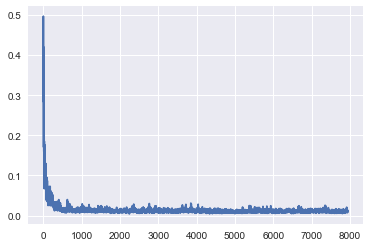

In [584]:
import matplotlib.pylab as plt
plt.plot(agent.td_losses)

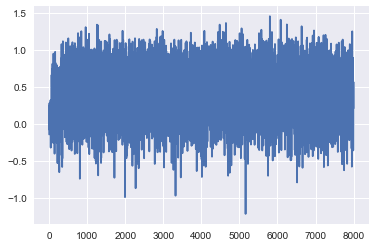

In [585]:
plt.plot(np.array(agent.qvalues).reshape(-1))

In [586]:
t = 200
ddpg_rs = []
for i in env.interactions:
    ddpg_rs.extend(i.rewards)
print(np.sum(ddpg_rs))

1889.5907662150194


In [587]:
from agents.baselines import RandomAgent

env =  deepcopy(base_env)

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = RandomAgent(action_size = action_size)

In [588]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=n_train, t_test=0)




  0%|          | 0/8000 [00:00<?, ?it/s]


  2%|▏         | 158/8000 [00:00<00:04, 1570.37it/s]


  4%|▍         | 339/8000 [00:00<00:04, 1685.69it/s]


  6%|▋         | 516/8000 [00:00<00:04, 1708.03it/s]


  9%|▊         | 688/8000 [00:00<00:04, 1710.37it/s]


 11%|█         | 866/8000 [00:00<00:04, 1719.87it/s]


 13%|█▎        | 1011/8000 [00:00<00:04, 1673.57it/s]


 15%|█▍        | 1192/8000 [00:00<00:04, 1691.56it/s]


 17%|█▋        | 1368/8000 [00:00<00:03, 1698.05it/s]


 19%|█▉        | 1537/8000 [00:00<00:03, 1696.55it/s]


 22%|██▏       | 1723/8000 [00:01<00:03, 1711.64it/s]


 24%|██▎       | 1893/8000 [00:01<00:03, 1698.25it/s]


 26%|██▌       | 2075/8000 [00:01<00:03, 1707.82it/s]


 28%|██▊       | 2259/8000 [00:01<00:03, 1716.77it/s]


 31%|███       | 2451/8000 [00:01<00:03, 1730.80it/s]


 33%|███▎      | 2644/8000 [00:01<00:03, 1743.03it/s]


 35%|███▌      | 2828/8000 [00:01<00:02, 1748.86it/s]


 38%|███▊      | 3032/8000 [00:01<00:02, 1764.87it/s]


 40%|██

In [589]:
t = 200
rand = []
for i in env.interactions:
    rand.extend(i.rewards)
print(np.sum(rand))

1515.4610751430596


In [590]:
np.mean(rand)

0.18943263439288244

In [547]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [569]:
from agents.dqn import Qagent

tf.reset_default_graph()
env = deepcopy(base_env)

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

tf.reset_default_graph()
sess = tf.InteractiveSession()
agent = Qagent(sess=sess,
                 state_dim=(state_dim,),
                 action_dim=(action_dim,),
                 epsilon=0.2,
                 action_size=action_size,
                 logdir='./logs/',
                 replay_size=1000,
                 batch_size=50)

/home/anton/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [570]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=n_train, t_test=0)




  0%|          | 0/8000 [00:00<?, ?it/s]


  0%|          | 40/8000 [00:00<00:20, 395.15it/s]


  1%|          | 52/8000 [00:00<01:09, 114.25it/s]


  1%|          | 62/8000 [00:01<03:08, 42.13it/s] 


  1%|          | 69/8000 [00:02<04:10, 31.68it/s]


  1%|          | 75/8000 [00:02<04:54, 26.94it/s]


  1%|          | 79/8000 [00:03<05:21, 24.67it/s]


  1%|          | 82/8000 [00:03<05:39, 23.29it/s]


  1%|          | 85/8000 [00:03<05:56, 22.20it/s]


  1%|          | 87/8000 [00:04<06:07, 21.53it/s]


  1%|          | 89/8000 [00:04<06:18, 20.89it/s]


  1%|          | 91/8000 [00:04<06:29, 20.32it/s]


  1%|          | 93/8000 [00:04<06:38, 19.85it/s]


  1%|          | 95/8000 [00:04<06:48, 19.35it/s]


  1%|          | 97/8000 [00:05<06:57, 18.93it/s]


  1%|          | 99/8000 [00:05<07:06, 18.53it/s]


  1%|▏         | 101/8000 [00:05<07:17, 18.04it/s]


  1%|▏         | 102/8000 [00:05<07:23, 17.82it/s]


  1%|▏         | 103/8000 [00:05<07:26, 17.67it/s]


  1%|▏      

  3%|▎         | 217/8000 [00:19<11:40, 11.11it/s]


  3%|▎         | 218/8000 [00:19<11:41, 11.10it/s]


  3%|▎         | 219/8000 [00:19<11:42, 11.08it/s]


  3%|▎         | 220/8000 [00:19<11:42, 11.07it/s]


  3%|▎         | 221/8000 [00:19<11:43, 11.06it/s]


  3%|▎         | 222/8000 [00:20<11:44, 11.04it/s]


  3%|▎         | 223/8000 [00:20<11:45, 11.02it/s]


  3%|▎         | 224/8000 [00:20<11:46, 11.00it/s]


  3%|▎         | 225/8000 [00:20<11:48, 10.98it/s]


  3%|▎         | 226/8000 [00:20<11:49, 10.96it/s]


  3%|▎         | 227/8000 [00:20<11:50, 10.94it/s]


  3%|▎         | 228/8000 [00:20<11:51, 10.92it/s]


  3%|▎         | 229/8000 [00:21<11:52, 10.90it/s]


  3%|▎         | 230/8000 [00:21<11:54, 10.88it/s]


  3%|▎         | 231/8000 [00:21<11:55, 10.86it/s]


  3%|▎         | 232/8000 [00:21<11:56, 10.85it/s]


  3%|▎         | 233/8000 [00:21<11:56, 10.83it/s]


  3%|▎         | 234/8000 [00:21<11:57, 10.82it/s]


  3%|▎         | 235/8000 [00:21<11:59, 10.80i

  4%|▍         | 356/8000 [00:35<12:52,  9.89it/s]


  4%|▍         | 357/8000 [00:36<12:54,  9.87it/s]


  4%|▍         | 358/8000 [00:36<12:55,  9.85it/s]


  4%|▍         | 359/8000 [00:36<12:57,  9.83it/s]


  4%|▍         | 360/8000 [00:36<12:57,  9.82it/s]


  5%|▍         | 361/8000 [00:36<12:59,  9.80it/s]


  5%|▍         | 362/8000 [00:36<12:59,  9.79it/s]


  5%|▍         | 363/8000 [00:37<13:00,  9.78it/s]


  5%|▍         | 364/8000 [00:37<13:01,  9.77it/s]


  5%|▍         | 365/8000 [00:37<13:02,  9.76it/s]


  5%|▍         | 366/8000 [00:37<13:03,  9.74it/s]


  5%|▍         | 367/8000 [00:37<13:04,  9.73it/s]


  5%|▍         | 368/8000 [00:37<13:05,  9.72it/s]


  5%|▍         | 369/8000 [00:37<13:05,  9.71it/s]


  5%|▍         | 370/8000 [00:38<13:06,  9.70it/s]


  5%|▍         | 371/8000 [00:38<13:07,  9.69it/s]


  5%|▍         | 372/8000 [00:38<13:07,  9.69it/s]


  5%|▍         | 373/8000 [00:38<13:08,  9.67it/s]


  5%|▍         | 374/8000 [00:38<13:09,  9.66i

  6%|▌         | 488/8000 [01:00<15:37,  8.02it/s]


  6%|▌         | 489/8000 [01:01<15:38,  8.00it/s]


  6%|▌         | 490/8000 [01:01<15:39,  7.99it/s]


  6%|▌         | 491/8000 [01:01<15:40,  7.98it/s]


  6%|▌         | 492/8000 [01:01<15:42,  7.97it/s]


  6%|▌         | 493/8000 [01:01<15:43,  7.96it/s]


  6%|▌         | 494/8000 [01:02<15:44,  7.95it/s]


  6%|▌         | 495/8000 [01:02<15:45,  7.94it/s]


  6%|▌         | 496/8000 [01:02<15:46,  7.93it/s]


  6%|▌         | 497/8000 [01:02<15:49,  7.91it/s]


  6%|▌         | 498/8000 [01:03<15:49,  7.90it/s]


  6%|▌         | 499/8000 [01:03<15:51,  7.88it/s]


  6%|▋         | 500/8000 [01:03<15:53,  7.87it/s]


  6%|▋         | 501/8000 [01:03<15:54,  7.86it/s]


  6%|▋         | 502/8000 [01:03<15:54,  7.86it/s]


  6%|▋         | 503/8000 [01:04<15:54,  7.85it/s]


  6%|▋         | 504/8000 [01:04<15:55,  7.85it/s]


  6%|▋         | 505/8000 [01:04<15:55,  7.84it/s]


  6%|▋         | 506/8000 [01:04<15:56,  7.83i

  8%|▊         | 620/8000 [01:19<15:51,  7.76it/s]


  8%|▊         | 621/8000 [01:20<15:51,  7.76it/s]


  8%|▊         | 622/8000 [01:20<15:50,  7.76it/s]


  8%|▊         | 623/8000 [01:20<15:50,  7.76it/s]


  8%|▊         | 624/8000 [01:20<15:50,  7.76it/s]


  8%|▊         | 625/8000 [01:20<15:49,  7.76it/s]


  8%|▊         | 626/8000 [01:20<15:49,  7.77it/s]


  8%|▊         | 627/8000 [01:20<15:49,  7.77it/s]


  8%|▊         | 628/8000 [01:20<15:48,  7.77it/s]


  8%|▊         | 629/8000 [01:20<15:48,  7.77it/s]


  8%|▊         | 630/8000 [01:21<15:48,  7.77it/s]


  8%|▊         | 631/8000 [01:21<15:47,  7.78it/s]


  8%|▊         | 632/8000 [01:21<15:47,  7.78it/s]


  8%|▊         | 633/8000 [01:21<15:46,  7.78it/s]


  8%|▊         | 634/8000 [01:21<15:46,  7.78it/s]


  8%|▊         | 635/8000 [01:21<15:46,  7.78it/s]


  8%|▊         | 636/8000 [01:21<15:45,  7.79it/s]


  8%|▊         | 637/8000 [01:21<15:45,  7.79it/s]


  8%|▊         | 638/8000 [01:21<15:45,  7.79i

  9%|▉         | 753/8000 [01:36<15:25,  7.83it/s]


  9%|▉         | 754/8000 [01:36<15:25,  7.83it/s]


  9%|▉         | 755/8000 [01:36<15:24,  7.83it/s]


  9%|▉         | 756/8000 [01:36<15:24,  7.83it/s]


  9%|▉         | 757/8000 [01:36<15:24,  7.84it/s]


  9%|▉         | 758/8000 [01:36<15:23,  7.84it/s]


  9%|▉         | 759/8000 [01:36<15:23,  7.84it/s]


 10%|▉         | 760/8000 [01:36<15:23,  7.84it/s]


 10%|▉         | 761/8000 [01:37<15:23,  7.84it/s]


 10%|▉         | 762/8000 [01:37<15:22,  7.84it/s]


 10%|▉         | 763/8000 [01:37<15:22,  7.85it/s]


 10%|▉         | 764/8000 [01:37<15:22,  7.85it/s]


 10%|▉         | 765/8000 [01:37<15:21,  7.85it/s]


 10%|▉         | 766/8000 [01:37<15:21,  7.85it/s]


 10%|▉         | 767/8000 [01:37<15:21,  7.85it/s]


 10%|▉         | 768/8000 [01:37<15:21,  7.85it/s]


 10%|▉         | 769/8000 [01:37<15:20,  7.85it/s]


 10%|▉         | 770/8000 [01:38<15:20,  7.86it/s]


 10%|▉         | 771/8000 [01:38<15:20,  7.86i

 11%|█         | 885/8000 [01:52<15:05,  7.86it/s]


 11%|█         | 886/8000 [01:52<15:05,  7.85it/s]


 11%|█         | 887/8000 [01:52<15:05,  7.85it/s]


 11%|█         | 888/8000 [01:53<15:06,  7.85it/s]


 11%|█         | 889/8000 [01:53<15:06,  7.84it/s]


 11%|█         | 890/8000 [01:53<15:06,  7.84it/s]


 11%|█         | 891/8000 [01:53<15:06,  7.84it/s]


 11%|█         | 892/8000 [01:53<15:07,  7.84it/s]


 11%|█         | 893/8000 [01:53<15:07,  7.83it/s]


 11%|█         | 894/8000 [01:54<15:07,  7.83it/s]


 11%|█         | 895/8000 [01:54<15:07,  7.83it/s]


 11%|█         | 896/8000 [01:54<15:07,  7.83it/s]


 11%|█         | 897/8000 [01:54<15:07,  7.82it/s]


 11%|█         | 898/8000 [01:54<15:08,  7.82it/s]


 11%|█         | 899/8000 [01:54<15:08,  7.82it/s]


 11%|█▏        | 900/8000 [01:55<15:08,  7.82it/s]


 11%|█▏        | 901/8000 [01:55<15:08,  7.81it/s]


 11%|█▏        | 902/8000 [01:55<15:08,  7.81it/s]


 11%|█▏        | 903/8000 [01:55<15:09,  7.81i

 13%|█▎        | 1016/8000 [02:10<14:56,  7.79it/s]


 13%|█▎        | 1017/8000 [02:10<14:56,  7.79it/s]


 13%|█▎        | 1018/8000 [02:10<14:56,  7.79it/s]


 13%|█▎        | 1019/8000 [02:10<14:56,  7.79it/s]


 13%|█▎        | 1020/8000 [02:10<14:55,  7.79it/s]


 13%|█▎        | 1021/8000 [02:11<14:55,  7.79it/s]


 13%|█▎        | 1022/8000 [02:11<14:55,  7.79it/s]


 13%|█▎        | 1023/8000 [02:11<14:55,  7.79it/s]


 13%|█▎        | 1024/8000 [02:11<14:55,  7.79it/s]


 13%|█▎        | 1025/8000 [02:11<14:55,  7.79it/s]


 13%|█▎        | 1026/8000 [02:11<14:55,  7.79it/s]


 13%|█▎        | 1027/8000 [02:11<14:55,  7.79it/s]


 13%|█▎        | 1028/8000 [02:12<14:55,  7.78it/s]


 13%|█▎        | 1029/8000 [02:12<14:56,  7.78it/s]


 13%|█▎        | 1030/8000 [02:12<14:56,  7.78it/s]


 13%|█▎        | 1031/8000 [02:12<14:56,  7.77it/s]


 13%|█▎        | 1032/8000 [02:12<14:56,  7.77it/s]


 13%|█▎        | 1033/8000 [02:12<14:56,  7.77it/s]


 13%|█▎        | 1034/8000 [

 14%|█▍        | 1146/8000 [02:28<14:46,  7.73it/s]


 14%|█▍        | 1147/8000 [02:28<14:46,  7.73it/s]


 14%|█▍        | 1148/8000 [02:28<14:46,  7.73it/s]


 14%|█▍        | 1149/8000 [02:28<14:46,  7.73it/s]


 14%|█▍        | 1150/8000 [02:28<14:46,  7.73it/s]


 14%|█▍        | 1151/8000 [02:28<14:46,  7.73it/s]


 14%|█▍        | 1152/8000 [02:29<14:46,  7.73it/s]


 14%|█▍        | 1153/8000 [02:29<14:46,  7.73it/s]


 14%|█▍        | 1154/8000 [02:29<14:46,  7.73it/s]


 14%|█▍        | 1155/8000 [02:29<14:46,  7.73it/s]


 14%|█▍        | 1156/8000 [02:29<14:45,  7.73it/s]


 14%|█▍        | 1157/8000 [02:29<14:45,  7.73it/s]


 14%|█▍        | 1158/8000 [02:29<14:45,  7.72it/s]


 14%|█▍        | 1159/8000 [02:30<14:45,  7.72it/s]


 14%|█▍        | 1160/8000 [02:30<14:45,  7.72it/s]


 15%|█▍        | 1161/8000 [02:30<14:45,  7.72it/s]


 15%|█▍        | 1162/8000 [02:30<14:45,  7.72it/s]


 15%|█▍        | 1163/8000 [02:30<14:45,  7.72it/s]


 15%|█▍        | 1164/8000 [

 16%|█▌        | 1276/8000 [02:46<14:35,  7.68it/s]


 16%|█▌        | 1277/8000 [02:46<14:35,  7.68it/s]


 16%|█▌        | 1278/8000 [02:46<14:35,  7.68it/s]


 16%|█▌        | 1279/8000 [02:46<14:35,  7.68it/s]


 16%|█▌        | 1280/8000 [02:46<14:35,  7.67it/s]


 16%|█▌        | 1281/8000 [02:46<14:35,  7.67it/s]


 16%|█▌        | 1282/8000 [02:47<14:35,  7.67it/s]


 16%|█▌        | 1283/8000 [02:47<14:35,  7.67it/s]


 16%|█▌        | 1284/8000 [02:47<14:35,  7.67it/s]


 16%|█▌        | 1285/8000 [02:47<14:35,  7.67it/s]


 16%|█▌        | 1286/8000 [02:47<14:35,  7.67it/s]


 16%|█▌        | 1287/8000 [02:47<14:35,  7.67it/s]


 16%|█▌        | 1288/8000 [02:47<14:35,  7.67it/s]


 16%|█▌        | 1289/8000 [02:48<14:34,  7.67it/s]


 16%|█▌        | 1290/8000 [02:48<14:34,  7.67it/s]


 16%|█▌        | 1291/8000 [02:48<14:34,  7.67it/s]


 16%|█▌        | 1292/8000 [02:48<14:34,  7.67it/s]


 16%|█▌        | 1293/8000 [02:48<14:34,  7.67it/s]


 16%|█▌        | 1294/8000 [

 18%|█▊        | 1406/8000 [03:06<14:33,  7.55it/s]


 18%|█▊        | 1407/8000 [03:06<14:33,  7.55it/s]


 18%|█▊        | 1408/8000 [03:06<14:34,  7.54it/s]


 18%|█▊        | 1409/8000 [03:06<14:34,  7.54it/s]


 18%|█▊        | 1410/8000 [03:07<14:34,  7.54it/s]


 18%|█▊        | 1411/8000 [03:07<14:34,  7.53it/s]


 18%|█▊        | 1412/8000 [03:07<14:35,  7.53it/s]


 18%|█▊        | 1413/8000 [03:07<14:35,  7.53it/s]


 18%|█▊        | 1414/8000 [03:07<14:35,  7.52it/s]


 18%|█▊        | 1415/8000 [03:08<14:35,  7.52it/s]


 18%|█▊        | 1416/8000 [03:08<14:35,  7.52it/s]


 18%|█▊        | 1417/8000 [03:08<14:35,  7.52it/s]


 18%|█▊        | 1418/8000 [03:08<14:35,  7.52it/s]


 18%|█▊        | 1419/8000 [03:08<14:35,  7.52it/s]


 18%|█▊        | 1420/8000 [03:08<14:35,  7.52it/s]


 18%|█▊        | 1421/8000 [03:09<14:35,  7.52it/s]


 18%|█▊        | 1422/8000 [03:09<14:35,  7.51it/s]


 18%|█▊        | 1423/8000 [03:09<14:35,  7.51it/s]


 18%|█▊        | 1424/8000 [

 19%|█▉        | 1536/8000 [03:27<14:32,  7.41it/s]


 19%|█▉        | 1537/8000 [03:27<14:33,  7.40it/s]


 19%|█▉        | 1538/8000 [03:27<14:33,  7.40it/s]


 19%|█▉        | 1539/8000 [03:28<14:33,  7.40it/s]


 19%|█▉        | 1540/8000 [03:28<14:33,  7.39it/s]


 19%|█▉        | 1541/8000 [03:28<14:33,  7.39it/s]


 19%|█▉        | 1542/8000 [03:28<14:33,  7.39it/s]


 19%|█▉        | 1543/8000 [03:28<14:33,  7.39it/s]


 19%|█▉        | 1544/8000 [03:29<14:34,  7.39it/s]


 19%|█▉        | 1545/8000 [03:29<14:34,  7.38it/s]


 19%|█▉        | 1546/8000 [03:29<14:34,  7.38it/s]


 19%|█▉        | 1547/8000 [03:29<14:34,  7.38it/s]


 19%|█▉        | 1548/8000 [03:29<14:34,  7.38it/s]


 19%|█▉        | 1549/8000 [03:29<14:34,  7.38it/s]


 19%|█▉        | 1550/8000 [03:30<14:34,  7.38it/s]


 19%|█▉        | 1551/8000 [03:30<14:34,  7.37it/s]


 19%|█▉        | 1552/8000 [03:30<14:34,  7.37it/s]


 19%|█▉        | 1553/8000 [03:30<14:34,  7.37it/s]


 19%|█▉        | 1554/8000 [

 21%|██        | 1666/8000 [03:46<14:22,  7.34it/s]


 21%|██        | 1667/8000 [03:47<14:22,  7.34it/s]


 21%|██        | 1668/8000 [03:47<14:22,  7.34it/s]


 21%|██        | 1669/8000 [03:47<14:22,  7.34it/s]


 21%|██        | 1670/8000 [03:47<14:22,  7.34it/s]


 21%|██        | 1671/8000 [03:47<14:22,  7.34it/s]


 21%|██        | 1672/8000 [03:47<14:21,  7.34it/s]


 21%|██        | 1673/8000 [03:47<14:21,  7.34it/s]


 21%|██        | 1674/8000 [03:47<14:21,  7.34it/s]


 21%|██        | 1675/8000 [03:48<14:21,  7.34it/s]


 21%|██        | 1676/8000 [03:48<14:20,  7.35it/s]


 21%|██        | 1677/8000 [03:48<14:20,  7.35it/s]


 21%|██        | 1678/8000 [03:48<14:20,  7.35it/s]


 21%|██        | 1679/8000 [03:48<14:20,  7.35it/s]


 21%|██        | 1680/8000 [03:48<14:19,  7.35it/s]


 21%|██        | 1681/8000 [03:48<14:19,  7.35it/s]


 21%|██        | 1682/8000 [03:48<14:19,  7.35it/s]


 21%|██        | 1683/8000 [03:48<14:19,  7.35it/s]


 21%|██        | 1684/8000 [

 23%|██▎       | 1804/8000 [04:03<13:54,  7.42it/s]


 23%|██▎       | 1805/8000 [04:03<13:54,  7.42it/s]


 23%|██▎       | 1806/8000 [04:03<13:54,  7.42it/s]


 23%|██▎       | 1807/8000 [04:03<13:54,  7.42it/s]


 23%|██▎       | 1808/8000 [04:03<13:54,  7.42it/s]


 23%|██▎       | 1809/8000 [04:03<13:54,  7.42it/s]


 23%|██▎       | 1810/8000 [04:03<13:54,  7.42it/s]


 23%|██▎       | 1811/8000 [04:04<13:53,  7.42it/s]


 23%|██▎       | 1812/8000 [04:04<13:53,  7.42it/s]


 23%|██▎       | 1813/8000 [04:04<13:53,  7.42it/s]


 23%|██▎       | 1814/8000 [04:04<13:53,  7.42it/s]


 23%|██▎       | 1815/8000 [04:04<13:53,  7.42it/s]


 23%|██▎       | 1816/8000 [04:04<13:53,  7.42it/s]


 23%|██▎       | 1817/8000 [04:04<13:53,  7.42it/s]


 23%|██▎       | 1818/8000 [04:05<13:53,  7.42it/s]


 23%|██▎       | 1819/8000 [04:05<13:53,  7.42it/s]


 23%|██▎       | 1820/8000 [04:05<13:53,  7.41it/s]


 23%|██▎       | 1821/8000 [04:05<13:53,  7.41it/s]


 23%|██▎       | 1822/8000 [

 24%|██▍       | 1936/8000 [04:20<13:36,  7.42it/s]


 24%|██▍       | 1937/8000 [04:20<13:36,  7.42it/s]


 24%|██▍       | 1938/8000 [04:21<13:36,  7.42it/s]


 24%|██▍       | 1939/8000 [04:21<13:36,  7.42it/s]


 24%|██▍       | 1940/8000 [04:21<13:36,  7.42it/s]


 24%|██▍       | 1941/8000 [04:21<13:36,  7.42it/s]


 24%|██▍       | 1942/8000 [04:21<13:35,  7.42it/s]


 24%|██▍       | 1943/8000 [04:21<13:35,  7.42it/s]


 24%|██▍       | 1944/8000 [04:21<13:35,  7.42it/s]


 24%|██▍       | 1945/8000 [04:21<13:35,  7.43it/s]


 24%|██▍       | 1946/8000 [04:22<13:35,  7.43it/s]


 24%|██▍       | 1947/8000 [04:22<13:35,  7.43it/s]


 24%|██▍       | 1948/8000 [04:22<13:34,  7.43it/s]


 24%|██▍       | 1949/8000 [04:22<13:34,  7.43it/s]


 24%|██▍       | 1950/8000 [04:22<13:34,  7.43it/s]


 24%|██▍       | 1951/8000 [04:22<13:34,  7.43it/s]


 24%|██▍       | 1952/8000 [04:22<13:34,  7.43it/s]


 24%|██▍       | 1953/8000 [04:22<13:34,  7.43it/s]


 24%|██▍       | 1954/8000 [

 26%|██▌       | 2070/8000 [04:38<13:16,  7.44it/s]


 26%|██▌       | 2071/8000 [04:38<13:17,  7.44it/s]


 26%|██▌       | 2072/8000 [04:38<13:17,  7.44it/s]


 26%|██▌       | 2073/8000 [04:38<13:16,  7.44it/s]


 26%|██▌       | 2074/8000 [04:38<13:16,  7.44it/s]


 26%|██▌       | 2075/8000 [04:39<13:16,  7.44it/s]


 26%|██▌       | 2076/8000 [04:39<13:16,  7.44it/s]


 26%|██▌       | 2077/8000 [04:39<13:16,  7.44it/s]


 26%|██▌       | 2078/8000 [04:39<13:16,  7.44it/s]


 26%|██▌       | 2079/8000 [04:39<13:16,  7.44it/s]


 26%|██▌       | 2080/8000 [04:39<13:16,  7.44it/s]


 26%|██▌       | 2081/8000 [04:39<13:15,  7.44it/s]


 26%|██▌       | 2082/8000 [04:39<13:15,  7.44it/s]


 26%|██▌       | 2083/8000 [04:40<13:15,  7.44it/s]


 26%|██▌       | 2084/8000 [04:40<13:15,  7.44it/s]


 26%|██▌       | 2085/8000 [04:40<13:15,  7.44it/s]


 26%|██▌       | 2086/8000 [04:40<13:15,  7.44it/s]


 26%|██▌       | 2087/8000 [04:40<13:15,  7.44it/s]


 26%|██▌       | 2088/8000 [

 28%|██▊       | 2202/8000 [04:55<12:57,  7.46it/s]


 28%|██▊       | 2203/8000 [04:55<12:57,  7.46it/s]


 28%|██▊       | 2204/8000 [04:55<12:56,  7.46it/s]


 28%|██▊       | 2205/8000 [04:55<12:56,  7.46it/s]


 28%|██▊       | 2206/8000 [04:55<12:56,  7.46it/s]


 28%|██▊       | 2207/8000 [04:55<12:56,  7.46it/s]


 28%|██▊       | 2208/8000 [04:55<12:56,  7.46it/s]


 28%|██▊       | 2209/8000 [04:56<12:56,  7.46it/s]


 28%|██▊       | 2210/8000 [04:56<12:55,  7.46it/s]


 28%|██▊       | 2211/8000 [04:56<12:55,  7.46it/s]


 28%|██▊       | 2212/8000 [04:56<12:55,  7.46it/s]


 28%|██▊       | 2213/8000 [04:56<12:55,  7.46it/s]


 28%|██▊       | 2214/8000 [04:56<12:55,  7.46it/s]


 28%|██▊       | 2215/8000 [04:56<12:55,  7.46it/s]


 28%|██▊       | 2216/8000 [04:57<12:55,  7.46it/s]


 28%|██▊       | 2217/8000 [04:57<12:55,  7.46it/s]


 28%|██▊       | 2218/8000 [04:57<12:55,  7.46it/s]


 28%|██▊       | 2219/8000 [04:57<12:55,  7.46it/s]


 28%|██▊       | 2220/8000 [

 29%|██▉       | 2334/8000 [05:13<12:41,  7.44it/s]


 29%|██▉       | 2335/8000 [05:13<12:41,  7.44it/s]


 29%|██▉       | 2336/8000 [05:13<12:41,  7.44it/s]


 29%|██▉       | 2338/8000 [05:14<12:40,  7.44it/s]


 29%|██▉       | 2339/8000 [05:14<12:40,  7.45it/s]


 29%|██▉       | 2340/8000 [05:14<12:40,  7.45it/s]


 29%|██▉       | 2342/8000 [05:14<12:39,  7.45it/s]


 29%|██▉       | 2343/8000 [05:14<12:39,  7.45it/s]


 29%|██▉       | 2345/8000 [05:14<12:39,  7.45it/s]


 29%|██▉       | 2346/8000 [05:14<12:38,  7.45it/s]


 29%|██▉       | 2347/8000 [05:15<12:38,  7.45it/s]


 29%|██▉       | 2349/8000 [05:15<12:38,  7.45it/s]


 29%|██▉       | 2350/8000 [05:15<12:38,  7.45it/s]


 29%|██▉       | 2351/8000 [05:15<12:37,  7.45it/s]


 29%|██▉       | 2352/8000 [05:15<12:37,  7.45it/s]


 29%|██▉       | 2353/8000 [05:15<12:37,  7.45it/s]


 29%|██▉       | 2355/8000 [05:15<12:37,  7.46it/s]


 29%|██▉       | 2356/8000 [05:15<12:36,  7.46it/s]


 29%|██▉       | 2357/8000 [

 31%|███       | 2475/8000 [05:31<12:19,  7.47it/s]


 31%|███       | 2476/8000 [05:31<12:19,  7.47it/s]


 31%|███       | 2477/8000 [05:31<12:19,  7.47it/s]


 31%|███       | 2478/8000 [05:31<12:19,  7.47it/s]


 31%|███       | 2479/8000 [05:31<12:19,  7.47it/s]


 31%|███       | 2480/8000 [05:31<12:18,  7.47it/s]


 31%|███       | 2481/8000 [05:32<12:18,  7.47it/s]


 31%|███       | 2482/8000 [05:32<12:18,  7.47it/s]


 31%|███       | 2483/8000 [05:32<12:18,  7.47it/s]


 31%|███       | 2484/8000 [05:32<12:18,  7.47it/s]


 31%|███       | 2485/8000 [05:32<12:18,  7.47it/s]


 31%|███       | 2486/8000 [05:32<12:18,  7.47it/s]


 31%|███       | 2487/8000 [05:33<12:18,  7.47it/s]


 31%|███       | 2488/8000 [05:33<12:18,  7.47it/s]


 31%|███       | 2489/8000 [05:33<12:18,  7.47it/s]


 31%|███       | 2490/8000 [05:33<12:17,  7.47it/s]


 31%|███       | 2491/8000 [05:33<12:17,  7.47it/s]


 31%|███       | 2492/8000 [05:33<12:17,  7.47it/s]


 31%|███       | 2493/8000 [

 33%|███▎      | 2611/8000 [05:48<11:59,  7.49it/s]


 33%|███▎      | 2612/8000 [05:48<11:59,  7.49it/s]


 33%|███▎      | 2613/8000 [05:49<11:59,  7.49it/s]


 33%|███▎      | 2614/8000 [05:49<11:59,  7.49it/s]


 33%|███▎      | 2615/8000 [05:49<11:59,  7.49it/s]


 33%|███▎      | 2616/8000 [05:49<11:59,  7.49it/s]


 33%|███▎      | 2617/8000 [05:49<11:59,  7.48it/s]


 33%|███▎      | 2618/8000 [05:49<11:59,  7.48it/s]


 33%|███▎      | 2619/8000 [05:49<11:58,  7.48it/s]


 33%|███▎      | 2620/8000 [05:50<11:58,  7.48it/s]


 33%|███▎      | 2621/8000 [05:50<11:58,  7.48it/s]


 33%|███▎      | 2622/8000 [05:50<11:58,  7.48it/s]


 33%|███▎      | 2623/8000 [05:50<11:58,  7.48it/s]


 33%|███▎      | 2624/8000 [05:50<11:58,  7.48it/s]


 33%|███▎      | 2625/8000 [05:50<11:58,  7.48it/s]


 33%|███▎      | 2626/8000 [05:50<11:58,  7.48it/s]


 33%|███▎      | 2627/8000 [05:51<11:58,  7.48it/s]


 33%|███▎      | 2628/8000 [05:51<11:58,  7.48it/s]


 33%|███▎      | 2629/8000 [

 34%|███▍      | 2751/8000 [06:06<11:39,  7.51it/s]


 34%|███▍      | 2752/8000 [06:06<11:38,  7.51it/s]


 34%|███▍      | 2753/8000 [06:06<11:38,  7.51it/s]


 34%|███▍      | 2754/8000 [06:06<11:38,  7.51it/s]


 34%|███▍      | 2755/8000 [06:06<11:38,  7.51it/s]


 34%|███▍      | 2756/8000 [06:06<11:38,  7.51it/s]


 34%|███▍      | 2757/8000 [06:07<11:38,  7.51it/s]


 34%|███▍      | 2758/8000 [06:07<11:37,  7.51it/s]


 34%|███▍      | 2759/8000 [06:07<11:37,  7.51it/s]


 34%|███▍      | 2760/8000 [06:07<11:37,  7.51it/s]


 35%|███▍      | 2761/8000 [06:07<11:37,  7.51it/s]


 35%|███▍      | 2762/8000 [06:07<11:37,  7.51it/s]


 35%|███▍      | 2763/8000 [06:07<11:37,  7.51it/s]


 35%|███▍      | 2764/8000 [06:07<11:37,  7.51it/s]


 35%|███▍      | 2765/8000 [06:08<11:36,  7.51it/s]


 35%|███▍      | 2766/8000 [06:08<11:36,  7.51it/s]


 35%|███▍      | 2767/8000 [06:08<11:36,  7.51it/s]


 35%|███▍      | 2769/8000 [06:08<11:36,  7.51it/s]


 35%|███▍      | 2770/8000 [

 36%|███▌      | 2888/8000 [06:23<11:19,  7.52it/s]


 36%|███▌      | 2889/8000 [06:23<11:19,  7.52it/s]


 36%|███▌      | 2890/8000 [06:24<11:19,  7.52it/s]


 36%|███▌      | 2891/8000 [06:24<11:19,  7.52it/s]


 36%|███▌      | 2892/8000 [06:24<11:18,  7.52it/s]


 36%|███▌      | 2893/8000 [06:24<11:18,  7.52it/s]


 36%|███▌      | 2894/8000 [06:24<11:18,  7.52it/s]


 36%|███▌      | 2895/8000 [06:24<11:18,  7.52it/s]


 36%|███▌      | 2896/8000 [06:24<11:18,  7.52it/s]


 36%|███▌      | 2897/8000 [06:25<11:18,  7.52it/s]


 36%|███▌      | 2898/8000 [06:25<11:18,  7.52it/s]


 36%|███▌      | 2899/8000 [06:25<11:17,  7.52it/s]


 36%|███▋      | 2900/8000 [06:25<11:17,  7.52it/s]


 36%|███▋      | 2901/8000 [06:25<11:17,  7.52it/s]


 36%|███▋      | 2902/8000 [06:25<11:17,  7.52it/s]


 36%|███▋      | 2903/8000 [06:25<11:17,  7.52it/s]


 36%|███▋      | 2904/8000 [06:25<11:17,  7.52it/s]


 36%|███▋      | 2905/8000 [06:26<11:17,  7.52it/s]


 36%|███▋      | 2906/8000 [

 38%|███▊      | 3030/8000 [06:40<10:56,  7.57it/s]


 38%|███▊      | 3031/8000 [06:40<10:56,  7.57it/s]


 38%|███▊      | 3032/8000 [06:40<10:56,  7.57it/s]


 38%|███▊      | 3033/8000 [06:40<10:56,  7.57it/s]


 38%|███▊      | 3034/8000 [06:40<10:56,  7.57it/s]


 38%|███▊      | 3035/8000 [06:41<10:56,  7.57it/s]


 38%|███▊      | 3036/8000 [06:41<10:55,  7.57it/s]


 38%|███▊      | 3037/8000 [06:41<10:55,  7.57it/s]


 38%|███▊      | 3038/8000 [06:41<10:55,  7.57it/s]


 38%|███▊      | 3039/8000 [06:41<10:55,  7.57it/s]


 38%|███▊      | 3040/8000 [06:41<10:55,  7.57it/s]


 38%|███▊      | 3041/8000 [06:41<10:55,  7.57it/s]


 38%|███▊      | 3042/8000 [06:41<10:55,  7.57it/s]


 38%|███▊      | 3043/8000 [06:42<10:54,  7.57it/s]


 38%|███▊      | 3044/8000 [06:42<10:54,  7.57it/s]


 38%|███▊      | 3045/8000 [06:42<10:54,  7.57it/s]


 38%|███▊      | 3046/8000 [06:42<10:54,  7.57it/s]


 38%|███▊      | 3047/8000 [06:42<10:54,  7.57it/s]


 38%|███▊      | 3048/8000 [

 40%|███▉      | 3160/8000 [06:57<10:40,  7.56it/s]


 40%|███▉      | 3161/8000 [06:58<10:40,  7.56it/s]


 40%|███▉      | 3162/8000 [06:58<10:39,  7.56it/s]


 40%|███▉      | 3163/8000 [06:58<10:39,  7.56it/s]


 40%|███▉      | 3164/8000 [06:58<10:39,  7.56it/s]


 40%|███▉      | 3165/8000 [06:58<10:39,  7.56it/s]


 40%|███▉      | 3166/8000 [06:58<10:39,  7.56it/s]


 40%|███▉      | 3167/8000 [06:58<10:39,  7.56it/s]


 40%|███▉      | 3168/8000 [06:59<10:39,  7.56it/s]


 40%|███▉      | 3169/8000 [06:59<10:39,  7.56it/s]


 40%|███▉      | 3170/8000 [06:59<10:38,  7.56it/s]


 40%|███▉      | 3171/8000 [06:59<10:38,  7.56it/s]


 40%|███▉      | 3172/8000 [06:59<10:38,  7.56it/s]


 40%|███▉      | 3173/8000 [06:59<10:38,  7.56it/s]


 40%|███▉      | 3174/8000 [06:59<10:38,  7.56it/s]


 40%|███▉      | 3175/8000 [07:00<10:38,  7.56it/s]


 40%|███▉      | 3176/8000 [07:00<10:38,  7.56it/s]


 40%|███▉      | 3177/8000 [07:00<10:38,  7.56it/s]


 40%|███▉      | 3178/8000 [

 41%|████      | 3290/8000 [07:15<10:23,  7.55it/s]


 41%|████      | 3291/8000 [07:15<10:23,  7.55it/s]


 41%|████      | 3292/8000 [07:15<10:23,  7.55it/s]


 41%|████      | 3293/8000 [07:15<10:23,  7.55it/s]


 41%|████      | 3294/8000 [07:16<10:23,  7.55it/s]


 41%|████      | 3295/8000 [07:16<10:22,  7.55it/s]


 41%|████      | 3296/8000 [07:16<10:22,  7.55it/s]


 41%|████      | 3297/8000 [07:16<10:22,  7.55it/s]


 41%|████      | 3298/8000 [07:16<10:22,  7.55it/s]


 41%|████      | 3299/8000 [07:16<10:22,  7.55it/s]


 41%|████▏     | 3300/8000 [07:16<10:22,  7.55it/s]


 41%|████▏     | 3301/8000 [07:17<10:22,  7.55it/s]


 41%|████▏     | 3302/8000 [07:17<10:21,  7.55it/s]


 41%|████▏     | 3303/8000 [07:17<10:21,  7.55it/s]


 41%|████▏     | 3304/8000 [07:17<10:21,  7.55it/s]


 41%|████▏     | 3305/8000 [07:17<10:21,  7.55it/s]


 41%|████▏     | 3306/8000 [07:17<10:21,  7.55it/s]


 41%|████▏     | 3307/8000 [07:17<10:21,  7.55it/s]


 41%|████▏     | 3308/8000 [

 43%|████▎     | 3422/8000 [07:32<10:05,  7.56it/s]


 43%|████▎     | 3423/8000 [07:32<10:05,  7.56it/s]


 43%|████▎     | 3424/8000 [07:32<10:05,  7.56it/s]


 43%|████▎     | 3425/8000 [07:32<10:04,  7.56it/s]


 43%|████▎     | 3426/8000 [07:32<10:04,  7.56it/s]


 43%|████▎     | 3427/8000 [07:33<10:04,  7.56it/s]


 43%|████▎     | 3428/8000 [07:33<10:04,  7.56it/s]


 43%|████▎     | 3429/8000 [07:33<10:04,  7.56it/s]


 43%|████▎     | 3430/8000 [07:33<10:04,  7.56it/s]


 43%|████▎     | 3431/8000 [07:33<10:04,  7.56it/s]


 43%|████▎     | 3432/8000 [07:33<10:04,  7.56it/s]


 43%|████▎     | 3433/8000 [07:33<10:03,  7.56it/s]


 43%|████▎     | 3434/8000 [07:34<10:03,  7.56it/s]


 43%|████▎     | 3435/8000 [07:34<10:03,  7.56it/s]


 43%|████▎     | 3436/8000 [07:34<10:03,  7.56it/s]


 43%|████▎     | 3437/8000 [07:34<10:03,  7.56it/s]


 43%|████▎     | 3438/8000 [07:34<10:03,  7.56it/s]


 43%|████▎     | 3439/8000 [07:34<10:03,  7.56it/s]


 43%|████▎     | 3440/8000 [

 45%|████▍     | 3565/8000 [07:50<09:45,  7.57it/s]


 45%|████▍     | 3566/8000 [07:50<09:45,  7.57it/s]


 45%|████▍     | 3567/8000 [07:51<09:45,  7.57it/s]


 45%|████▍     | 3568/8000 [07:51<09:45,  7.57it/s]


 45%|████▍     | 3569/8000 [07:51<09:45,  7.57it/s]


 45%|████▍     | 3570/8000 [07:51<09:45,  7.57it/s]


 45%|████▍     | 3571/8000 [07:51<09:45,  7.57it/s]


 45%|████▍     | 3572/8000 [07:51<09:44,  7.57it/s]


 45%|████▍     | 3573/8000 [07:51<09:44,  7.57it/s]


 45%|████▍     | 3574/8000 [07:52<09:44,  7.57it/s]


 45%|████▍     | 3575/8000 [07:52<09:44,  7.57it/s]


 45%|████▍     | 3576/8000 [07:52<09:44,  7.57it/s]


 45%|████▍     | 3577/8000 [07:52<09:44,  7.57it/s]


 45%|████▍     | 3578/8000 [07:52<09:44,  7.57it/s]


 45%|████▍     | 3579/8000 [07:52<09:43,  7.57it/s]


 45%|████▍     | 3580/8000 [07:52<09:43,  7.57it/s]


 45%|████▍     | 3581/8000 [07:52<09:43,  7.57it/s]


 45%|████▍     | 3582/8000 [07:53<09:43,  7.57it/s]


 45%|████▍     | 3583/8000 [

 46%|████▋     | 3703/8000 [08:08<09:27,  7.57it/s]


 46%|████▋     | 3704/8000 [08:08<09:27,  7.57it/s]


 46%|████▋     | 3705/8000 [08:09<09:27,  7.57it/s]


 46%|████▋     | 3706/8000 [08:09<09:26,  7.57it/s]


 46%|████▋     | 3707/8000 [08:09<09:26,  7.57it/s]


 46%|████▋     | 3708/8000 [08:09<09:26,  7.57it/s]


 46%|████▋     | 3709/8000 [08:09<09:26,  7.57it/s]


 46%|████▋     | 3710/8000 [08:09<09:26,  7.57it/s]


 46%|████▋     | 3711/8000 [08:09<09:26,  7.57it/s]


 46%|████▋     | 3712/8000 [08:10<09:26,  7.57it/s]


 46%|████▋     | 3713/8000 [08:10<09:26,  7.57it/s]


 46%|████▋     | 3714/8000 [08:10<09:25,  7.57it/s]


 46%|████▋     | 3715/8000 [08:10<09:25,  7.57it/s]


 46%|████▋     | 3716/8000 [08:10<09:25,  7.57it/s]


 46%|████▋     | 3717/8000 [08:10<09:25,  7.57it/s]


 46%|████▋     | 3718/8000 [08:10<09:25,  7.57it/s]


 46%|████▋     | 3719/8000 [08:11<09:25,  7.57it/s]


 46%|████▋     | 3720/8000 [08:11<09:25,  7.57it/s]


 47%|████▋     | 3721/8000 [

 48%|████▊     | 3838/8000 [08:26<09:08,  7.58it/s]


 48%|████▊     | 3839/8000 [08:26<09:08,  7.58it/s]


 48%|████▊     | 3840/8000 [08:26<09:08,  7.58it/s]


 48%|████▊     | 3841/8000 [08:26<09:08,  7.58it/s]


 48%|████▊     | 3842/8000 [08:26<09:08,  7.58it/s]


 48%|████▊     | 3843/8000 [08:27<09:08,  7.58it/s]


 48%|████▊     | 3844/8000 [08:27<09:08,  7.58it/s]


 48%|████▊     | 3845/8000 [08:27<09:08,  7.58it/s]


 48%|████▊     | 3846/8000 [08:27<09:08,  7.58it/s]


 48%|████▊     | 3847/8000 [08:27<09:08,  7.58it/s]


 48%|████▊     | 3848/8000 [08:27<09:07,  7.58it/s]


 48%|████▊     | 3849/8000 [08:27<09:07,  7.58it/s]


 48%|████▊     | 3850/8000 [08:28<09:07,  7.58it/s]


 48%|████▊     | 3851/8000 [08:28<09:07,  7.58it/s]


 48%|████▊     | 3852/8000 [08:28<09:07,  7.58it/s]


 48%|████▊     | 3853/8000 [08:28<09:07,  7.58it/s]


 48%|████▊     | 3854/8000 [08:28<09:07,  7.58it/s]


 48%|████▊     | 3855/8000 [08:28<09:07,  7.58it/s]


 48%|████▊     | 3856/8000 [

 50%|████▉     | 3974/8000 [08:43<08:50,  7.59it/s]


 50%|████▉     | 3975/8000 [08:43<08:50,  7.59it/s]


 50%|████▉     | 3976/8000 [08:43<08:50,  7.59it/s]


 50%|████▉     | 3977/8000 [08:43<08:49,  7.59it/s]


 50%|████▉     | 3978/8000 [08:43<08:49,  7.59it/s]


 50%|████▉     | 3979/8000 [08:44<08:49,  7.59it/s]


 50%|████▉     | 3980/8000 [08:44<08:49,  7.59it/s]


 50%|████▉     | 3982/8000 [08:44<08:49,  7.59it/s]


 50%|████▉     | 3984/8000 [08:44<08:48,  7.59it/s]


 50%|████▉     | 3986/8000 [08:44<08:48,  7.60it/s]


 50%|████▉     | 3987/8000 [08:44<08:48,  7.60it/s]


 50%|████▉     | 3989/8000 [08:45<08:47,  7.60it/s]


 50%|████▉     | 3990/8000 [08:45<08:47,  7.60it/s]


 50%|████▉     | 3992/8000 [08:45<08:47,  7.60it/s]


 50%|████▉     | 3993/8000 [08:45<08:47,  7.60it/s]


 50%|████▉     | 3995/8000 [08:45<08:46,  7.60it/s]


 50%|████▉     | 3997/8000 [08:45<08:46,  7.60it/s]


 50%|████▉     | 3999/8000 [08:46<08:46,  7.60it/s]


 50%|█████     | 4001/8000 [

 52%|█████▏    | 4139/8000 [09:02<08:26,  7.63it/s]


 52%|█████▏    | 4140/8000 [09:02<08:26,  7.63it/s]


 52%|█████▏    | 4141/8000 [09:02<08:25,  7.63it/s]


 52%|█████▏    | 4142/8000 [09:03<08:25,  7.63it/s]


 52%|█████▏    | 4143/8000 [09:03<08:25,  7.63it/s]


 52%|█████▏    | 4144/8000 [09:03<08:25,  7.63it/s]


 52%|█████▏    | 4145/8000 [09:03<08:25,  7.63it/s]


 52%|█████▏    | 4146/8000 [09:03<08:25,  7.63it/s]


 52%|█████▏    | 4147/8000 [09:03<08:25,  7.63it/s]


 52%|█████▏    | 4148/8000 [09:03<08:25,  7.63it/s]


 52%|█████▏    | 4149/8000 [09:04<08:25,  7.63it/s]


 52%|█████▏    | 4150/8000 [09:04<08:24,  7.63it/s]


 52%|█████▏    | 4151/8000 [09:04<08:24,  7.63it/s]


 52%|█████▏    | 4152/8000 [09:04<08:24,  7.62it/s]


 52%|█████▏    | 4153/8000 [09:04<08:24,  7.62it/s]


 52%|█████▏    | 4154/8000 [09:04<08:24,  7.62it/s]


 52%|█████▏    | 4155/8000 [09:04<08:24,  7.62it/s]


 52%|█████▏    | 4156/8000 [09:05<08:24,  7.62it/s]


 52%|█████▏    | 4157/8000 [

 53%|█████▎    | 4269/8000 [09:19<08:09,  7.62it/s]


 53%|█████▎    | 4270/8000 [09:20<08:09,  7.62it/s]


 53%|█████▎    | 4271/8000 [09:20<08:09,  7.62it/s]


 53%|█████▎    | 4272/8000 [09:20<08:08,  7.63it/s]


 53%|█████▎    | 4274/8000 [09:20<08:08,  7.63it/s]


 53%|█████▎    | 4275/8000 [09:20<08:08,  7.63it/s]


 53%|█████▎    | 4277/8000 [09:20<08:08,  7.63it/s]


 53%|█████▎    | 4279/8000 [09:20<08:07,  7.63it/s]


 54%|█████▎    | 4281/8000 [09:21<08:07,  7.63it/s]


 54%|█████▎    | 4283/8000 [09:21<08:07,  7.63it/s]


 54%|█████▎    | 4285/8000 [09:21<08:06,  7.63it/s]


 54%|█████▎    | 4287/8000 [09:21<08:06,  7.63it/s]


 54%|█████▎    | 4289/8000 [09:21<08:06,  7.63it/s]


 54%|█████▎    | 4291/8000 [09:22<08:05,  7.63it/s]


 54%|█████▎    | 4293/8000 [09:22<08:05,  7.63it/s]


 54%|█████▎    | 4295/8000 [09:22<08:05,  7.64it/s]


 54%|█████▎    | 4297/8000 [09:22<08:04,  7.64it/s]


 54%|█████▎    | 4299/8000 [09:22<08:04,  7.64it/s]


 54%|█████▍    | 4301/8000 [

 55%|█████▌    | 4420/8000 [09:39<07:48,  7.63it/s]


 55%|█████▌    | 4421/8000 [09:39<07:48,  7.63it/s]


 55%|█████▌    | 4422/8000 [09:39<07:48,  7.63it/s]


 55%|█████▌    | 4423/8000 [09:39<07:48,  7.63it/s]


 55%|█████▌    | 4424/8000 [09:39<07:48,  7.63it/s]


 55%|█████▌    | 4425/8000 [09:39<07:48,  7.63it/s]


 55%|█████▌    | 4426/8000 [09:39<07:48,  7.63it/s]


 55%|█████▌    | 4427/8000 [09:39<07:48,  7.63it/s]


 55%|█████▌    | 4428/8000 [09:40<07:47,  7.63it/s]


 55%|█████▌    | 4429/8000 [09:40<07:47,  7.63it/s]


 55%|█████▌    | 4430/8000 [09:40<07:47,  7.63it/s]


 55%|█████▌    | 4431/8000 [09:40<07:47,  7.63it/s]


 55%|█████▌    | 4432/8000 [09:40<07:47,  7.63it/s]


 55%|█████▌    | 4433/8000 [09:40<07:47,  7.63it/s]


 55%|█████▌    | 4435/8000 [09:40<07:46,  7.64it/s]


 55%|█████▌    | 4436/8000 [09:40<07:46,  7.64it/s]


 55%|█████▌    | 4438/8000 [09:41<07:46,  7.64it/s]


 56%|█████▌    | 4440/8000 [09:41<07:46,  7.64it/s]


 56%|█████▌    | 4442/8000 [

 57%|█████▋    | 4573/8000 [09:56<07:26,  7.67it/s]


 57%|█████▋    | 4574/8000 [09:56<07:26,  7.67it/s]


 57%|█████▋    | 4575/8000 [09:56<07:26,  7.67it/s]


 57%|█████▋    | 4576/8000 [09:56<07:26,  7.67it/s]


 57%|█████▋    | 4577/8000 [09:56<07:26,  7.67it/s]


 57%|█████▋    | 4579/8000 [09:56<07:25,  7.67it/s]


 57%|█████▋    | 4581/8000 [09:57<07:25,  7.67it/s]


 57%|█████▋    | 4583/8000 [09:57<07:25,  7.67it/s]


 57%|█████▋    | 4585/8000 [09:57<07:25,  7.67it/s]


 57%|█████▋    | 4587/8000 [09:57<07:24,  7.67it/s]


 57%|█████▋    | 4589/8000 [09:57<07:24,  7.67it/s]


 57%|█████▋    | 4590/8000 [09:58<07:24,  7.67it/s]


 57%|█████▋    | 4592/8000 [09:58<07:24,  7.68it/s]


 57%|█████▋    | 4594/8000 [09:58<07:23,  7.68it/s]


 57%|█████▋    | 4596/8000 [09:58<07:23,  7.68it/s]


 57%|█████▋    | 4598/8000 [09:58<07:23,  7.68it/s]


 57%|█████▊    | 4600/8000 [09:59<07:22,  7.68it/s]


 58%|█████▊    | 4602/8000 [09:59<07:22,  7.68it/s]


 58%|█████▊    | 4604/8000 [

 59%|█████▉    | 4716/8000 [10:16<07:09,  7.65it/s]


 59%|█████▉    | 4717/8000 [10:16<07:09,  7.65it/s]


 59%|█████▉    | 4718/8000 [10:16<07:08,  7.65it/s]


 59%|█████▉    | 4719/8000 [10:16<07:08,  7.65it/s]


 59%|█████▉    | 4720/8000 [10:16<07:08,  7.65it/s]


 59%|█████▉    | 4721/8000 [10:16<07:08,  7.65it/s]


 59%|█████▉    | 4722/8000 [10:17<07:08,  7.65it/s]


 59%|█████▉    | 4723/8000 [10:17<07:08,  7.65it/s]


 59%|█████▉    | 4724/8000 [10:17<07:08,  7.65it/s]


 59%|█████▉    | 4725/8000 [10:17<07:08,  7.65it/s]


 59%|█████▉    | 4726/8000 [10:17<07:07,  7.65it/s]


 59%|█████▉    | 4727/8000 [10:17<07:07,  7.65it/s]


 59%|█████▉    | 4728/8000 [10:17<07:07,  7.65it/s]


 59%|█████▉    | 4729/8000 [10:18<07:07,  7.65it/s]


 59%|█████▉    | 4730/8000 [10:18<07:07,  7.65it/s]


 59%|█████▉    | 4731/8000 [10:18<07:07,  7.65it/s]


 59%|█████▉    | 4732/8000 [10:18<07:07,  7.65it/s]


 59%|█████▉    | 4733/8000 [10:18<07:07,  7.65it/s]


 59%|█████▉    | 4734/8000 [

 61%|██████    | 4846/8000 [10:36<06:53,  7.62it/s]


 61%|██████    | 4847/8000 [10:36<06:53,  7.62it/s]


 61%|██████    | 4848/8000 [10:36<06:53,  7.62it/s]


 61%|██████    | 4849/8000 [10:36<06:53,  7.62it/s]


 61%|██████    | 4850/8000 [10:36<06:53,  7.62it/s]


 61%|██████    | 4851/8000 [10:36<06:53,  7.62it/s]


 61%|██████    | 4852/8000 [10:36<06:53,  7.62it/s]


 61%|██████    | 4853/8000 [10:36<06:53,  7.62it/s]


 61%|██████    | 4854/8000 [10:37<06:52,  7.62it/s]


 61%|██████    | 4855/8000 [10:37<06:52,  7.62it/s]


 61%|██████    | 4856/8000 [10:37<06:52,  7.62it/s]


 61%|██████    | 4857/8000 [10:37<06:52,  7.62it/s]


 61%|██████    | 4858/8000 [10:37<06:52,  7.62it/s]


 61%|██████    | 4859/8000 [10:37<06:52,  7.62it/s]


 61%|██████    | 4860/8000 [10:37<06:52,  7.62it/s]


 61%|██████    | 4861/8000 [10:38<06:51,  7.62it/s]


 61%|██████    | 4862/8000 [10:38<06:51,  7.62it/s]


 61%|██████    | 4863/8000 [10:38<06:51,  7.62it/s]


 61%|██████    | 4864/8000 [

 62%|██████▏   | 4976/8000 [10:55<06:38,  7.59it/s]


 62%|██████▏   | 4977/8000 [10:55<06:38,  7.59it/s]


 62%|██████▏   | 4978/8000 [10:55<06:38,  7.59it/s]


 62%|██████▏   | 4979/8000 [10:56<06:38,  7.59it/s]


 62%|██████▏   | 4980/8000 [10:56<06:37,  7.59it/s]


 62%|██████▏   | 4981/8000 [10:56<06:37,  7.59it/s]


 62%|██████▏   | 4982/8000 [10:56<06:37,  7.59it/s]


 62%|██████▏   | 4983/8000 [10:56<06:37,  7.59it/s]


 62%|██████▏   | 4984/8000 [10:56<06:37,  7.59it/s]


 62%|██████▏   | 4985/8000 [10:56<06:37,  7.59it/s]


 62%|██████▏   | 4986/8000 [10:56<06:37,  7.59it/s]


 62%|██████▏   | 4987/8000 [10:57<06:37,  7.59it/s]


 62%|██████▏   | 4988/8000 [10:57<06:36,  7.59it/s]


 62%|██████▏   | 4989/8000 [10:57<06:36,  7.59it/s]


 62%|██████▏   | 4990/8000 [10:57<06:36,  7.59it/s]


 62%|██████▏   | 4991/8000 [10:57<06:36,  7.59it/s]


 62%|██████▏   | 4992/8000 [10:57<06:36,  7.59it/s]


 62%|██████▏   | 4993/8000 [10:57<06:36,  7.59it/s]


 62%|██████▏   | 4994/8000 [

 64%|██████▍   | 5112/8000 [11:12<06:19,  7.60it/s]


 64%|██████▍   | 5113/8000 [11:12<06:19,  7.60it/s]


 64%|██████▍   | 5114/8000 [11:12<06:19,  7.60it/s]


 64%|██████▍   | 5115/8000 [11:12<06:19,  7.60it/s]


 64%|██████▍   | 5116/8000 [11:13<06:19,  7.60it/s]


 64%|██████▍   | 5117/8000 [11:13<06:19,  7.60it/s]


 64%|██████▍   | 5118/8000 [11:13<06:19,  7.60it/s]


 64%|██████▍   | 5119/8000 [11:13<06:19,  7.60it/s]


 64%|██████▍   | 5120/8000 [11:13<06:18,  7.60it/s]


 64%|██████▍   | 5121/8000 [11:13<06:18,  7.60it/s]


 64%|██████▍   | 5122/8000 [11:13<06:18,  7.60it/s]


 64%|██████▍   | 5123/8000 [11:14<06:18,  7.60it/s]


 64%|██████▍   | 5124/8000 [11:14<06:18,  7.60it/s]


 64%|██████▍   | 5125/8000 [11:14<06:18,  7.60it/s]


 64%|██████▍   | 5126/8000 [11:14<06:18,  7.60it/s]


 64%|██████▍   | 5127/8000 [11:14<06:17,  7.60it/s]


 64%|██████▍   | 5128/8000 [11:14<06:17,  7.60it/s]


 64%|██████▍   | 5129/8000 [11:14<06:17,  7.60it/s]


 64%|██████▍   | 5130/8000 [

 66%|██████▌   | 5244/8000 [11:27<06:01,  7.62it/s]


 66%|██████▌   | 5245/8000 [11:28<06:01,  7.62it/s]


 66%|██████▌   | 5246/8000 [11:28<06:01,  7.62it/s]


 66%|██████▌   | 5247/8000 [11:28<06:01,  7.62it/s]


 66%|██████▌   | 5248/8000 [11:28<06:01,  7.62it/s]


 66%|██████▌   | 5249/8000 [11:28<06:00,  7.62it/s]


 66%|██████▌   | 5250/8000 [11:28<06:00,  7.62it/s]


 66%|██████▌   | 5251/8000 [11:28<06:00,  7.62it/s]


 66%|██████▌   | 5252/8000 [11:28<06:00,  7.62it/s]


 66%|██████▌   | 5253/8000 [11:29<06:00,  7.62it/s]


 66%|██████▌   | 5254/8000 [11:29<06:00,  7.62it/s]


 66%|██████▌   | 5255/8000 [11:29<06:00,  7.62it/s]


 66%|██████▌   | 5256/8000 [11:29<05:59,  7.62it/s]


 66%|██████▌   | 5257/8000 [11:29<05:59,  7.62it/s]


 66%|██████▌   | 5258/8000 [11:29<05:59,  7.62it/s]


 66%|██████▌   | 5259/8000 [11:29<05:59,  7.62it/s]


 66%|██████▌   | 5260/8000 [11:30<05:59,  7.62it/s]


 66%|██████▌   | 5261/8000 [11:30<05:59,  7.62it/s]


 66%|██████▌   | 5262/8000 [

 67%|██████▋   | 5374/8000 [11:45<05:44,  7.61it/s]


 67%|██████▋   | 5375/8000 [11:46<05:44,  7.61it/s]


 67%|██████▋   | 5376/8000 [11:46<05:44,  7.61it/s]


 67%|██████▋   | 5377/8000 [11:46<05:44,  7.61it/s]


 67%|██████▋   | 5378/8000 [11:46<05:44,  7.61it/s]


 67%|██████▋   | 5379/8000 [11:46<05:44,  7.61it/s]


 67%|██████▋   | 5380/8000 [11:46<05:44,  7.61it/s]


 67%|██████▋   | 5381/8000 [11:46<05:44,  7.61it/s]


 67%|██████▋   | 5382/8000 [11:47<05:43,  7.61it/s]


 67%|██████▋   | 5383/8000 [11:47<05:43,  7.61it/s]


 67%|██████▋   | 5384/8000 [11:47<05:43,  7.61it/s]


 67%|██████▋   | 5385/8000 [11:47<05:43,  7.61it/s]


 67%|██████▋   | 5386/8000 [11:47<05:43,  7.61it/s]


 67%|██████▋   | 5387/8000 [11:47<05:43,  7.61it/s]


 67%|██████▋   | 5388/8000 [11:47<05:43,  7.61it/s]


 67%|██████▋   | 5389/8000 [11:48<05:43,  7.61it/s]


 67%|██████▋   | 5390/8000 [11:48<05:42,  7.61it/s]


 67%|██████▋   | 5391/8000 [11:48<05:42,  7.61it/s]


 67%|██████▋   | 5392/8000 [

 69%|██████▉   | 5505/8000 [12:02<05:27,  7.62it/s]


 69%|██████▉   | 5506/8000 [12:02<05:27,  7.62it/s]


 69%|██████▉   | 5507/8000 [12:02<05:27,  7.62it/s]


 69%|██████▉   | 5508/8000 [12:03<05:27,  7.62it/s]


 69%|██████▉   | 5509/8000 [12:03<05:27,  7.62it/s]


 69%|██████▉   | 5510/8000 [12:03<05:26,  7.62it/s]


 69%|██████▉   | 5511/8000 [12:03<05:26,  7.62it/s]


 69%|██████▉   | 5512/8000 [12:03<05:26,  7.62it/s]


 69%|██████▉   | 5513/8000 [12:03<05:26,  7.62it/s]


 69%|██████▉   | 5514/8000 [12:04<05:26,  7.62it/s]


 69%|██████▉   | 5515/8000 [12:04<05:26,  7.62it/s]


 69%|██████▉   | 5516/8000 [12:04<05:26,  7.62it/s]


 69%|██████▉   | 5517/8000 [12:04<05:26,  7.62it/s]


 69%|██████▉   | 5518/8000 [12:04<05:25,  7.62it/s]


 69%|██████▉   | 5519/8000 [12:04<05:25,  7.62it/s]


 69%|██████▉   | 5520/8000 [12:04<05:25,  7.62it/s]


 69%|██████▉   | 5521/8000 [12:05<05:25,  7.62it/s]


 69%|██████▉   | 5522/8000 [12:05<05:25,  7.61it/s]


 69%|██████▉   | 5523/8000 [

 70%|███████   | 5637/8000 [12:19<05:09,  7.62it/s]


 70%|███████   | 5638/8000 [12:19<05:09,  7.62it/s]


 70%|███████   | 5639/8000 [12:19<05:09,  7.63it/s]


 70%|███████   | 5640/8000 [12:19<05:09,  7.62it/s]


 71%|███████   | 5641/8000 [12:19<05:09,  7.62it/s]


 71%|███████   | 5642/8000 [12:19<05:09,  7.62it/s]


 71%|███████   | 5643/8000 [12:20<05:09,  7.62it/s]


 71%|███████   | 5644/8000 [12:20<05:08,  7.62it/s]


 71%|███████   | 5645/8000 [12:20<05:08,  7.62it/s]


 71%|███████   | 5646/8000 [12:20<05:08,  7.62it/s]


 71%|███████   | 5647/8000 [12:20<05:08,  7.62it/s]


 71%|███████   | 5648/8000 [12:20<05:08,  7.62it/s]


 71%|███████   | 5649/8000 [12:20<05:08,  7.62it/s]


 71%|███████   | 5650/8000 [12:21<05:08,  7.62it/s]


 71%|███████   | 5651/8000 [12:21<05:08,  7.62it/s]


 71%|███████   | 5652/8000 [12:21<05:08,  7.62it/s]


 71%|███████   | 5653/8000 [12:21<05:07,  7.62it/s]


 71%|███████   | 5654/8000 [12:21<05:07,  7.62it/s]


 71%|███████   | 5655/8000 [

 72%|███████▏  | 5767/8000 [12:38<04:53,  7.61it/s]


 72%|███████▏  | 5768/8000 [12:38<04:53,  7.61it/s]


 72%|███████▏  | 5769/8000 [12:38<04:53,  7.61it/s]


 72%|███████▏  | 5770/8000 [12:38<04:53,  7.61it/s]


 72%|███████▏  | 5771/8000 [12:38<04:53,  7.61it/s]


 72%|███████▏  | 5772/8000 [12:38<04:52,  7.61it/s]


 72%|███████▏  | 5773/8000 [12:38<04:52,  7.61it/s]


 72%|███████▏  | 5774/8000 [12:39<04:52,  7.61it/s]


 72%|███████▏  | 5775/8000 [12:39<04:52,  7.61it/s]


 72%|███████▏  | 5776/8000 [12:39<04:52,  7.61it/s]


 72%|███████▏  | 5777/8000 [12:39<04:52,  7.61it/s]


 72%|███████▏  | 5778/8000 [12:39<04:52,  7.61it/s]


 72%|███████▏  | 5779/8000 [12:39<04:51,  7.61it/s]


 72%|███████▏  | 5780/8000 [12:39<04:51,  7.61it/s]


 72%|███████▏  | 5781/8000 [12:39<04:51,  7.61it/s]


 72%|███████▏  | 5782/8000 [12:40<04:51,  7.61it/s]


 72%|███████▏  | 5783/8000 [12:40<04:51,  7.61it/s]


 72%|███████▏  | 5784/8000 [12:40<04:51,  7.61it/s]


 72%|███████▏  | 5785/8000 [

 74%|███████▎  | 5897/8000 [12:55<04:36,  7.60it/s]


 74%|███████▎  | 5898/8000 [12:55<04:36,  7.60it/s]


 74%|███████▎  | 5899/8000 [12:55<04:36,  7.60it/s]


 74%|███████▍  | 5900/8000 [12:55<04:36,  7.60it/s]


 74%|███████▍  | 5901/8000 [12:55<04:36,  7.60it/s]


 74%|███████▍  | 5902/8000 [12:56<04:35,  7.60it/s]


 74%|███████▍  | 5903/8000 [12:56<04:35,  7.60it/s]


 74%|███████▍  | 5904/8000 [12:56<04:35,  7.60it/s]


 74%|███████▍  | 5905/8000 [12:56<04:35,  7.60it/s]


 74%|███████▍  | 5906/8000 [12:56<04:35,  7.60it/s]


 74%|███████▍  | 5907/8000 [12:56<04:35,  7.60it/s]


 74%|███████▍  | 5908/8000 [12:56<04:35,  7.60it/s]


 74%|███████▍  | 5909/8000 [12:57<04:34,  7.60it/s]


 74%|███████▍  | 5910/8000 [12:57<04:34,  7.60it/s]


 74%|███████▍  | 5911/8000 [12:57<04:34,  7.60it/s]


 74%|███████▍  | 5912/8000 [12:57<04:34,  7.60it/s]


 74%|███████▍  | 5913/8000 [12:57<04:34,  7.60it/s]


 74%|███████▍  | 5914/8000 [12:57<04:34,  7.60it/s]


 74%|███████▍  | 5915/8000 [

 75%|███████▌  | 6029/8000 [13:11<04:18,  7.61it/s]


 75%|███████▌  | 6030/8000 [13:11<04:18,  7.61it/s]


 75%|███████▌  | 6031/8000 [13:12<04:18,  7.61it/s]


 75%|███████▌  | 6032/8000 [13:12<04:18,  7.61it/s]


 75%|███████▌  | 6033/8000 [13:12<04:18,  7.61it/s]


 75%|███████▌  | 6034/8000 [13:12<04:18,  7.61it/s]


 75%|███████▌  | 6035/8000 [13:12<04:18,  7.62it/s]


 75%|███████▌  | 6036/8000 [13:12<04:17,  7.62it/s]


 75%|███████▌  | 6037/8000 [13:12<04:17,  7.62it/s]


 75%|███████▌  | 6038/8000 [13:12<04:17,  7.62it/s]


 75%|███████▌  | 6039/8000 [13:12<04:17,  7.62it/s]


 76%|███████▌  | 6040/8000 [13:13<04:17,  7.62it/s]


 76%|███████▌  | 6041/8000 [13:13<04:17,  7.62it/s]


 76%|███████▌  | 6042/8000 [13:13<04:17,  7.62it/s]


 76%|███████▌  | 6043/8000 [13:13<04:16,  7.62it/s]


 76%|███████▌  | 6044/8000 [13:13<04:16,  7.62it/s]


 76%|███████▌  | 6045/8000 [13:13<04:16,  7.62it/s]


 76%|███████▌  | 6046/8000 [13:13<04:16,  7.62it/s]


 76%|███████▌  | 6047/8000 [

 77%|███████▋  | 6163/8000 [13:28<04:01,  7.62it/s]


 77%|███████▋  | 6164/8000 [13:29<04:00,  7.62it/s]


 77%|███████▋  | 6165/8000 [13:29<04:00,  7.62it/s]


 77%|███████▋  | 6166/8000 [13:29<04:00,  7.62it/s]


 77%|███████▋  | 6167/8000 [13:29<04:00,  7.62it/s]


 77%|███████▋  | 6168/8000 [13:29<04:00,  7.62it/s]


 77%|███████▋  | 6169/8000 [13:29<04:00,  7.62it/s]


 77%|███████▋  | 6170/8000 [13:29<04:00,  7.62it/s]


 77%|███████▋  | 6171/8000 [13:29<04:00,  7.62it/s]


 77%|███████▋  | 6172/8000 [13:30<03:59,  7.62it/s]


 77%|███████▋  | 6173/8000 [13:30<03:59,  7.62it/s]


 77%|███████▋  | 6174/8000 [13:30<03:59,  7.62it/s]


 77%|███████▋  | 6175/8000 [13:30<03:59,  7.62it/s]


 77%|███████▋  | 6176/8000 [13:30<03:59,  7.62it/s]


 77%|███████▋  | 6177/8000 [13:30<03:59,  7.62it/s]


 77%|███████▋  | 6178/8000 [13:30<03:59,  7.62it/s]


 77%|███████▋  | 6179/8000 [13:31<03:59,  7.62it/s]


 77%|███████▋  | 6180/8000 [13:31<03:58,  7.62it/s]


 77%|███████▋  | 6181/8000 [

 79%|███████▊  | 6293/8000 [13:48<03:44,  7.60it/s]


 79%|███████▊  | 6294/8000 [13:48<03:44,  7.60it/s]


 79%|███████▊  | 6295/8000 [13:48<03:44,  7.60it/s]


 79%|███████▊  | 6296/8000 [13:48<03:44,  7.60it/s]


 79%|███████▊  | 6297/8000 [13:48<03:44,  7.60it/s]


 79%|███████▊  | 6298/8000 [13:48<03:43,  7.60it/s]


 79%|███████▊  | 6299/8000 [13:48<03:43,  7.60it/s]


 79%|███████▉  | 6300/8000 [13:49<03:43,  7.60it/s]


 79%|███████▉  | 6301/8000 [13:49<03:43,  7.60it/s]


 79%|███████▉  | 6302/8000 [13:49<03:43,  7.60it/s]


 79%|███████▉  | 6303/8000 [13:49<03:43,  7.60it/s]


 79%|███████▉  | 6304/8000 [13:49<03:43,  7.60it/s]


 79%|███████▉  | 6305/8000 [13:49<03:43,  7.60it/s]


 79%|███████▉  | 6306/8000 [13:49<03:42,  7.60it/s]


 79%|███████▉  | 6307/8000 [13:49<03:42,  7.60it/s]


 79%|███████▉  | 6308/8000 [13:50<03:42,  7.60it/s]


 79%|███████▉  | 6309/8000 [13:50<03:42,  7.60it/s]


 79%|███████▉  | 6310/8000 [13:50<03:42,  7.60it/s]


 79%|███████▉  | 6311/8000 [

 80%|████████  | 6431/8000 [14:03<03:25,  7.62it/s]


 80%|████████  | 6432/8000 [14:04<03:25,  7.62it/s]


 80%|████████  | 6433/8000 [14:04<03:25,  7.62it/s]


 80%|████████  | 6435/8000 [14:04<03:25,  7.62it/s]


 80%|████████  | 6436/8000 [14:04<03:25,  7.62it/s]


 80%|████████  | 6437/8000 [14:04<03:25,  7.62it/s]


 80%|████████  | 6438/8000 [14:04<03:24,  7.62it/s]


 80%|████████  | 6439/8000 [14:04<03:24,  7.62it/s]


 80%|████████  | 6440/8000 [14:05<03:24,  7.62it/s]


 81%|████████  | 6441/8000 [14:05<03:24,  7.62it/s]


 81%|████████  | 6442/8000 [14:05<03:24,  7.62it/s]


 81%|████████  | 6443/8000 [14:05<03:24,  7.62it/s]


 81%|████████  | 6444/8000 [14:05<03:24,  7.62it/s]


 81%|████████  | 6445/8000 [14:05<03:24,  7.62it/s]


 81%|████████  | 6446/8000 [14:05<03:23,  7.62it/s]


 81%|████████  | 6447/8000 [14:05<03:23,  7.62it/s]


 81%|████████  | 6448/8000 [14:06<03:23,  7.62it/s]


 81%|████████  | 6449/8000 [14:06<03:23,  7.62it/s]


 81%|████████  | 6450/8000 [

 82%|████████▏ | 6562/8000 [14:23<03:09,  7.60it/s]


 82%|████████▏ | 6563/8000 [14:23<03:09,  7.60it/s]


 82%|████████▏ | 6564/8000 [14:23<03:08,  7.60it/s]


 82%|████████▏ | 6565/8000 [14:23<03:08,  7.60it/s]


 82%|████████▏ | 6566/8000 [14:23<03:08,  7.60it/s]


 82%|████████▏ | 6567/8000 [14:23<03:08,  7.60it/s]


 82%|████████▏ | 6568/8000 [14:23<03:08,  7.60it/s]


 82%|████████▏ | 6569/8000 [14:24<03:08,  7.60it/s]


 82%|████████▏ | 6570/8000 [14:24<03:08,  7.60it/s]


 82%|████████▏ | 6571/8000 [14:24<03:07,  7.60it/s]


 82%|████████▏ | 6572/8000 [14:24<03:07,  7.60it/s]


 82%|████████▏ | 6573/8000 [14:24<03:07,  7.60it/s]


 82%|████████▏ | 6574/8000 [14:24<03:07,  7.60it/s]


 82%|████████▏ | 6575/8000 [14:24<03:07,  7.60it/s]


 82%|████████▏ | 6576/8000 [14:25<03:07,  7.60it/s]


 82%|████████▏ | 6577/8000 [14:25<03:07,  7.60it/s]


 82%|████████▏ | 6578/8000 [14:25<03:07,  7.60it/s]


 82%|████████▏ | 6579/8000 [14:25<03:06,  7.60it/s]


 82%|████████▏ | 6580/8000 [

 84%|████████▍ | 6707/8000 [14:41<02:49,  7.61it/s]


 84%|████████▍ | 6708/8000 [14:41<02:49,  7.61it/s]


 84%|████████▍ | 6709/8000 [14:41<02:49,  7.61it/s]


 84%|████████▍ | 6710/8000 [14:41<02:49,  7.61it/s]


 84%|████████▍ | 6711/8000 [14:41<02:49,  7.61it/s]


 84%|████████▍ | 6712/8000 [14:41<02:49,  7.61it/s]


 84%|████████▍ | 6713/8000 [14:42<02:49,  7.61it/s]


 84%|████████▍ | 6714/8000 [14:42<02:48,  7.61it/s]


 84%|████████▍ | 6715/8000 [14:42<02:48,  7.61it/s]


 84%|████████▍ | 6716/8000 [14:42<02:48,  7.61it/s]


 84%|████████▍ | 6717/8000 [14:42<02:48,  7.61it/s]


 84%|████████▍ | 6718/8000 [14:42<02:48,  7.61it/s]


 84%|████████▍ | 6719/8000 [14:42<02:48,  7.61it/s]


 84%|████████▍ | 6720/8000 [14:43<02:48,  7.61it/s]


 84%|████████▍ | 6721/8000 [14:43<02:48,  7.61it/s]


 84%|████████▍ | 6722/8000 [14:43<02:47,  7.61it/s]


 84%|████████▍ | 6723/8000 [14:43<02:47,  7.61it/s]


 84%|████████▍ | 6724/8000 [14:43<02:47,  7.61it/s]


 84%|████████▍ | 6725/8000 [

 85%|████████▌ | 6837/8000 [14:58<02:32,  7.61it/s]


 85%|████████▌ | 6838/8000 [14:58<02:32,  7.61it/s]


 85%|████████▌ | 6839/8000 [14:58<02:32,  7.61it/s]


 86%|████████▌ | 6840/8000 [14:58<02:32,  7.61it/s]


 86%|████████▌ | 6841/8000 [14:58<02:32,  7.61it/s]


 86%|████████▌ | 6842/8000 [14:59<02:32,  7.61it/s]


 86%|████████▌ | 6843/8000 [14:59<02:32,  7.61it/s]


 86%|████████▌ | 6844/8000 [14:59<02:31,  7.61it/s]


 86%|████████▌ | 6845/8000 [14:59<02:31,  7.61it/s]


 86%|████████▌ | 6846/8000 [14:59<02:31,  7.61it/s]


 86%|████████▌ | 6847/8000 [14:59<02:31,  7.61it/s]


 86%|████████▌ | 6848/8000 [14:59<02:31,  7.61it/s]


 86%|████████▌ | 6849/8000 [14:59<02:31,  7.61it/s]


 86%|████████▌ | 6850/8000 [15:00<02:31,  7.61it/s]


 86%|████████▌ | 6851/8000 [15:00<02:30,  7.61it/s]


 86%|████████▌ | 6852/8000 [15:00<02:30,  7.61it/s]


 86%|████████▌ | 6853/8000 [15:00<02:30,  7.61it/s]


 86%|████████▌ | 6854/8000 [15:00<02:30,  7.61it/s]


 86%|████████▌ | 6855/8000 [

 87%|████████▋ | 6967/8000 [15:17<02:16,  7.59it/s]


 87%|████████▋ | 6968/8000 [15:18<02:15,  7.59it/s]


 87%|████████▋ | 6969/8000 [15:18<02:15,  7.59it/s]


 87%|████████▋ | 6970/8000 [15:18<02:15,  7.59it/s]


 87%|████████▋ | 6971/8000 [15:18<02:15,  7.59it/s]


 87%|████████▋ | 6972/8000 [15:18<02:15,  7.59it/s]


 87%|████████▋ | 6973/8000 [15:18<02:15,  7.59it/s]


 87%|████████▋ | 6974/8000 [15:18<02:15,  7.59it/s]


 87%|████████▋ | 6975/8000 [15:19<02:15,  7.59it/s]


 87%|████████▋ | 6976/8000 [15:19<02:14,  7.59it/s]


 87%|████████▋ | 6977/8000 [15:19<02:14,  7.59it/s]


 87%|████████▋ | 6978/8000 [15:19<02:14,  7.59it/s]


 87%|████████▋ | 6979/8000 [15:19<02:14,  7.59it/s]


 87%|████████▋ | 6980/8000 [15:19<02:14,  7.59it/s]


 87%|████████▋ | 6981/8000 [15:19<02:14,  7.59it/s]


 87%|████████▋ | 6982/8000 [15:19<02:14,  7.59it/s]


 87%|████████▋ | 6983/8000 [15:20<02:13,  7.59it/s]


 87%|████████▋ | 6984/8000 [15:20<02:13,  7.59it/s]


 87%|████████▋ | 6985/8000 [

 89%|████████▉ | 7102/8000 [15:34<01:58,  7.60it/s]


 89%|████████▉ | 7103/8000 [15:34<01:58,  7.60it/s]


 89%|████████▉ | 7104/8000 [15:34<01:57,  7.60it/s]


 89%|████████▉ | 7105/8000 [15:34<01:57,  7.60it/s]


 89%|████████▉ | 7106/8000 [15:35<01:57,  7.60it/s]


 89%|████████▉ | 7107/8000 [15:35<01:57,  7.60it/s]


 89%|████████▉ | 7108/8000 [15:35<01:57,  7.60it/s]


 89%|████████▉ | 7109/8000 [15:35<01:57,  7.60it/s]


 89%|████████▉ | 7110/8000 [15:35<01:57,  7.60it/s]


 89%|████████▉ | 7111/8000 [15:35<01:56,  7.60it/s]


 89%|████████▉ | 7112/8000 [15:35<01:56,  7.60it/s]


 89%|████████▉ | 7113/8000 [15:35<01:56,  7.60it/s]


 89%|████████▉ | 7114/8000 [15:35<01:56,  7.60it/s]


 89%|████████▉ | 7115/8000 [15:35<01:56,  7.60it/s]


 89%|████████▉ | 7116/8000 [15:36<01:56,  7.60it/s]


 89%|████████▉ | 7117/8000 [15:36<01:56,  7.60it/s]


 89%|████████▉ | 7118/8000 [15:36<01:56,  7.60it/s]


 89%|████████▉ | 7119/8000 [15:36<01:55,  7.60it/s]


 89%|████████▉ | 7120/8000 [

 91%|█████████ | 7253/8000 [15:51<01:38,  7.62it/s]


 91%|█████████ | 7254/8000 [15:52<01:37,  7.62it/s]


 91%|█████████ | 7255/8000 [15:52<01:37,  7.62it/s]


 91%|█████████ | 7256/8000 [15:52<01:37,  7.62it/s]


 91%|█████████ | 7257/8000 [15:52<01:37,  7.62it/s]


 91%|█████████ | 7258/8000 [15:52<01:37,  7.62it/s]


 91%|█████████ | 7259/8000 [15:52<01:37,  7.62it/s]


 91%|█████████ | 7260/8000 [15:52<01:37,  7.62it/s]


 91%|█████████ | 7261/8000 [15:53<01:36,  7.62it/s]


 91%|█████████ | 7262/8000 [15:53<01:36,  7.62it/s]


 91%|█████████ | 7263/8000 [15:53<01:36,  7.62it/s]


 91%|█████████ | 7264/8000 [15:53<01:36,  7.62it/s]


 91%|█████████ | 7265/8000 [15:53<01:36,  7.62it/s]


 91%|█████████ | 7266/8000 [15:53<01:36,  7.62it/s]


 91%|█████████ | 7267/8000 [15:53<01:36,  7.62it/s]


 91%|█████████ | 7268/8000 [15:54<01:36,  7.62it/s]


 91%|█████████ | 7269/8000 [15:54<01:35,  7.62it/s]


 91%|█████████ | 7270/8000 [15:54<01:35,  7.62it/s]


 91%|█████████ | 7271/8000 [

 92%|█████████▏| 7388/8000 [16:10<01:20,  7.62it/s]


 92%|█████████▏| 7389/8000 [16:10<01:20,  7.62it/s]


 92%|█████████▏| 7390/8000 [16:10<01:20,  7.62it/s]


 92%|█████████▏| 7391/8000 [16:10<01:19,  7.62it/s]


 92%|█████████▏| 7393/8000 [16:10<01:19,  7.62it/s]


 92%|█████████▏| 7394/8000 [16:10<01:19,  7.62it/s]


 92%|█████████▏| 7395/8000 [16:10<01:19,  7.62it/s]


 92%|█████████▏| 7397/8000 [16:11<01:19,  7.62it/s]


 92%|█████████▏| 7398/8000 [16:11<01:19,  7.62it/s]


 92%|█████████▏| 7399/8000 [16:11<01:18,  7.62it/s]


 92%|█████████▎| 7400/8000 [16:11<01:18,  7.62it/s]


 93%|█████████▎| 7401/8000 [16:11<01:18,  7.62it/s]


 93%|█████████▎| 7402/8000 [16:11<01:18,  7.62it/s]


 93%|█████████▎| 7404/8000 [16:11<01:18,  7.62it/s]


 93%|█████████▎| 7405/8000 [16:11<01:18,  7.62it/s]


 93%|█████████▎| 7406/8000 [16:11<01:17,  7.62it/s]


 93%|█████████▎| 7407/8000 [16:12<01:17,  7.62it/s]


 93%|█████████▎| 7409/8000 [16:12<01:17,  7.62it/s]


 93%|█████████▎| 7411/8000 [

 94%|█████████▍| 7540/8000 [16:28<01:00,  7.63it/s]


 94%|█████████▍| 7541/8000 [16:28<01:00,  7.63it/s]


 94%|█████████▍| 7542/8000 [16:28<01:00,  7.63it/s]


 94%|█████████▍| 7543/8000 [16:28<00:59,  7.63it/s]


 94%|█████████▍| 7544/8000 [16:28<00:59,  7.63it/s]


 94%|█████████▍| 7545/8000 [16:28<00:59,  7.63it/s]


 94%|█████████▍| 7546/8000 [16:29<00:59,  7.63it/s]


 94%|█████████▍| 7547/8000 [16:29<00:59,  7.63it/s]


 94%|█████████▍| 7548/8000 [16:29<00:59,  7.63it/s]


 94%|█████████▍| 7549/8000 [16:29<00:59,  7.63it/s]


 94%|█████████▍| 7550/8000 [16:29<00:58,  7.63it/s]


 94%|█████████▍| 7551/8000 [16:29<00:58,  7.63it/s]


 94%|█████████▍| 7552/8000 [16:29<00:58,  7.63it/s]


 94%|█████████▍| 7553/8000 [16:29<00:58,  7.63it/s]


 94%|█████████▍| 7554/8000 [16:30<00:58,  7.63it/s]


 94%|█████████▍| 7555/8000 [16:30<00:58,  7.63it/s]


 94%|█████████▍| 7556/8000 [16:30<00:58,  7.63it/s]


 94%|█████████▍| 7557/8000 [16:30<00:58,  7.63it/s]


 94%|█████████▍| 7558/8000 [

 96%|█████████▌| 7670/8000 [16:44<00:43,  7.63it/s]


 96%|█████████▌| 7671/8000 [16:44<00:43,  7.63it/s]


 96%|█████████▌| 7672/8000 [16:45<00:42,  7.63it/s]


 96%|█████████▌| 7673/8000 [16:45<00:42,  7.63it/s]


 96%|█████████▌| 7674/8000 [16:45<00:42,  7.63it/s]


 96%|█████████▌| 7675/8000 [16:45<00:42,  7.63it/s]


 96%|█████████▌| 7676/8000 [16:45<00:42,  7.63it/s]


 96%|█████████▌| 7677/8000 [16:45<00:42,  7.63it/s]


 96%|█████████▌| 7678/8000 [16:45<00:42,  7.63it/s]


 96%|█████████▌| 7679/8000 [16:46<00:42,  7.63it/s]


 96%|█████████▌| 7680/8000 [16:46<00:41,  7.63it/s]


 96%|█████████▌| 7681/8000 [16:46<00:41,  7.63it/s]


 96%|█████████▌| 7682/8000 [16:46<00:41,  7.63it/s]


 96%|█████████▌| 7683/8000 [16:46<00:41,  7.63it/s]


 96%|█████████▌| 7684/8000 [16:46<00:41,  7.63it/s]


 96%|█████████▌| 7685/8000 [16:46<00:41,  7.63it/s]


 96%|█████████▌| 7686/8000 [16:46<00:41,  7.63it/s]


 96%|█████████▌| 7687/8000 [16:47<00:41,  7.63it/s]


 96%|█████████▌| 7688/8000 [

 98%|█████████▊| 7807/8000 [17:01<00:25,  7.64it/s]


 98%|█████████▊| 7808/8000 [17:01<00:25,  7.64it/s]


 98%|█████████▊| 7809/8000 [17:01<00:24,  7.64it/s]


 98%|█████████▊| 7810/8000 [17:01<00:24,  7.64it/s]


 98%|█████████▊| 7811/8000 [17:01<00:24,  7.64it/s]


 98%|█████████▊| 7812/8000 [17:02<00:24,  7.64it/s]


 98%|█████████▊| 7813/8000 [17:02<00:24,  7.64it/s]


 98%|█████████▊| 7814/8000 [17:02<00:24,  7.64it/s]


 98%|█████████▊| 7815/8000 [17:02<00:24,  7.64it/s]


 98%|█████████▊| 7816/8000 [17:02<00:24,  7.64it/s]


 98%|█████████▊| 7817/8000 [17:03<00:23,  7.64it/s]


 98%|█████████▊| 7818/8000 [17:03<00:23,  7.64it/s]


 98%|█████████▊| 7819/8000 [17:03<00:23,  7.64it/s]


 98%|█████████▊| 7820/8000 [17:03<00:23,  7.64it/s]


 98%|█████████▊| 7821/8000 [17:03<00:23,  7.64it/s]


 98%|█████████▊| 7822/8000 [17:03<00:23,  7.64it/s]


 98%|█████████▊| 7823/8000 [17:04<00:23,  7.64it/s]


 98%|█████████▊| 7824/8000 [17:04<00:23,  7.64it/s]


 98%|█████████▊| 7825/8000 [

 99%|█████████▉| 7937/8000 [17:18<00:08,  7.64it/s]


 99%|█████████▉| 7938/8000 [17:18<00:08,  7.64it/s]


 99%|█████████▉| 7939/8000 [17:19<00:07,  7.64it/s]


 99%|█████████▉| 7940/8000 [17:19<00:07,  7.64it/s]


 99%|█████████▉| 7941/8000 [17:19<00:07,  7.64it/s]


 99%|█████████▉| 7942/8000 [17:19<00:07,  7.64it/s]


 99%|█████████▉| 7943/8000 [17:19<00:07,  7.64it/s]


 99%|█████████▉| 7944/8000 [17:19<00:07,  7.64it/s]


 99%|█████████▉| 7945/8000 [17:19<00:07,  7.64it/s]


 99%|█████████▉| 7946/8000 [17:19<00:07,  7.64it/s]


 99%|█████████▉| 7947/8000 [17:20<00:06,  7.64it/s]


 99%|█████████▉| 7948/8000 [17:20<00:06,  7.64it/s]


 99%|█████████▉| 7949/8000 [17:20<00:06,  7.64it/s]


 99%|█████████▉| 7950/8000 [17:20<00:06,  7.64it/s]


 99%|█████████▉| 7951/8000 [17:20<00:06,  7.64it/s]


 99%|█████████▉| 7952/8000 [17:20<00:06,  7.64it/s]


 99%|█████████▉| 7953/8000 [17:20<00:06,  7.64it/s]


 99%|█████████▉| 7954/8000 [17:20<00:06,  7.64it/s]


 99%|█████████▉| 7955/8000 [

In [571]:
t = 200
dqn_rs = []
for i in env.interactions:
    dqn_rs.extend(i.rewards)
print(np.sum(dqn_rs))

2611.8443514753026


In [572]:
np.mean(dqn_rs)

0.32648054393441284

In [552]:
from agents.baselines import Agent

In [553]:
import numpy as np

class DotProdAgent(Agent):
    def __init__(self, n_rec):
        self.n_rec = n_rec
        
    def begin_episode(self, observation):
        user, items = observation
        scores = [user.dot(i) for i in items]
        idxs = np.argsort(scores)[::-1][:self.n_rec]
        return idxs
        

    def step(self, reward, observation):
        user, items = observation
        scores = [user.dot(i) for i in items]
        idxs = np.argsort(scores)[::-1][:self.n_rec]
        return idxs

    def end_episode(self, reward):
        raise NotImplemented

        

In [573]:
env = deepcopy(base_env)

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec


agent = DotProdAgent(n_rec=action_size)

In [574]:
run_experiment(env, agent, t_train=n_train, t_test=0)




  0%|          | 0/8000 [00:00<?, ?it/s]


  1%|          | 62/8000 [00:00<00:12, 615.74it/s]


  2%|▏         | 151/8000 [00:00<00:10, 746.43it/s]


  3%|▎         | 238/8000 [00:00<00:09, 786.54it/s]


  4%|▍         | 333/8000 [00:00<00:09, 825.38it/s]


  5%|▌         | 416/8000 [00:00<00:09, 825.62it/s]


  6%|▋         | 517/8000 [00:00<00:08, 854.70it/s]


  8%|▊         | 612/8000 [00:00<00:08, 866.57it/s]


  9%|▉         | 701/8000 [00:00<00:08, 868.74it/s]


 10%|▉         | 795/8000 [00:00<00:08, 876.43it/s]


 11%|█         | 890/8000 [00:01<00:08, 882.78it/s]


 12%|█▏        | 987/8000 [00:01<00:07, 890.37it/s]


 13%|█▎        | 1079/8000 [00:01<00:07, 883.00it/s]


 15%|█▍        | 1172/8000 [00:01<00:07, 886.04it/s]


 16%|█▌        | 1270/8000 [00:01<00:07, 892.17it/s]


 17%|█▋        | 1362/8000 [00:01<00:07, 891.16it/s]


 18%|█▊        | 1453/8000 [00:01<00:07, 884.03it/s]


 19%|█▉        | 1547/8000 [00:01<00:07, 887.18it/s]


 20%|██        | 1639/8000 [00:

In [575]:
t = 200
opt = []
for i in env.interactions:
    opt.extend(i.rewards)
print(np.sum(opt))

3868.614369907958


In [576]:
np.mean(opt)

0.48357679623849475

In [591]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import dot, Concatenate, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import MSE

class MFAgent(Agent):
    def __init__(self, n_rec, state_dim, action_dim, sess):
        self.n_rec = n_rec
        self.state_dim = state_dim
        self.action_dim = action_dim 
        self.sess = sess
        
        self.user_ph = Input(shape=(self.state_dim,), name='user')
        self.item_ph = Input(shape=(self.action_dim,), name='item')
        self.true_ph = Input(shape=(1,), name='true')
        
        
        net = Dense(20)(Concatenate()([self.user_ph, self.item_ph]))
        net = Dense(1)(net)
        self.rank_op = net
        
        
        self.loss = MSE(self.rank_op, self.true_ph)
        
        self.model = Model(inputs=[self.user_ph,
                                  self.item_ph],
                          outputs=self.rank_op)
        
        self.model.compile(loss=MSE, optimizer="adam")
        
        self.lr = 1e-4
        self.batch = 32
        self.n_iter = 10
        
        self.memory = []
        
        self.last_action = None
        self.last_user = None
        
    
    def _train(self):
        
        if len(self.memory) >= self.batch:
            for i in range(self.n_iter):
                
                batch_idxs = np.random.choice(range(len(self.memory)), size=self.batch)
                users, items, true_scores = zip(*[self.memory[i] for i in batch_idxs])
                
                self.model.fit([users, items, true_scores])
    
    def _get_actions(self, observation):
        user, items = observation
        
        scores = []
        for i in items:
            score = self.sess.run(self.rank_op, feed_dict = {
                self.user_ph : user[None],
                self.item_ph : i[None],
            })
            scores.append(score[0][0])
        
        idxs = np.argsort(scores)[::-1][:self.n_rec]
        
        self.last_action = [items[i] for i in idxs]
        self.last_user = user
        return idxs
        
    def begin_episode(self, observation):
        self.sess.run(tf.global_variables_initializer())
        idxs = self._get_actions(observation)
        return idxs
        

    def step(self, reward, observation):
        for i, item in enumerate(self.last_action):
            self.memory.append([self.last_user, item, reward/self.n_rec])
        self.last_action = None
        self.last_user = None
        
        idxs = self._get_actions(observation)
        return idxs

    def end_episode(self, reward):
        raise NotImplemented

In [592]:
env = deepcopy(base_env)

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec


agent = MFAgent(n_rec=action_size, state_dim=state_dim, action_dim=action_dim, sess=sess)

In [593]:
run_experiment(env, agent, t_train=n_train, t_test=0)




  0%|          | 0/8000 [00:00<?, ?it/s]


  0%|          | 1/8000 [00:00<29:53,  4.46it/s]


  0%|          | 2/8000 [00:00<29:45,  4.48it/s]


  0%|          | 3/8000 [00:00<29:07,  4.58it/s]


  0%|          | 4/8000 [00:00<28:54,  4.61it/s]


  0%|          | 5/8000 [00:01<28:20,  4.70it/s]


  0%|          | 6/8000 [00:01<27:47,  4.79it/s]


  0%|          | 7/8000 [00:01<27:38,  4.82it/s]


  0%|          | 8/8000 [00:01<27:26,  4.86it/s]


  0%|          | 9/8000 [00:01<27:44,  4.80it/s]


  0%|          | 10/8000 [00:02<27:52,  4.78it/s]


  0%|          | 11/8000 [00:02<27:47,  4.79it/s]


  0%|          | 12/8000 [00:02<27:39,  4.81it/s]


  0%|          | 13/8000 [00:02<27:41,  4.81it/s]


  0%|          | 14/8000 [00:02<27:29,  4.84it/s]


  0%|          | 15/8000 [00:03<27:14,  4.89it/s]


  0%|          | 16/8000 [00:03<27:02,  4.92it/s]


  0%|          | 17/8000 [00:03<26:39,  4.99it/s]


  0%|          | 18/8000 [00:03<26:20,  5.05it/s]


  0%|          | 19/8000 [0

  2%|▏         | 134/8000 [00:23<23:12,  5.65it/s]


  2%|▏         | 135/8000 [00:23<23:11,  5.65it/s]


  2%|▏         | 136/8000 [00:24<23:10,  5.65it/s]


  2%|▏         | 137/8000 [00:24<23:12,  5.65it/s]


  2%|▏         | 138/8000 [00:24<23:13,  5.64it/s]


  2%|▏         | 139/8000 [00:24<23:14,  5.64it/s]


  2%|▏         | 140/8000 [00:24<23:15,  5.63it/s]


  2%|▏         | 141/8000 [00:25<23:16,  5.63it/s]


  2%|▏         | 142/8000 [00:25<23:16,  5.63it/s]


  2%|▏         | 143/8000 [00:25<23:16,  5.63it/s]


  2%|▏         | 144/8000 [00:25<23:16,  5.63it/s]


  2%|▏         | 145/8000 [00:25<23:15,  5.63it/s]


  2%|▏         | 146/8000 [00:25<23:14,  5.63it/s]


  2%|▏         | 147/8000 [00:26<23:14,  5.63it/s]


  2%|▏         | 148/8000 [00:26<23:14,  5.63it/s]


  2%|▏         | 149/8000 [00:26<23:14,  5.63it/s]


  2%|▏         | 150/8000 [00:26<23:14,  5.63it/s]


  2%|▏         | 151/8000 [00:26<23:13,  5.63it/s]


  2%|▏         | 152/8000 [00:26<23:13,  5.63i

  3%|▎         | 266/8000 [00:48<23:16,  5.54it/s]


  3%|▎         | 267/8000 [00:48<23:16,  5.54it/s]


  3%|▎         | 268/8000 [00:48<23:16,  5.54it/s]


  3%|▎         | 269/8000 [00:48<23:16,  5.54it/s]


  3%|▎         | 270/8000 [00:48<23:15,  5.54it/s]


  3%|▎         | 271/8000 [00:48<23:15,  5.54it/s]


  3%|▎         | 272/8000 [00:49<23:15,  5.54it/s]


  3%|▎         | 273/8000 [00:49<23:15,  5.54it/s]


  3%|▎         | 274/8000 [00:49<23:15,  5.53it/s]


  3%|▎         | 275/8000 [00:49<23:16,  5.53it/s]


  3%|▎         | 276/8000 [00:49<23:16,  5.53it/s]


  3%|▎         | 277/8000 [00:50<23:17,  5.53it/s]


  3%|▎         | 278/8000 [00:50<23:16,  5.53it/s]


  3%|▎         | 279/8000 [00:50<23:16,  5.53it/s]


  4%|▎         | 280/8000 [00:50<23:16,  5.53it/s]


  4%|▎         | 281/8000 [00:50<23:16,  5.53it/s]


  4%|▎         | 282/8000 [00:51<23:16,  5.53it/s]


  4%|▎         | 283/8000 [00:51<23:16,  5.53it/s]


  4%|▎         | 284/8000 [00:51<23:16,  5.52i

  5%|▍         | 398/8000 [01:12<23:11,  5.46it/s]


  5%|▍         | 399/8000 [01:13<23:10,  5.46it/s]


  5%|▌         | 400/8000 [01:13<23:10,  5.46it/s]


  5%|▌         | 401/8000 [01:13<23:10,  5.46it/s]


  5%|▌         | 402/8000 [01:13<23:10,  5.46it/s]


  5%|▌         | 403/8000 [01:13<23:10,  5.46it/s]


  5%|▌         | 404/8000 [01:13<23:10,  5.46it/s]


  5%|▌         | 405/8000 [01:14<23:10,  5.46it/s]


  5%|▌         | 406/8000 [01:14<23:10,  5.46it/s]


  5%|▌         | 407/8000 [01:14<23:10,  5.46it/s]


  5%|▌         | 408/8000 [01:14<23:10,  5.46it/s]


  5%|▌         | 409/8000 [01:14<23:10,  5.46it/s]


  5%|▌         | 410/8000 [01:15<23:10,  5.46it/s]


  5%|▌         | 411/8000 [01:15<23:09,  5.46it/s]


  5%|▌         | 412/8000 [01:15<23:10,  5.46it/s]


  5%|▌         | 413/8000 [01:15<23:09,  5.46it/s]


  5%|▌         | 414/8000 [01:15<23:09,  5.46it/s]


  5%|▌         | 415/8000 [01:16<23:09,  5.46it/s]


  5%|▌         | 416/8000 [01:16<23:09,  5.46i

  7%|▋         | 530/8000 [01:38<23:06,  5.39it/s]


  7%|▋         | 531/8000 [01:38<23:05,  5.39it/s]


  7%|▋         | 532/8000 [01:38<23:05,  5.39it/s]


  7%|▋         | 533/8000 [01:38<23:05,  5.39it/s]


  7%|▋         | 534/8000 [01:39<23:05,  5.39it/s]


  7%|▋         | 535/8000 [01:39<23:05,  5.39it/s]


  7%|▋         | 536/8000 [01:39<23:05,  5.39it/s]


  7%|▋         | 537/8000 [01:39<23:04,  5.39it/s]


  7%|▋         | 538/8000 [01:39<23:04,  5.39it/s]


  7%|▋         | 539/8000 [01:40<23:04,  5.39it/s]


  7%|▋         | 540/8000 [01:40<23:04,  5.39it/s]


  7%|▋         | 541/8000 [01:40<23:04,  5.39it/s]


  7%|▋         | 542/8000 [01:40<23:04,  5.39it/s]


  7%|▋         | 543/8000 [01:40<23:03,  5.39it/s]


  7%|▋         | 544/8000 [01:40<23:03,  5.39it/s]


  7%|▋         | 545/8000 [01:41<23:03,  5.39it/s]


  7%|▋         | 546/8000 [01:41<23:03,  5.39it/s]


  7%|▋         | 547/8000 [01:41<23:03,  5.39it/s]


  7%|▋         | 548/8000 [01:41<23:03,  5.39i

  8%|▊         | 662/8000 [02:02<22:42,  5.39it/s]


  8%|▊         | 663/8000 [02:03<22:42,  5.39it/s]


  8%|▊         | 664/8000 [02:03<22:41,  5.39it/s]


  8%|▊         | 665/8000 [02:03<22:41,  5.39it/s]


  8%|▊         | 666/8000 [02:03<22:41,  5.39it/s]


  8%|▊         | 667/8000 [02:03<22:41,  5.39it/s]


  8%|▊         | 668/8000 [02:04<22:41,  5.39it/s]


  8%|▊         | 669/8000 [02:04<22:40,  5.39it/s]


  8%|▊         | 670/8000 [02:04<22:40,  5.39it/s]


  8%|▊         | 671/8000 [02:04<22:40,  5.39it/s]


  8%|▊         | 672/8000 [02:04<22:40,  5.39it/s]


  8%|▊         | 673/8000 [02:04<22:40,  5.39it/s]


  8%|▊         | 674/8000 [02:05<22:40,  5.39it/s]


  8%|▊         | 675/8000 [02:05<22:39,  5.39it/s]


  8%|▊         | 676/8000 [02:05<22:39,  5.39it/s]


  8%|▊         | 677/8000 [02:05<22:39,  5.39it/s]


  8%|▊         | 678/8000 [02:05<22:39,  5.39it/s]


  8%|▊         | 679/8000 [02:06<22:39,  5.39it/s]


  8%|▊         | 680/8000 [02:06<22:39,  5.39i

 10%|▉         | 794/8000 [02:27<22:14,  5.40it/s]


 10%|▉         | 795/8000 [02:27<22:14,  5.40it/s]


 10%|▉         | 796/8000 [02:27<22:14,  5.40it/s]


 10%|▉         | 797/8000 [02:27<22:13,  5.40it/s]


 10%|▉         | 798/8000 [02:27<22:13,  5.40it/s]


 10%|▉         | 799/8000 [02:27<22:12,  5.40it/s]


 10%|█         | 800/8000 [02:28<22:12,  5.40it/s]


 10%|█         | 801/8000 [02:28<22:12,  5.40it/s]


 10%|█         | 802/8000 [02:28<22:12,  5.40it/s]


 10%|█         | 803/8000 [02:28<22:11,  5.40it/s]


 10%|█         | 804/8000 [02:28<22:11,  5.40it/s]


 10%|█         | 805/8000 [02:28<22:11,  5.40it/s]


 10%|█         | 806/8000 [02:29<22:11,  5.40it/s]


 10%|█         | 807/8000 [02:29<22:10,  5.40it/s]


 10%|█         | 808/8000 [02:29<22:10,  5.40it/s]


 10%|█         | 809/8000 [02:29<22:10,  5.40it/s]


 10%|█         | 810/8000 [02:29<22:10,  5.41it/s]


 10%|█         | 811/8000 [02:30<22:09,  5.41it/s]


 10%|█         | 812/8000 [02:30<22:09,  5.41i

 12%|█▏        | 926/8000 [02:50<21:42,  5.43it/s]


 12%|█▏        | 927/8000 [02:50<21:41,  5.43it/s]


 12%|█▏        | 928/8000 [02:50<21:41,  5.43it/s]


 12%|█▏        | 929/8000 [02:50<21:41,  5.43it/s]


 12%|█▏        | 930/8000 [02:51<21:40,  5.44it/s]


 12%|█▏        | 931/8000 [02:51<21:40,  5.44it/s]


 12%|█▏        | 932/8000 [02:51<21:40,  5.44it/s]


 12%|█▏        | 933/8000 [02:51<21:40,  5.44it/s]


 12%|█▏        | 934/8000 [02:51<21:39,  5.44it/s]


 12%|█▏        | 935/8000 [02:51<21:39,  5.44it/s]


 12%|█▏        | 936/8000 [02:52<21:39,  5.44it/s]


 12%|█▏        | 937/8000 [02:52<21:39,  5.44it/s]


 12%|█▏        | 938/8000 [02:52<21:38,  5.44it/s]


 12%|█▏        | 939/8000 [02:52<21:38,  5.44it/s]


 12%|█▏        | 940/8000 [02:52<21:38,  5.44it/s]


 12%|█▏        | 941/8000 [02:53<21:38,  5.44it/s]


 12%|█▏        | 942/8000 [02:53<21:38,  5.44it/s]


 12%|█▏        | 943/8000 [02:53<21:37,  5.44it/s]


 12%|█▏        | 944/8000 [02:53<21:37,  5.44i

 13%|█▎        | 1057/8000 [03:14<21:16,  5.44it/s]


 13%|█▎        | 1058/8000 [03:14<21:17,  5.44it/s]


 13%|█▎        | 1059/8000 [03:14<21:17,  5.44it/s]


 13%|█▎        | 1060/8000 [03:15<21:16,  5.44it/s]


 13%|█▎        | 1061/8000 [03:15<21:16,  5.44it/s]


 13%|█▎        | 1062/8000 [03:15<21:16,  5.44it/s]


 13%|█▎        | 1063/8000 [03:15<21:16,  5.44it/s]


 13%|█▎        | 1064/8000 [03:15<21:15,  5.44it/s]


 13%|█▎        | 1065/8000 [03:15<21:15,  5.44it/s]


 13%|█▎        | 1066/8000 [03:16<21:15,  5.44it/s]


 13%|█▎        | 1067/8000 [03:16<21:15,  5.44it/s]


 13%|█▎        | 1068/8000 [03:16<21:14,  5.44it/s]


 13%|█▎        | 1069/8000 [03:16<21:14,  5.44it/s]


 13%|█▎        | 1070/8000 [03:16<21:14,  5.44it/s]


 13%|█▎        | 1071/8000 [03:16<21:14,  5.44it/s]


 13%|█▎        | 1072/8000 [03:17<21:14,  5.44it/s]


 13%|█▎        | 1073/8000 [03:17<21:13,  5.44it/s]


 13%|█▎        | 1074/8000 [03:17<21:13,  5.44it/s]


 13%|█▎        | 1075/8000 [

 15%|█▍        | 1187/8000 [03:36<20:43,  5.48it/s]


 15%|█▍        | 1188/8000 [03:36<20:43,  5.48it/s]


 15%|█▍        | 1189/8000 [03:36<20:42,  5.48it/s]


 15%|█▍        | 1190/8000 [03:37<20:42,  5.48it/s]


 15%|█▍        | 1191/8000 [03:37<20:42,  5.48it/s]


 15%|█▍        | 1192/8000 [03:37<20:42,  5.48it/s]


 15%|█▍        | 1193/8000 [03:37<20:42,  5.48it/s]


 15%|█▍        | 1194/8000 [03:37<20:41,  5.48it/s]


 15%|█▍        | 1195/8000 [03:38<20:41,  5.48it/s]


 15%|█▍        | 1196/8000 [03:38<20:41,  5.48it/s]


 15%|█▍        | 1197/8000 [03:38<20:41,  5.48it/s]


 15%|█▍        | 1198/8000 [03:38<20:41,  5.48it/s]


 15%|█▍        | 1199/8000 [03:38<20:40,  5.48it/s]


 15%|█▌        | 1200/8000 [03:38<20:40,  5.48it/s]


 15%|█▌        | 1201/8000 [03:39<20:40,  5.48it/s]


 15%|█▌        | 1202/8000 [03:39<20:40,  5.48it/s]


 15%|█▌        | 1203/8000 [03:39<20:40,  5.48it/s]


 15%|█▌        | 1204/8000 [03:39<20:40,  5.48it/s]


 15%|█▌        | 1205/8000 [

 16%|█▋        | 1317/8000 [04:11<21:16,  5.24it/s]


 16%|█▋        | 1318/8000 [04:11<21:16,  5.23it/s]


 16%|█▋        | 1319/8000 [04:12<21:17,  5.23it/s]


 16%|█▋        | 1320/8000 [04:12<21:17,  5.23it/s]


 17%|█▋        | 1321/8000 [04:12<21:18,  5.23it/s]


 17%|█▋        | 1322/8000 [04:13<21:18,  5.22it/s]


 17%|█▋        | 1323/8000 [04:13<21:18,  5.22it/s]


 17%|█▋        | 1324/8000 [04:13<21:19,  5.22it/s]


 17%|█▋        | 1325/8000 [04:13<21:19,  5.22it/s]


 17%|█▋        | 1326/8000 [04:14<21:19,  5.22it/s]


 17%|█▋        | 1327/8000 [04:14<21:20,  5.21it/s]


 17%|█▋        | 1328/8000 [04:14<21:20,  5.21it/s]


 17%|█▋        | 1329/8000 [04:15<21:20,  5.21it/s]


 17%|█▋        | 1330/8000 [04:15<21:20,  5.21it/s]


 17%|█▋        | 1331/8000 [04:15<21:20,  5.21it/s]


 17%|█▋        | 1332/8000 [04:15<21:19,  5.21it/s]


 17%|█▋        | 1333/8000 [04:15<21:19,  5.21it/s]


 17%|█▋        | 1334/8000 [04:16<21:20,  5.21it/s]


 17%|█▋        | 1335/8000 [

 18%|█▊        | 1447/8000 [04:42<21:19,  5.12it/s]


 18%|█▊        | 1448/8000 [04:42<21:19,  5.12it/s]


 18%|█▊        | 1449/8000 [04:42<21:18,  5.12it/s]


 18%|█▊        | 1450/8000 [04:43<21:18,  5.12it/s]


 18%|█▊        | 1451/8000 [04:43<21:18,  5.12it/s]


 18%|█▊        | 1452/8000 [04:43<21:18,  5.12it/s]


 18%|█▊        | 1453/8000 [04:43<21:18,  5.12it/s]


 18%|█▊        | 1454/8000 [04:43<21:18,  5.12it/s]


 18%|█▊        | 1455/8000 [04:44<21:18,  5.12it/s]


 18%|█▊        | 1456/8000 [04:44<21:18,  5.12it/s]


 18%|█▊        | 1457/8000 [04:44<21:17,  5.12it/s]


 18%|█▊        | 1458/8000 [04:44<21:17,  5.12it/s]


 18%|█▊        | 1459/8000 [04:44<21:17,  5.12it/s]


 18%|█▊        | 1460/8000 [04:45<21:17,  5.12it/s]


 18%|█▊        | 1461/8000 [04:45<21:17,  5.12it/s]


 18%|█▊        | 1462/8000 [04:45<21:17,  5.12it/s]


 18%|█▊        | 1463/8000 [04:45<21:17,  5.12it/s]


 18%|█▊        | 1464/8000 [04:46<21:16,  5.12it/s]


 18%|█▊        | 1465/8000 [

 20%|█▉        | 1577/8000 [05:06<20:49,  5.14it/s]


 20%|█▉        | 1578/8000 [05:07<20:49,  5.14it/s]


 20%|█▉        | 1579/8000 [05:07<20:49,  5.14it/s]


 20%|█▉        | 1580/8000 [05:07<20:49,  5.14it/s]


 20%|█▉        | 1581/8000 [05:07<20:49,  5.14it/s]


 20%|█▉        | 1582/8000 [05:07<20:48,  5.14it/s]


 20%|█▉        | 1583/8000 [05:07<20:48,  5.14it/s]


 20%|█▉        | 1584/8000 [05:08<20:48,  5.14it/s]


 20%|█▉        | 1585/8000 [05:08<20:47,  5.14it/s]


 20%|█▉        | 1586/8000 [05:08<20:47,  5.14it/s]


 20%|█▉        | 1587/8000 [05:08<20:47,  5.14it/s]


 20%|█▉        | 1588/8000 [05:08<20:47,  5.14it/s]


 20%|█▉        | 1589/8000 [05:09<20:46,  5.14it/s]


 20%|█▉        | 1590/8000 [05:09<20:46,  5.14it/s]


 20%|█▉        | 1591/8000 [05:09<20:46,  5.14it/s]


 20%|█▉        | 1592/8000 [05:09<20:46,  5.14it/s]


 20%|█▉        | 1593/8000 [05:09<20:45,  5.14it/s]


 20%|█▉        | 1594/8000 [05:09<20:45,  5.14it/s]


 20%|█▉        | 1595/8000 [

 21%|██▏       | 1707/8000 [05:34<20:33,  5.10it/s]


 21%|██▏       | 1708/8000 [05:34<20:33,  5.10it/s]


 21%|██▏       | 1709/8000 [05:34<20:33,  5.10it/s]


 21%|██▏       | 1710/8000 [05:35<20:32,  5.10it/s]


 21%|██▏       | 1711/8000 [05:35<20:32,  5.10it/s]


 21%|██▏       | 1712/8000 [05:35<20:32,  5.10it/s]


 21%|██▏       | 1713/8000 [05:35<20:31,  5.10it/s]


 21%|██▏       | 1714/8000 [05:35<20:31,  5.10it/s]


 21%|██▏       | 1715/8000 [05:35<20:31,  5.11it/s]


 21%|██▏       | 1716/8000 [05:36<20:30,  5.11it/s]


 21%|██▏       | 1717/8000 [05:36<20:30,  5.11it/s]


 21%|██▏       | 1718/8000 [05:36<20:30,  5.11it/s]


 21%|██▏       | 1719/8000 [05:36<20:29,  5.11it/s]


 22%|██▏       | 1720/8000 [05:36<20:29,  5.11it/s]


 22%|██▏       | 1721/8000 [05:36<20:29,  5.11it/s]


 22%|██▏       | 1722/8000 [05:37<20:29,  5.11it/s]


 22%|██▏       | 1723/8000 [05:37<20:28,  5.11it/s]


 22%|██▏       | 1724/8000 [05:37<20:28,  5.11it/s]


 22%|██▏       | 1725/8000 [

 23%|██▎       | 1837/8000 [06:00<20:09,  5.09it/s]


 23%|██▎       | 1838/8000 [06:00<20:09,  5.10it/s]


 23%|██▎       | 1839/8000 [06:00<20:09,  5.10it/s]


 23%|██▎       | 1840/8000 [06:01<20:08,  5.10it/s]


 23%|██▎       | 1841/8000 [06:01<20:08,  5.10it/s]


 23%|██▎       | 1842/8000 [06:01<20:08,  5.10it/s]


 23%|██▎       | 1843/8000 [06:01<20:08,  5.10it/s]


 23%|██▎       | 1844/8000 [06:01<20:08,  5.10it/s]


 23%|██▎       | 1845/8000 [06:02<20:07,  5.10it/s]


 23%|██▎       | 1846/8000 [06:02<20:07,  5.10it/s]


 23%|██▎       | 1847/8000 [06:02<20:07,  5.10it/s]


 23%|██▎       | 1848/8000 [06:02<20:07,  5.10it/s]


 23%|██▎       | 1849/8000 [06:02<20:07,  5.10it/s]


 23%|██▎       | 1850/8000 [06:03<20:06,  5.10it/s]


 23%|██▎       | 1851/8000 [06:03<20:06,  5.10it/s]


 23%|██▎       | 1852/8000 [06:03<20:06,  5.10it/s]


 23%|██▎       | 1853/8000 [06:03<20:05,  5.10it/s]


 23%|██▎       | 1854/8000 [06:03<20:05,  5.10it/s]


 23%|██▎       | 1855/8000 [

 25%|██▍       | 1967/8000 [06:22<19:32,  5.15it/s]


 25%|██▍       | 1968/8000 [06:22<19:32,  5.15it/s]


 25%|██▍       | 1969/8000 [06:22<19:31,  5.15it/s]


 25%|██▍       | 1970/8000 [06:22<19:31,  5.15it/s]


 25%|██▍       | 1971/8000 [06:22<19:31,  5.15it/s]


 25%|██▍       | 1972/8000 [06:23<19:30,  5.15it/s]


 25%|██▍       | 1973/8000 [06:23<19:30,  5.15it/s]


 25%|██▍       | 1974/8000 [06:23<19:30,  5.15it/s]


 25%|██▍       | 1975/8000 [06:23<19:30,  5.15it/s]


 25%|██▍       | 1976/8000 [06:23<19:29,  5.15it/s]


 25%|██▍       | 1977/8000 [06:23<19:29,  5.15it/s]


 25%|██▍       | 1978/8000 [06:24<19:29,  5.15it/s]


 25%|██▍       | 1979/8000 [06:24<19:29,  5.15it/s]


 25%|██▍       | 1980/8000 [06:24<19:28,  5.15it/s]


 25%|██▍       | 1981/8000 [06:24<19:28,  5.15it/s]


 25%|██▍       | 1982/8000 [06:24<19:28,  5.15it/s]


 25%|██▍       | 1983/8000 [06:24<19:27,  5.15it/s]


 25%|██▍       | 1984/8000 [06:25<19:27,  5.15it/s]


 25%|██▍       | 1985/8000 [

 26%|██▌       | 2097/8000 [06:43<18:54,  5.20it/s]


 26%|██▌       | 2098/8000 [06:43<18:54,  5.20it/s]


 26%|██▌       | 2099/8000 [06:43<18:53,  5.20it/s]


 26%|██▋       | 2100/8000 [06:43<18:53,  5.20it/s]


 26%|██▋       | 2101/8000 [06:43<18:53,  5.21it/s]


 26%|██▋       | 2102/8000 [06:43<18:53,  5.21it/s]


 26%|██▋       | 2103/8000 [06:43<18:52,  5.21it/s]


 26%|██▋       | 2104/8000 [06:44<18:52,  5.21it/s]


 26%|██▋       | 2105/8000 [06:44<18:52,  5.21it/s]


 26%|██▋       | 2106/8000 [06:44<18:52,  5.21it/s]


 26%|██▋       | 2107/8000 [06:44<18:51,  5.21it/s]


 26%|██▋       | 2108/8000 [06:44<18:51,  5.21it/s]


 26%|██▋       | 2109/8000 [06:44<18:51,  5.21it/s]


 26%|██▋       | 2110/8000 [06:45<18:51,  5.21it/s]


 26%|██▋       | 2111/8000 [06:45<18:50,  5.21it/s]


 26%|██▋       | 2112/8000 [06:45<18:50,  5.21it/s]


 26%|██▋       | 2113/8000 [06:45<18:50,  5.21it/s]


 26%|██▋       | 2114/8000 [06:45<18:49,  5.21it/s]


 26%|██▋       | 2115/8000 [

 28%|██▊       | 2227/8000 [07:03<18:18,  5.26it/s]


 28%|██▊       | 2228/8000 [07:03<18:17,  5.26it/s]


 28%|██▊       | 2229/8000 [07:03<18:17,  5.26it/s]


 28%|██▊       | 2230/8000 [07:04<18:17,  5.26it/s]


 28%|██▊       | 2231/8000 [07:04<18:17,  5.26it/s]


 28%|██▊       | 2232/8000 [07:04<18:17,  5.26it/s]


 28%|██▊       | 2233/8000 [07:04<18:16,  5.26it/s]


 28%|██▊       | 2234/8000 [07:04<18:16,  5.26it/s]


 28%|██▊       | 2235/8000 [07:05<18:16,  5.26it/s]


 28%|██▊       | 2236/8000 [07:05<18:16,  5.26it/s]


 28%|██▊       | 2237/8000 [07:05<18:15,  5.26it/s]


 28%|██▊       | 2238/8000 [07:05<18:15,  5.26it/s]


 28%|██▊       | 2239/8000 [07:05<18:15,  5.26it/s]


 28%|██▊       | 2240/8000 [07:05<18:15,  5.26it/s]


 28%|██▊       | 2241/8000 [07:06<18:15,  5.26it/s]


 28%|██▊       | 2242/8000 [07:06<18:14,  5.26it/s]


 28%|██▊       | 2243/8000 [07:06<18:14,  5.26it/s]


 28%|██▊       | 2244/8000 [07:06<18:14,  5.26it/s]


 28%|██▊       | 2245/8000 [

 29%|██▉       | 2357/8000 [07:23<17:42,  5.31it/s]


 29%|██▉       | 2358/8000 [07:23<17:41,  5.31it/s]


 29%|██▉       | 2359/8000 [07:23<17:41,  5.31it/s]


 30%|██▉       | 2360/8000 [07:24<17:41,  5.31it/s]


 30%|██▉       | 2361/8000 [07:24<17:40,  5.32it/s]


 30%|██▉       | 2362/8000 [07:24<17:40,  5.32it/s]


 30%|██▉       | 2363/8000 [07:24<17:40,  5.32it/s]


 30%|██▉       | 2364/8000 [07:24<17:39,  5.32it/s]


 30%|██▉       | 2365/8000 [07:24<17:39,  5.32it/s]


 30%|██▉       | 2366/8000 [07:24<17:39,  5.32it/s]


 30%|██▉       | 2367/8000 [07:25<17:39,  5.32it/s]


 30%|██▉       | 2368/8000 [07:25<17:38,  5.32it/s]


 30%|██▉       | 2369/8000 [07:25<17:38,  5.32it/s]


 30%|██▉       | 2370/8000 [07:25<17:38,  5.32it/s]


 30%|██▉       | 2371/8000 [07:25<17:38,  5.32it/s]


 30%|██▉       | 2372/8000 [07:25<17:37,  5.32it/s]


 30%|██▉       | 2373/8000 [07:25<17:37,  5.32it/s]


 30%|██▉       | 2374/8000 [07:26<17:37,  5.32it/s]


 30%|██▉       | 2375/8000 [

 31%|███       | 2487/8000 [07:42<17:05,  5.38it/s]


 31%|███       | 2488/8000 [07:42<17:05,  5.38it/s]


 31%|███       | 2489/8000 [07:42<17:04,  5.38it/s]


 31%|███       | 2490/8000 [07:42<17:04,  5.38it/s]


 31%|███       | 2491/8000 [07:43<17:04,  5.38it/s]


 31%|███       | 2492/8000 [07:43<17:03,  5.38it/s]


 31%|███       | 2493/8000 [07:43<17:03,  5.38it/s]


 31%|███       | 2494/8000 [07:43<17:03,  5.38it/s]


 31%|███       | 2495/8000 [07:43<17:03,  5.38it/s]


 31%|███       | 2496/8000 [07:43<17:02,  5.38it/s]


 31%|███       | 2497/8000 [07:43<17:02,  5.38it/s]


 31%|███       | 2498/8000 [07:44<17:02,  5.38it/s]


 31%|███       | 2499/8000 [07:44<17:01,  5.38it/s]


 31%|███▏      | 2500/8000 [07:44<17:01,  5.38it/s]


 31%|███▏      | 2501/8000 [07:44<17:01,  5.38it/s]


 31%|███▏      | 2502/8000 [07:44<17:01,  5.38it/s]


 31%|███▏      | 2503/8000 [07:44<17:00,  5.38it/s]


 31%|███▏      | 2504/8000 [07:45<17:00,  5.38it/s]


 31%|███▏      | 2505/8000 [

 33%|███▎      | 2617/8000 [08:01<16:30,  5.44it/s]


 33%|███▎      | 2618/8000 [08:01<16:29,  5.44it/s]


 33%|███▎      | 2619/8000 [08:01<16:29,  5.44it/s]


 33%|███▎      | 2620/8000 [08:01<16:29,  5.44it/s]


 33%|███▎      | 2621/8000 [08:01<16:29,  5.44it/s]


 33%|███▎      | 2622/8000 [08:02<16:28,  5.44it/s]


 33%|███▎      | 2623/8000 [08:02<16:28,  5.44it/s]


 33%|███▎      | 2624/8000 [08:02<16:28,  5.44it/s]


 33%|███▎      | 2625/8000 [08:02<16:28,  5.44it/s]


 33%|███▎      | 2626/8000 [08:02<16:27,  5.44it/s]


 33%|███▎      | 2627/8000 [08:02<16:27,  5.44it/s]


 33%|███▎      | 2628/8000 [08:02<16:27,  5.44it/s]


 33%|███▎      | 2629/8000 [08:03<16:27,  5.44it/s]


 33%|███▎      | 2630/8000 [08:03<16:26,  5.44it/s]


 33%|███▎      | 2631/8000 [08:03<16:26,  5.44it/s]


 33%|███▎      | 2632/8000 [08:03<16:26,  5.44it/s]


 33%|███▎      | 2633/8000 [08:03<16:25,  5.44it/s]


 33%|███▎      | 2634/8000 [08:03<16:25,  5.44it/s]


 33%|███▎      | 2635/8000 [

 34%|███▍      | 2747/8000 [08:20<15:56,  5.49it/s]


 34%|███▍      | 2748/8000 [08:20<15:56,  5.49it/s]


 34%|███▍      | 2749/8000 [08:20<15:56,  5.49it/s]


 34%|███▍      | 2750/8000 [08:20<15:55,  5.49it/s]


 34%|███▍      | 2751/8000 [08:20<15:55,  5.49it/s]


 34%|███▍      | 2752/8000 [08:20<15:55,  5.49it/s]


 34%|███▍      | 2753/8000 [08:21<15:55,  5.49it/s]


 34%|███▍      | 2754/8000 [08:21<15:54,  5.49it/s]


 34%|███▍      | 2755/8000 [08:21<15:54,  5.49it/s]


 34%|███▍      | 2756/8000 [08:21<15:54,  5.49it/s]


 34%|███▍      | 2757/8000 [08:21<15:54,  5.50it/s]


 34%|███▍      | 2758/8000 [08:21<15:53,  5.50it/s]


 34%|███▍      | 2759/8000 [08:22<15:53,  5.50it/s]


 34%|███▍      | 2760/8000 [08:22<15:53,  5.50it/s]


 35%|███▍      | 2761/8000 [08:22<15:53,  5.50it/s]


 35%|███▍      | 2762/8000 [08:22<15:52,  5.50it/s]


 35%|███▍      | 2763/8000 [08:22<15:52,  5.50it/s]


 35%|███▍      | 2764/8000 [08:22<15:52,  5.50it/s]


 35%|███▍      | 2765/8000 [

 36%|███▌      | 2877/8000 [08:38<15:24,  5.54it/s]


 36%|███▌      | 2878/8000 [08:39<15:23,  5.54it/s]


 36%|███▌      | 2879/8000 [08:39<15:23,  5.54it/s]


 36%|███▌      | 2880/8000 [08:39<15:23,  5.55it/s]


 36%|███▌      | 2881/8000 [08:39<15:23,  5.55it/s]


 36%|███▌      | 2882/8000 [08:39<15:22,  5.55it/s]


 36%|███▌      | 2883/8000 [08:39<15:22,  5.55it/s]


 36%|███▌      | 2884/8000 [08:39<15:22,  5.55it/s]


 36%|███▌      | 2885/8000 [08:40<15:22,  5.55it/s]


 36%|███▌      | 2886/8000 [08:40<15:21,  5.55it/s]


 36%|███▌      | 2887/8000 [08:40<15:21,  5.55it/s]


 36%|███▌      | 2888/8000 [08:40<15:21,  5.55it/s]


 36%|███▌      | 2889/8000 [08:40<15:21,  5.55it/s]


 36%|███▌      | 2890/8000 [08:40<15:20,  5.55it/s]


 36%|███▌      | 2891/8000 [08:40<15:20,  5.55it/s]


 36%|███▌      | 2892/8000 [08:41<15:20,  5.55it/s]


 36%|███▌      | 2893/8000 [08:41<15:20,  5.55it/s]


 36%|███▌      | 2894/8000 [08:41<15:19,  5.55it/s]


 36%|███▌      | 2895/8000 [

 38%|███▊      | 3007/8000 [08:57<14:52,  5.59it/s]


 38%|███▊      | 3008/8000 [08:57<14:52,  5.59it/s]


 38%|███▊      | 3009/8000 [08:57<14:51,  5.60it/s]


 38%|███▊      | 3010/8000 [08:57<14:51,  5.60it/s]


 38%|███▊      | 3011/8000 [08:58<14:51,  5.60it/s]


 38%|███▊      | 3012/8000 [08:58<14:51,  5.60it/s]


 38%|███▊      | 3013/8000 [08:58<14:51,  5.60it/s]


 38%|███▊      | 3014/8000 [08:58<14:50,  5.60it/s]


 38%|███▊      | 3015/8000 [08:58<14:50,  5.60it/s]


 38%|███▊      | 3016/8000 [08:58<14:50,  5.60it/s]


 38%|███▊      | 3017/8000 [08:58<14:50,  5.60it/s]


 38%|███▊      | 3018/8000 [08:59<14:49,  5.60it/s]


 38%|███▊      | 3019/8000 [08:59<14:49,  5.60it/s]


 38%|███▊      | 3020/8000 [08:59<14:49,  5.60it/s]


 38%|███▊      | 3021/8000 [08:59<14:49,  5.60it/s]


 38%|███▊      | 3022/8000 [08:59<14:48,  5.60it/s]


 38%|███▊      | 3023/8000 [08:59<14:48,  5.60it/s]


 38%|███▊      | 3024/8000 [08:59<14:48,  5.60it/s]


 38%|███▊      | 3025/8000 [

 39%|███▉      | 3137/8000 [09:15<14:21,  5.64it/s]


 39%|███▉      | 3138/8000 [09:16<14:21,  5.64it/s]


 39%|███▉      | 3139/8000 [09:16<14:21,  5.64it/s]


 39%|███▉      | 3140/8000 [09:16<14:21,  5.64it/s]


 39%|███▉      | 3141/8000 [09:16<14:20,  5.64it/s]


 39%|███▉      | 3142/8000 [09:16<14:20,  5.65it/s]


 39%|███▉      | 3143/8000 [09:16<14:20,  5.65it/s]


 39%|███▉      | 3144/8000 [09:16<14:20,  5.65it/s]


 39%|███▉      | 3145/8000 [09:17<14:19,  5.65it/s]


 39%|███▉      | 3146/8000 [09:17<14:19,  5.65it/s]


 39%|███▉      | 3147/8000 [09:17<14:19,  5.65it/s]


 39%|███▉      | 3148/8000 [09:17<14:19,  5.65it/s]


 39%|███▉      | 3149/8000 [09:17<14:18,  5.65it/s]


 39%|███▉      | 3150/8000 [09:17<14:18,  5.65it/s]


 39%|███▉      | 3151/8000 [09:17<14:18,  5.65it/s]


 39%|███▉      | 3152/8000 [09:17<14:18,  5.65it/s]


 39%|███▉      | 3153/8000 [09:18<14:17,  5.65it/s]


 39%|███▉      | 3154/8000 [09:18<14:17,  5.65it/s]


 39%|███▉      | 3155/8000 [

 41%|████      | 3267/8000 [09:34<13:51,  5.69it/s]


 41%|████      | 3268/8000 [09:34<13:51,  5.69it/s]


 41%|████      | 3269/8000 [09:34<13:51,  5.69it/s]


 41%|████      | 3270/8000 [09:34<13:50,  5.69it/s]


 41%|████      | 3271/8000 [09:34<13:50,  5.69it/s]


 41%|████      | 3272/8000 [09:34<13:50,  5.69it/s]


 41%|████      | 3273/8000 [09:34<13:50,  5.69it/s]


 41%|████      | 3274/8000 [09:35<13:50,  5.69it/s]


 41%|████      | 3275/8000 [09:35<13:49,  5.69it/s]


 41%|████      | 3276/8000 [09:35<13:49,  5.69it/s]


 41%|████      | 3277/8000 [09:35<13:49,  5.69it/s]


 41%|████      | 3278/8000 [09:35<13:49,  5.70it/s]


 41%|████      | 3279/8000 [09:35<13:48,  5.70it/s]


 41%|████      | 3280/8000 [09:35<13:48,  5.70it/s]


 41%|████      | 3281/8000 [09:35<13:48,  5.70it/s]


 41%|████      | 3282/8000 [09:36<13:48,  5.70it/s]


 41%|████      | 3283/8000 [09:36<13:47,  5.70it/s]


 41%|████      | 3284/8000 [09:36<13:47,  5.70it/s]


 41%|████      | 3285/8000 [

 42%|████▏     | 3397/8000 [09:52<13:22,  5.74it/s]


 42%|████▏     | 3398/8000 [09:52<13:22,  5.74it/s]


 42%|████▏     | 3399/8000 [09:52<13:21,  5.74it/s]


 42%|████▎     | 3400/8000 [09:52<13:21,  5.74it/s]


 43%|████▎     | 3401/8000 [09:52<13:21,  5.74it/s]


 43%|████▎     | 3402/8000 [09:52<13:21,  5.74it/s]


 43%|████▎     | 3403/8000 [09:52<13:21,  5.74it/s]


 43%|████▎     | 3404/8000 [09:53<13:20,  5.74it/s]


 43%|████▎     | 3405/8000 [09:53<13:20,  5.74it/s]


 43%|████▎     | 3406/8000 [09:53<13:20,  5.74it/s]


 43%|████▎     | 3407/8000 [09:53<13:20,  5.74it/s]


 43%|████▎     | 3408/8000 [09:53<13:19,  5.74it/s]


 43%|████▎     | 3409/8000 [09:53<13:19,  5.74it/s]


 43%|████▎     | 3410/8000 [09:53<13:19,  5.74it/s]


 43%|████▎     | 3411/8000 [09:54<13:19,  5.74it/s]


 43%|████▎     | 3412/8000 [09:54<13:19,  5.74it/s]


 43%|████▎     | 3413/8000 [09:54<13:18,  5.74it/s]


 43%|████▎     | 3414/8000 [09:54<13:18,  5.74it/s]


 43%|████▎     | 3415/8000 [

 44%|████▍     | 3527/8000 [10:10<12:53,  5.78it/s]


 44%|████▍     | 3528/8000 [10:10<12:53,  5.78it/s]


 44%|████▍     | 3529/8000 [10:10<12:53,  5.78it/s]


 44%|████▍     | 3530/8000 [10:10<12:53,  5.78it/s]


 44%|████▍     | 3531/8000 [10:10<12:52,  5.78it/s]


 44%|████▍     | 3532/8000 [10:10<12:52,  5.78it/s]


 44%|████▍     | 3533/8000 [10:10<12:52,  5.78it/s]


 44%|████▍     | 3534/8000 [10:11<12:52,  5.78it/s]


 44%|████▍     | 3535/8000 [10:11<12:51,  5.78it/s]


 44%|████▍     | 3536/8000 [10:11<12:51,  5.78it/s]


 44%|████▍     | 3537/8000 [10:11<12:51,  5.78it/s]


 44%|████▍     | 3538/8000 [10:11<12:51,  5.78it/s]


 44%|████▍     | 3539/8000 [10:11<12:51,  5.79it/s]


 44%|████▍     | 3540/8000 [10:11<12:50,  5.79it/s]


 44%|████▍     | 3541/8000 [10:12<12:50,  5.79it/s]


 44%|████▍     | 3542/8000 [10:12<12:50,  5.79it/s]


 44%|████▍     | 3543/8000 [10:12<12:50,  5.79it/s]


 44%|████▍     | 3544/8000 [10:12<12:50,  5.79it/s]


 44%|████▍     | 3545/8000 [

 46%|████▌     | 3657/8000 [10:27<12:25,  5.82it/s]


 46%|████▌     | 3658/8000 [10:28<12:25,  5.82it/s]


 46%|████▌     | 3659/8000 [10:28<12:25,  5.82it/s]


 46%|████▌     | 3660/8000 [10:28<12:25,  5.83it/s]


 46%|████▌     | 3661/8000 [10:28<12:24,  5.83it/s]


 46%|████▌     | 3662/8000 [10:28<12:24,  5.83it/s]


 46%|████▌     | 3663/8000 [10:28<12:24,  5.83it/s]


 46%|████▌     | 3664/8000 [10:28<12:24,  5.83it/s]


 46%|████▌     | 3665/8000 [10:28<12:23,  5.83it/s]


 46%|████▌     | 3666/8000 [10:29<12:23,  5.83it/s]


 46%|████▌     | 3667/8000 [10:29<12:23,  5.83it/s]


 46%|████▌     | 3668/8000 [10:29<12:23,  5.83it/s]


 46%|████▌     | 3669/8000 [10:29<12:23,  5.83it/s]


 46%|████▌     | 3670/8000 [10:29<12:22,  5.83it/s]


 46%|████▌     | 3671/8000 [10:29<12:22,  5.83it/s]


 46%|████▌     | 3672/8000 [10:29<12:22,  5.83it/s]


 46%|████▌     | 3673/8000 [10:30<12:22,  5.83it/s]


 46%|████▌     | 3674/8000 [10:30<12:22,  5.83it/s]


 46%|████▌     | 3675/8000 [

 47%|████▋     | 3787/8000 [10:45<11:58,  5.86it/s]


 47%|████▋     | 3788/8000 [10:45<11:58,  5.87it/s]


 47%|████▋     | 3789/8000 [10:45<11:57,  5.87it/s]


 47%|████▋     | 3790/8000 [10:46<11:57,  5.87it/s]


 47%|████▋     | 3791/8000 [10:46<11:57,  5.87it/s]


 47%|████▋     | 3792/8000 [10:46<11:57,  5.87it/s]


 47%|████▋     | 3793/8000 [10:46<11:57,  5.87it/s]


 47%|████▋     | 3794/8000 [10:46<11:56,  5.87it/s]


 47%|████▋     | 3795/8000 [10:46<11:56,  5.87it/s]


 47%|████▋     | 3796/8000 [10:46<11:56,  5.87it/s]


 47%|████▋     | 3797/8000 [10:47<11:56,  5.87it/s]


 47%|████▋     | 3798/8000 [10:47<11:56,  5.87it/s]


 47%|████▋     | 3799/8000 [10:47<11:55,  5.87it/s]


 48%|████▊     | 3800/8000 [10:47<11:55,  5.87it/s]


 48%|████▊     | 3801/8000 [10:47<11:55,  5.87it/s]


 48%|████▊     | 3802/8000 [10:47<11:55,  5.87it/s]


 48%|████▊     | 3803/8000 [10:47<11:54,  5.87it/s]


 48%|████▊     | 3804/8000 [10:47<11:54,  5.87it/s]


 48%|████▊     | 3805/8000 [

 49%|████▉     | 3917/8000 [11:03<11:31,  5.91it/s]


 49%|████▉     | 3918/8000 [11:03<11:31,  5.91it/s]


 49%|████▉     | 3919/8000 [11:03<11:30,  5.91it/s]


 49%|████▉     | 3920/8000 [11:03<11:30,  5.91it/s]


 49%|████▉     | 3921/8000 [11:03<11:30,  5.91it/s]


 49%|████▉     | 3922/8000 [11:03<11:30,  5.91it/s]


 49%|████▉     | 3923/8000 [11:03<11:30,  5.91it/s]


 49%|████▉     | 3924/8000 [11:04<11:29,  5.91it/s]


 49%|████▉     | 3925/8000 [11:04<11:29,  5.91it/s]


 49%|████▉     | 3926/8000 [11:04<11:29,  5.91it/s]


 49%|████▉     | 3927/8000 [11:04<11:29,  5.91it/s]


 49%|████▉     | 3928/8000 [11:04<11:28,  5.91it/s]


 49%|████▉     | 3929/8000 [11:04<11:28,  5.91it/s]


 49%|████▉     | 3930/8000 [11:04<11:28,  5.91it/s]


 49%|████▉     | 3931/8000 [11:05<11:28,  5.91it/s]


 49%|████▉     | 3932/8000 [11:05<11:28,  5.91it/s]


 49%|████▉     | 3933/8000 [11:05<11:27,  5.91it/s]


 49%|████▉     | 3934/8000 [11:05<11:27,  5.91it/s]


 49%|████▉     | 3935/8000 [

 51%|█████     | 4047/8000 [11:20<11:04,  5.95it/s]


 51%|█████     | 4048/8000 [11:20<11:04,  5.95it/s]


 51%|█████     | 4049/8000 [11:20<11:04,  5.95it/s]


 51%|█████     | 4050/8000 [11:21<11:04,  5.95it/s]


 51%|█████     | 4051/8000 [11:21<11:04,  5.95it/s]


 51%|█████     | 4052/8000 [11:21<11:03,  5.95it/s]


 51%|█████     | 4053/8000 [11:21<11:03,  5.95it/s]


 51%|█████     | 4054/8000 [11:21<11:03,  5.95it/s]


 51%|█████     | 4055/8000 [11:21<11:03,  5.95it/s]


 51%|█████     | 4056/8000 [11:21<11:02,  5.95it/s]


 51%|█████     | 4057/8000 [11:21<11:02,  5.95it/s]


 51%|█████     | 4058/8000 [11:22<11:02,  5.95it/s]


 51%|█████     | 4059/8000 [11:22<11:02,  5.95it/s]


 51%|█████     | 4060/8000 [11:22<11:02,  5.95it/s]


 51%|█████     | 4061/8000 [11:22<11:01,  5.95it/s]


 51%|█████     | 4062/8000 [11:22<11:01,  5.95it/s]


 51%|█████     | 4063/8000 [11:22<11:01,  5.95it/s]


 51%|█████     | 4064/8000 [11:22<11:01,  5.95it/s]


 51%|█████     | 4065/8000 [

 52%|█████▏    | 4177/8000 [11:37<10:38,  5.99it/s]


 52%|█████▏    | 4178/8000 [11:37<10:38,  5.99it/s]


 52%|█████▏    | 4179/8000 [11:38<10:38,  5.99it/s]


 52%|█████▏    | 4180/8000 [11:38<10:38,  5.99it/s]


 52%|█████▏    | 4181/8000 [11:38<10:37,  5.99it/s]


 52%|█████▏    | 4182/8000 [11:38<10:37,  5.99it/s]


 52%|█████▏    | 4183/8000 [11:38<10:37,  5.99it/s]


 52%|█████▏    | 4184/8000 [11:38<10:37,  5.99it/s]


 52%|█████▏    | 4185/8000 [11:38<10:37,  5.99it/s]


 52%|█████▏    | 4186/8000 [11:39<10:36,  5.99it/s]


 52%|█████▏    | 4187/8000 [11:39<10:36,  5.99it/s]


 52%|█████▏    | 4188/8000 [11:39<10:36,  5.99it/s]


 52%|█████▏    | 4189/8000 [11:39<10:36,  5.99it/s]


 52%|█████▏    | 4190/8000 [11:39<10:36,  5.99it/s]


 52%|█████▏    | 4191/8000 [11:39<10:35,  5.99it/s]


 52%|█████▏    | 4192/8000 [11:39<10:35,  5.99it/s]


 52%|█████▏    | 4193/8000 [11:39<10:35,  5.99it/s]


 52%|█████▏    | 4194/8000 [11:40<10:35,  5.99it/s]


 52%|█████▏    | 4195/8000 [

 54%|█████▍    | 4307/8000 [11:54<10:13,  6.02it/s]


 54%|█████▍    | 4308/8000 [11:55<10:12,  6.02it/s]


 54%|█████▍    | 4309/8000 [11:55<10:12,  6.02it/s]


 54%|█████▍    | 4310/8000 [11:55<10:12,  6.02it/s]


 54%|█████▍    | 4311/8000 [11:55<10:12,  6.03it/s]


 54%|█████▍    | 4312/8000 [11:55<10:12,  6.03it/s]


 54%|█████▍    | 4313/8000 [11:55<10:11,  6.03it/s]


 54%|█████▍    | 4314/8000 [11:55<10:11,  6.03it/s]


 54%|█████▍    | 4315/8000 [11:56<10:11,  6.03it/s]


 54%|█████▍    | 4316/8000 [11:56<10:11,  6.03it/s]


 54%|█████▍    | 4317/8000 [11:56<10:11,  6.03it/s]


 54%|█████▍    | 4318/8000 [11:56<10:10,  6.03it/s]


 54%|█████▍    | 4319/8000 [11:56<10:10,  6.03it/s]


 54%|█████▍    | 4320/8000 [11:56<10:10,  6.03it/s]


 54%|█████▍    | 4321/8000 [11:56<10:10,  6.03it/s]


 54%|█████▍    | 4322/8000 [11:56<10:10,  6.03it/s]


 54%|█████▍    | 4323/8000 [11:57<10:09,  6.03it/s]


 54%|█████▍    | 4324/8000 [11:57<10:09,  6.03it/s]


 54%|█████▍    | 4325/8000 [

 55%|█████▌    | 4437/8000 [12:12<09:47,  6.06it/s]


 55%|█████▌    | 4438/8000 [12:12<09:47,  6.06it/s]


 55%|█████▌    | 4439/8000 [12:12<09:47,  6.06it/s]


 56%|█████▌    | 4440/8000 [12:12<09:47,  6.06it/s]


 56%|█████▌    | 4441/8000 [12:12<09:47,  6.06it/s]


 56%|█████▌    | 4442/8000 [12:12<09:46,  6.06it/s]


 56%|█████▌    | 4443/8000 [12:12<09:46,  6.06it/s]


 56%|█████▌    | 4444/8000 [12:13<09:46,  6.06it/s]


 56%|█████▌    | 4445/8000 [12:13<09:46,  6.06it/s]


 56%|█████▌    | 4446/8000 [12:13<09:46,  6.06it/s]


 56%|█████▌    | 4447/8000 [12:13<09:45,  6.06it/s]


 56%|█████▌    | 4448/8000 [12:13<09:45,  6.06it/s]


 56%|█████▌    | 4449/8000 [12:13<09:45,  6.06it/s]


 56%|█████▌    | 4450/8000 [12:13<09:45,  6.06it/s]


 56%|█████▌    | 4451/8000 [12:13<09:45,  6.06it/s]


 56%|█████▌    | 4452/8000 [12:14<09:45,  6.06it/s]


 56%|█████▌    | 4453/8000 [12:14<09:44,  6.07it/s]


 56%|█████▌    | 4454/8000 [12:14<09:44,  6.07it/s]


 56%|█████▌    | 4455/8000 [

 57%|█████▋    | 4567/8000 [12:28<09:22,  6.10it/s]


 57%|█████▋    | 4568/8000 [12:28<09:22,  6.10it/s]


 57%|█████▋    | 4569/8000 [12:29<09:22,  6.10it/s]


 57%|█████▋    | 4570/8000 [12:29<09:22,  6.10it/s]


 57%|█████▋    | 4571/8000 [12:29<09:22,  6.10it/s]


 57%|█████▋    | 4572/8000 [12:29<09:21,  6.10it/s]


 57%|█████▋    | 4573/8000 [12:29<09:21,  6.10it/s]


 57%|█████▋    | 4574/8000 [12:29<09:21,  6.10it/s]


 57%|█████▋    | 4575/8000 [12:29<09:21,  6.10it/s]


 57%|█████▋    | 4576/8000 [12:30<09:21,  6.10it/s]


 57%|█████▋    | 4577/8000 [12:30<09:21,  6.10it/s]


 57%|█████▋    | 4578/8000 [12:30<09:20,  6.10it/s]


 57%|█████▋    | 4579/8000 [12:30<09:20,  6.10it/s]


 57%|█████▋    | 4580/8000 [12:30<09:20,  6.10it/s]


 57%|█████▋    | 4581/8000 [12:30<09:20,  6.10it/s]


 57%|█████▋    | 4582/8000 [12:30<09:20,  6.10it/s]


 57%|█████▋    | 4583/8000 [12:31<09:19,  6.10it/s]


 57%|█████▋    | 4584/8000 [12:31<09:19,  6.10it/s]


 57%|█████▋    | 4585/8000 [

 59%|█████▊    | 4697/8000 [12:45<08:58,  6.13it/s]


 59%|█████▊    | 4698/8000 [12:45<08:58,  6.13it/s]


 59%|█████▊    | 4699/8000 [12:45<08:58,  6.13it/s]


 59%|█████▉    | 4700/8000 [12:46<08:57,  6.13it/s]


 59%|█████▉    | 4701/8000 [12:46<08:57,  6.14it/s]


 59%|█████▉    | 4702/8000 [12:46<08:57,  6.14it/s]


 59%|█████▉    | 4703/8000 [12:46<08:57,  6.14it/s]


 59%|█████▉    | 4704/8000 [12:46<08:57,  6.14it/s]


 59%|█████▉    | 4705/8000 [12:46<08:56,  6.14it/s]


 59%|█████▉    | 4706/8000 [12:46<08:56,  6.14it/s]


 59%|█████▉    | 4707/8000 [12:47<08:56,  6.14it/s]


 59%|█████▉    | 4708/8000 [12:47<08:56,  6.14it/s]


 59%|█████▉    | 4709/8000 [12:47<08:56,  6.14it/s]


 59%|█████▉    | 4710/8000 [12:47<08:56,  6.14it/s]


 59%|█████▉    | 4711/8000 [12:47<08:55,  6.14it/s]


 59%|█████▉    | 4712/8000 [12:47<08:55,  6.14it/s]


 59%|█████▉    | 4713/8000 [12:47<08:55,  6.14it/s]


 59%|█████▉    | 4714/8000 [12:47<08:55,  6.14it/s]


 59%|█████▉    | 4715/8000 [

 60%|██████    | 4827/8000 [13:02<08:34,  6.17it/s]


 60%|██████    | 4828/8000 [13:02<08:33,  6.17it/s]


 60%|██████    | 4829/8000 [13:02<08:33,  6.17it/s]


 60%|██████    | 4830/8000 [13:02<08:33,  6.17it/s]


 60%|██████    | 4831/8000 [13:02<08:33,  6.17it/s]


 60%|██████    | 4832/8000 [13:02<08:33,  6.17it/s]


 60%|██████    | 4833/8000 [13:02<08:33,  6.17it/s]


 60%|██████    | 4834/8000 [13:03<08:32,  6.17it/s]


 60%|██████    | 4835/8000 [13:03<08:32,  6.17it/s]


 60%|██████    | 4836/8000 [13:03<08:32,  6.17it/s]


 60%|██████    | 4837/8000 [13:03<08:32,  6.17it/s]


 60%|██████    | 4838/8000 [13:03<08:32,  6.17it/s]


 60%|██████    | 4839/8000 [13:03<08:31,  6.17it/s]


 60%|██████    | 4840/8000 [13:03<08:31,  6.17it/s]


 61%|██████    | 4841/8000 [13:03<08:31,  6.17it/s]


 61%|██████    | 4842/8000 [13:04<08:31,  6.18it/s]


 61%|██████    | 4843/8000 [13:04<08:31,  6.18it/s]


 61%|██████    | 4844/8000 [13:04<08:31,  6.18it/s]


 61%|██████    | 4845/8000 [

 62%|██████▏   | 4957/8000 [13:18<08:10,  6.21it/s]


 62%|██████▏   | 4958/8000 [13:18<08:10,  6.21it/s]


 62%|██████▏   | 4959/8000 [13:18<08:09,  6.21it/s]


 62%|██████▏   | 4960/8000 [13:19<08:09,  6.21it/s]


 62%|██████▏   | 4961/8000 [13:19<08:09,  6.21it/s]


 62%|██████▏   | 4962/8000 [13:19<08:09,  6.21it/s]


 62%|██████▏   | 4963/8000 [13:19<08:09,  6.21it/s]


 62%|██████▏   | 4964/8000 [13:19<08:08,  6.21it/s]


 62%|██████▏   | 4965/8000 [13:19<08:08,  6.21it/s]


 62%|██████▏   | 4966/8000 [13:19<08:08,  6.21it/s]


 62%|██████▏   | 4967/8000 [13:19<08:08,  6.21it/s]


 62%|██████▏   | 4968/8000 [13:20<08:08,  6.21it/s]


 62%|██████▏   | 4969/8000 [13:20<08:08,  6.21it/s]


 62%|██████▏   | 4970/8000 [13:20<08:07,  6.21it/s]


 62%|██████▏   | 4971/8000 [13:20<08:07,  6.21it/s]


 62%|██████▏   | 4972/8000 [13:20<08:07,  6.21it/s]


 62%|██████▏   | 4973/8000 [13:20<08:07,  6.21it/s]


 62%|██████▏   | 4974/8000 [13:20<08:07,  6.21it/s]


 62%|██████▏   | 4975/8000 [

 64%|██████▎   | 5087/8000 [13:35<07:46,  6.24it/s]


 64%|██████▎   | 5088/8000 [13:35<07:46,  6.24it/s]


 64%|██████▎   | 5089/8000 [13:35<07:46,  6.24it/s]


 64%|██████▎   | 5090/8000 [13:35<07:46,  6.24it/s]


 64%|██████▎   | 5091/8000 [13:35<07:46,  6.24it/s]


 64%|██████▎   | 5092/8000 [13:35<07:45,  6.24it/s]


 64%|██████▎   | 5093/8000 [13:35<07:45,  6.24it/s]


 64%|██████▎   | 5094/8000 [13:35<07:45,  6.24it/s]


 64%|██████▎   | 5095/8000 [13:36<07:45,  6.24it/s]


 64%|██████▎   | 5096/8000 [13:36<07:45,  6.24it/s]


 64%|██████▎   | 5097/8000 [13:36<07:44,  6.24it/s]


 64%|██████▎   | 5098/8000 [13:36<07:44,  6.24it/s]


 64%|██████▎   | 5099/8000 [13:36<07:44,  6.24it/s]


 64%|██████▍   | 5100/8000 [13:36<07:44,  6.25it/s]


 64%|██████▍   | 5101/8000 [13:36<07:44,  6.25it/s]


 64%|██████▍   | 5102/8000 [13:36<07:44,  6.25it/s]


 64%|██████▍   | 5103/8000 [13:37<07:43,  6.25it/s]


 64%|██████▍   | 5104/8000 [13:37<07:43,  6.25it/s]


 64%|██████▍   | 5105/8000 [

 65%|██████▌   | 5217/8000 [13:51<07:23,  6.28it/s]


 65%|██████▌   | 5218/8000 [13:51<07:23,  6.28it/s]


 65%|██████▌   | 5219/8000 [13:51<07:23,  6.28it/s]


 65%|██████▌   | 5220/8000 [13:51<07:22,  6.28it/s]


 65%|██████▌   | 5221/8000 [13:51<07:22,  6.28it/s]


 65%|██████▌   | 5222/8000 [13:51<07:22,  6.28it/s]


 65%|██████▌   | 5223/8000 [13:51<07:22,  6.28it/s]


 65%|██████▌   | 5224/8000 [13:52<07:22,  6.28it/s]


 65%|██████▌   | 5225/8000 [13:52<07:21,  6.28it/s]


 65%|██████▌   | 5226/8000 [13:52<07:21,  6.28it/s]


 65%|██████▌   | 5227/8000 [13:52<07:21,  6.28it/s]


 65%|██████▌   | 5228/8000 [13:52<07:21,  6.28it/s]


 65%|██████▌   | 5229/8000 [13:52<07:21,  6.28it/s]


 65%|██████▌   | 5230/8000 [13:52<07:21,  6.28it/s]


 65%|██████▌   | 5231/8000 [13:52<07:20,  6.28it/s]


 65%|██████▌   | 5232/8000 [13:53<07:20,  6.28it/s]


 65%|██████▌   | 5233/8000 [13:53<07:20,  6.28it/s]


 65%|██████▌   | 5234/8000 [13:53<07:20,  6.28it/s]


 65%|██████▌   | 5235/8000 [

 67%|██████▋   | 5347/8000 [14:07<07:00,  6.31it/s]


 67%|██████▋   | 5348/8000 [14:07<07:00,  6.31it/s]


 67%|██████▋   | 5349/8000 [14:07<07:00,  6.31it/s]


 67%|██████▋   | 5350/8000 [14:07<06:59,  6.31it/s]


 67%|██████▋   | 5351/8000 [14:07<06:59,  6.31it/s]


 67%|██████▋   | 5352/8000 [14:07<06:59,  6.31it/s]


 67%|██████▋   | 5353/8000 [14:08<06:59,  6.31it/s]


 67%|██████▋   | 5354/8000 [14:08<06:59,  6.31it/s]


 67%|██████▋   | 5355/8000 [14:08<06:58,  6.31it/s]


 67%|██████▋   | 5356/8000 [14:08<06:58,  6.31it/s]


 67%|██████▋   | 5357/8000 [14:08<06:58,  6.31it/s]


 67%|██████▋   | 5358/8000 [14:08<06:58,  6.31it/s]


 67%|██████▋   | 5359/8000 [14:08<06:58,  6.31it/s]


 67%|██████▋   | 5360/8000 [14:08<06:58,  6.31it/s]


 67%|██████▋   | 5361/8000 [14:08<06:57,  6.31it/s]


 67%|██████▋   | 5362/8000 [14:09<06:57,  6.31it/s]


 67%|██████▋   | 5363/8000 [14:09<06:57,  6.32it/s]


 67%|██████▋   | 5364/8000 [14:09<06:57,  6.32it/s]


 67%|██████▋   | 5365/8000 [

 68%|██████▊   | 5477/8000 [14:23<06:37,  6.35it/s]


 68%|██████▊   | 5478/8000 [14:23<06:37,  6.35it/s]


 68%|██████▊   | 5479/8000 [14:23<06:37,  6.35it/s]


 68%|██████▊   | 5480/8000 [14:23<06:37,  6.35it/s]


 69%|██████▊   | 5481/8000 [14:23<06:36,  6.35it/s]


 69%|██████▊   | 5482/8000 [14:23<06:36,  6.35it/s]


 69%|██████▊   | 5483/8000 [14:23<06:36,  6.35it/s]


 69%|██████▊   | 5484/8000 [14:24<06:36,  6.35it/s]


 69%|██████▊   | 5485/8000 [14:24<06:36,  6.35it/s]


 69%|██████▊   | 5486/8000 [14:24<06:36,  6.35it/s]


 69%|██████▊   | 5487/8000 [14:24<06:35,  6.35it/s]


 69%|██████▊   | 5488/8000 [14:24<06:35,  6.35it/s]


 69%|██████▊   | 5489/8000 [14:24<06:35,  6.35it/s]


 69%|██████▊   | 5490/8000 [14:24<06:35,  6.35it/s]


 69%|██████▊   | 5491/8000 [14:24<06:35,  6.35it/s]


 69%|██████▊   | 5492/8000 [14:25<06:35,  6.35it/s]


 69%|██████▊   | 5493/8000 [14:25<06:34,  6.35it/s]


 69%|██████▊   | 5494/8000 [14:25<06:34,  6.35it/s]


 69%|██████▊   | 5495/8000 [

 70%|███████   | 5608/8000 [14:39<06:14,  6.38it/s]


 70%|███████   | 5609/8000 [14:39<06:14,  6.38it/s]


 70%|███████   | 5610/8000 [14:39<06:14,  6.38it/s]


 70%|███████   | 5611/8000 [14:39<06:14,  6.38it/s]


 70%|███████   | 5612/8000 [14:39<06:14,  6.38it/s]


 70%|███████   | 5613/8000 [14:39<06:14,  6.38it/s]


 70%|███████   | 5614/8000 [14:39<06:13,  6.38it/s]


 70%|███████   | 5615/8000 [14:39<06:13,  6.38it/s]


 70%|███████   | 5616/8000 [14:40<06:13,  6.38it/s]


 70%|███████   | 5617/8000 [14:40<06:13,  6.38it/s]


 70%|███████   | 5618/8000 [14:40<06:13,  6.38it/s]


 70%|███████   | 5619/8000 [14:40<06:13,  6.38it/s]


 70%|███████   | 5620/8000 [14:40<06:12,  6.38it/s]


 70%|███████   | 5621/8000 [14:40<06:12,  6.38it/s]


 70%|███████   | 5622/8000 [14:40<06:12,  6.38it/s]


 70%|███████   | 5623/8000 [14:40<06:12,  6.38it/s]


 70%|███████   | 5624/8000 [14:41<06:12,  6.38it/s]


 70%|███████   | 5625/8000 [14:41<06:12,  6.38it/s]


 70%|███████   | 5626/8000 [

 72%|███████▏  | 5738/8000 [14:54<05:52,  6.41it/s]


 72%|███████▏  | 5739/8000 [14:54<05:52,  6.41it/s]


 72%|███████▏  | 5740/8000 [14:55<05:52,  6.41it/s]


 72%|███████▏  | 5741/8000 [14:55<05:52,  6.41it/s]


 72%|███████▏  | 5742/8000 [14:55<05:52,  6.41it/s]


 72%|███████▏  | 5743/8000 [14:55<05:51,  6.41it/s]


 72%|███████▏  | 5744/8000 [14:55<05:51,  6.41it/s]


 72%|███████▏  | 5745/8000 [14:55<05:51,  6.41it/s]


 72%|███████▏  | 5746/8000 [14:55<05:51,  6.41it/s]


 72%|███████▏  | 5747/8000 [14:55<05:51,  6.41it/s]


 72%|███████▏  | 5748/8000 [14:56<05:51,  6.41it/s]


 72%|███████▏  | 5749/8000 [14:56<05:50,  6.41it/s]


 72%|███████▏  | 5750/8000 [14:56<05:50,  6.42it/s]


 72%|███████▏  | 5751/8000 [14:56<05:50,  6.42it/s]


 72%|███████▏  | 5752/8000 [14:56<05:50,  6.42it/s]


 72%|███████▏  | 5753/8000 [14:56<05:50,  6.42it/s]


 72%|███████▏  | 5754/8000 [14:56<05:50,  6.42it/s]


 72%|███████▏  | 5755/8000 [14:56<05:49,  6.42it/s]


 72%|███████▏  | 5756/8000 [

 73%|███████▎  | 5870/8000 [15:10<05:30,  6.45it/s]


 73%|███████▎  | 5871/8000 [15:10<05:30,  6.45it/s]


 73%|███████▎  | 5872/8000 [15:10<05:30,  6.45it/s]


 73%|███████▎  | 5873/8000 [15:11<05:29,  6.45it/s]


 73%|███████▎  | 5874/8000 [15:11<05:29,  6.45it/s]


 73%|███████▎  | 5875/8000 [15:11<05:29,  6.45it/s]


 73%|███████▎  | 5876/8000 [15:11<05:29,  6.45it/s]


 73%|███████▎  | 5877/8000 [15:11<05:29,  6.45it/s]


 73%|███████▎  | 5878/8000 [15:11<05:29,  6.45it/s]


 73%|███████▎  | 5879/8000 [15:11<05:28,  6.45it/s]


 74%|███████▎  | 5880/8000 [15:11<05:28,  6.45it/s]


 74%|███████▎  | 5881/8000 [15:11<05:28,  6.45it/s]


 74%|███████▎  | 5882/8000 [15:12<05:28,  6.45it/s]


 74%|███████▎  | 5883/8000 [15:12<05:28,  6.45it/s]


 74%|███████▎  | 5884/8000 [15:12<05:28,  6.45it/s]


 74%|███████▎  | 5885/8000 [15:12<05:27,  6.45it/s]


 74%|███████▎  | 5886/8000 [15:12<05:27,  6.45it/s]


 74%|███████▎  | 5887/8000 [15:12<05:27,  6.45it/s]


 74%|███████▎  | 5888/8000 [

 75%|███████▌  | 6000/8000 [15:25<05:08,  6.48it/s]


 75%|███████▌  | 6001/8000 [15:26<05:08,  6.48it/s]


 75%|███████▌  | 6002/8000 [15:26<05:08,  6.48it/s]


 75%|███████▌  | 6003/8000 [15:26<05:08,  6.48it/s]


 75%|███████▌  | 6004/8000 [15:26<05:08,  6.48it/s]


 75%|███████▌  | 6005/8000 [15:26<05:07,  6.48it/s]


 75%|███████▌  | 6006/8000 [15:26<05:07,  6.48it/s]


 75%|███████▌  | 6007/8000 [15:26<05:07,  6.48it/s]


 75%|███████▌  | 6008/8000 [15:26<05:07,  6.48it/s]


 75%|███████▌  | 6009/8000 [15:27<05:07,  6.48it/s]


 75%|███████▌  | 6010/8000 [15:27<05:07,  6.48it/s]


 75%|███████▌  | 6011/8000 [15:27<05:06,  6.48it/s]


 75%|███████▌  | 6012/8000 [15:27<05:06,  6.48it/s]


 75%|███████▌  | 6013/8000 [15:27<05:06,  6.48it/s]


 75%|███████▌  | 6014/8000 [15:27<05:06,  6.48it/s]


 75%|███████▌  | 6015/8000 [15:27<05:06,  6.48it/s]


 75%|███████▌  | 6016/8000 [15:27<05:06,  6.48it/s]


 75%|███████▌  | 6017/8000 [15:28<05:05,  6.48it/s]


 75%|███████▌  | 6018/8000 [

 77%|███████▋  | 6131/8000 [15:41<04:46,  6.51it/s]


 77%|███████▋  | 6132/8000 [15:41<04:46,  6.51it/s]


 77%|███████▋  | 6133/8000 [15:41<04:46,  6.51it/s]


 77%|███████▋  | 6134/8000 [15:41<04:46,  6.51it/s]


 77%|███████▋  | 6135/8000 [15:41<04:46,  6.51it/s]


 77%|███████▋  | 6136/8000 [15:42<04:46,  6.51it/s]


 77%|███████▋  | 6137/8000 [15:42<04:46,  6.51it/s]


 77%|███████▋  | 6138/8000 [15:42<04:45,  6.51it/s]


 77%|███████▋  | 6139/8000 [15:42<04:45,  6.51it/s]


 77%|███████▋  | 6140/8000 [15:42<04:45,  6.51it/s]


 77%|███████▋  | 6141/8000 [15:42<04:45,  6.51it/s]


 77%|███████▋  | 6142/8000 [15:42<04:45,  6.51it/s]


 77%|███████▋  | 6143/8000 [15:42<04:45,  6.51it/s]


 77%|███████▋  | 6145/8000 [15:43<04:44,  6.52it/s]


 77%|███████▋  | 6146/8000 [15:43<04:44,  6.52it/s]


 77%|███████▋  | 6147/8000 [15:43<04:44,  6.52it/s]


 77%|███████▋  | 6148/8000 [15:43<04:44,  6.52it/s]


 77%|███████▋  | 6149/8000 [15:43<04:44,  6.52it/s]


 77%|███████▋  | 6150/8000 [

 78%|███████▊  | 6263/8000 [15:56<04:25,  6.55it/s]


 78%|███████▊  | 6264/8000 [15:56<04:25,  6.55it/s]


 78%|███████▊  | 6265/8000 [15:57<04:25,  6.55it/s]


 78%|███████▊  | 6266/8000 [15:57<04:24,  6.55it/s]


 78%|███████▊  | 6267/8000 [15:57<04:24,  6.55it/s]


 78%|███████▊  | 6268/8000 [15:57<04:24,  6.55it/s]


 78%|███████▊  | 6269/8000 [15:57<04:24,  6.55it/s]


 78%|███████▊  | 6270/8000 [15:57<04:24,  6.55it/s]


 78%|███████▊  | 6271/8000 [15:57<04:24,  6.55it/s]


 78%|███████▊  | 6272/8000 [15:57<04:23,  6.55it/s]


 78%|███████▊  | 6273/8000 [15:58<04:23,  6.55it/s]


 78%|███████▊  | 6274/8000 [15:58<04:23,  6.55it/s]


 78%|███████▊  | 6275/8000 [15:58<04:23,  6.55it/s]


 78%|███████▊  | 6276/8000 [15:58<04:23,  6.55it/s]


 78%|███████▊  | 6277/8000 [15:58<04:23,  6.55it/s]


 78%|███████▊  | 6278/8000 [15:58<04:22,  6.55it/s]


 78%|███████▊  | 6279/8000 [15:58<04:22,  6.55it/s]


 78%|███████▊  | 6280/8000 [15:58<04:22,  6.55it/s]


 79%|███████▊  | 6281/8000 [

 80%|███████▉  | 6394/8000 [16:11<04:04,  6.58it/s]


 80%|███████▉  | 6396/8000 [16:12<04:03,  6.58it/s]


 80%|███████▉  | 6397/8000 [16:12<04:03,  6.58it/s]


 80%|███████▉  | 6398/8000 [16:12<04:03,  6.58it/s]


 80%|███████▉  | 6399/8000 [16:12<04:03,  6.58it/s]


 80%|████████  | 6400/8000 [16:12<04:03,  6.58it/s]


 80%|████████  | 6401/8000 [16:12<04:02,  6.58it/s]


 80%|████████  | 6402/8000 [16:12<04:02,  6.58it/s]


 80%|████████  | 6403/8000 [16:12<04:02,  6.58it/s]


 80%|████████  | 6404/8000 [16:12<04:02,  6.58it/s]


 80%|████████  | 6405/8000 [16:13<04:02,  6.58it/s]


 80%|████████  | 6406/8000 [16:13<04:02,  6.58it/s]


 80%|████████  | 6407/8000 [16:13<04:01,  6.58it/s]


 80%|████████  | 6408/8000 [16:13<04:01,  6.58it/s]


 80%|████████  | 6409/8000 [16:13<04:01,  6.58it/s]


 80%|████████  | 6410/8000 [16:13<04:01,  6.58it/s]


 80%|████████  | 6411/8000 [16:13<04:01,  6.58it/s]


 80%|████████  | 6412/8000 [16:13<04:01,  6.58it/s]


 80%|████████  | 6414/8000 [

 82%|████████▏ | 6531/8000 [16:27<03:42,  6.62it/s]


 82%|████████▏ | 6532/8000 [16:27<03:41,  6.62it/s]


 82%|████████▏ | 6533/8000 [16:27<03:41,  6.62it/s]


 82%|████████▏ | 6534/8000 [16:27<03:41,  6.62it/s]


 82%|████████▏ | 6535/8000 [16:27<03:41,  6.62it/s]


 82%|████████▏ | 6536/8000 [16:27<03:41,  6.62it/s]


 82%|████████▏ | 6537/8000 [16:27<03:41,  6.62it/s]


 82%|████████▏ | 6538/8000 [16:28<03:40,  6.62it/s]


 82%|████████▏ | 6539/8000 [16:28<03:40,  6.62it/s]


 82%|████████▏ | 6540/8000 [16:28<03:40,  6.62it/s]


 82%|████████▏ | 6541/8000 [16:28<03:40,  6.62it/s]


 82%|████████▏ | 6542/8000 [16:28<03:40,  6.62it/s]


 82%|████████▏ | 6544/8000 [16:28<03:39,  6.62it/s]


 82%|████████▏ | 6545/8000 [16:28<03:39,  6.62it/s]


 82%|████████▏ | 6547/8000 [16:29<03:39,  6.62it/s]


 82%|████████▏ | 6548/8000 [16:29<03:39,  6.62it/s]


 82%|████████▏ | 6549/8000 [16:29<03:39,  6.62it/s]


 82%|████████▏ | 6550/8000 [16:29<03:39,  6.62it/s]


 82%|████████▏ | 6551/8000 [

 83%|████████▎ | 6665/8000 [16:42<03:20,  6.65it/s]


 83%|████████▎ | 6666/8000 [16:42<03:20,  6.65it/s]


 83%|████████▎ | 6667/8000 [16:42<03:20,  6.65it/s]


 83%|████████▎ | 6668/8000 [16:42<03:20,  6.65it/s]


 83%|████████▎ | 6669/8000 [16:43<03:20,  6.65it/s]


 83%|████████▎ | 6670/8000 [16:43<03:20,  6.65it/s]


 83%|████████▎ | 6671/8000 [16:43<03:19,  6.65it/s]


 83%|████████▎ | 6672/8000 [16:43<03:19,  6.65it/s]


 83%|████████▎ | 6673/8000 [16:43<03:19,  6.65it/s]


 83%|████████▎ | 6674/8000 [16:43<03:19,  6.65it/s]


 83%|████████▎ | 6675/8000 [16:43<03:19,  6.65it/s]


 83%|████████▎ | 6676/8000 [16:43<03:19,  6.65it/s]


 83%|████████▎ | 6677/8000 [16:43<03:18,  6.65it/s]


 83%|████████▎ | 6678/8000 [16:44<03:18,  6.65it/s]


 83%|████████▎ | 6679/8000 [16:44<03:18,  6.65it/s]


 84%|████████▎ | 6680/8000 [16:44<03:18,  6.65it/s]


 84%|████████▎ | 6681/8000 [16:44<03:18,  6.65it/s]


 84%|████████▎ | 6682/8000 [16:44<03:18,  6.65it/s]


 84%|████████▎ | 6683/8000 [

 85%|████████▌ | 6801/8000 [16:57<02:59,  6.68it/s]


 85%|████████▌ | 6802/8000 [16:57<02:59,  6.68it/s]


 85%|████████▌ | 6803/8000 [16:57<02:59,  6.68it/s]


 85%|████████▌ | 6804/8000 [16:58<02:58,  6.68it/s]


 85%|████████▌ | 6805/8000 [16:58<02:58,  6.68it/s]


 85%|████████▌ | 6806/8000 [16:58<02:58,  6.68it/s]


 85%|████████▌ | 6807/8000 [16:58<02:58,  6.68it/s]


 85%|████████▌ | 6808/8000 [16:58<02:58,  6.68it/s]


 85%|████████▌ | 6809/8000 [16:58<02:58,  6.68it/s]


 85%|████████▌ | 6810/8000 [16:58<02:58,  6.68it/s]


 85%|████████▌ | 6811/8000 [16:58<02:57,  6.69it/s]


 85%|████████▌ | 6812/8000 [16:58<02:57,  6.69it/s]


 85%|████████▌ | 6813/8000 [16:59<02:57,  6.69it/s]


 85%|████████▌ | 6814/8000 [16:59<02:57,  6.69it/s]


 85%|████████▌ | 6815/8000 [16:59<02:57,  6.69it/s]


 85%|████████▌ | 6816/8000 [16:59<02:57,  6.69it/s]


 85%|████████▌ | 6817/8000 [16:59<02:56,  6.69it/s]


 85%|████████▌ | 6818/8000 [16:59<02:56,  6.69it/s]


 85%|████████▌ | 6819/8000 [

 87%|████████▋ | 6937/8000 [17:12<02:38,  6.72it/s]


 87%|████████▋ | 6938/8000 [17:12<02:38,  6.72it/s]


 87%|████████▋ | 6939/8000 [17:13<02:37,  6.72it/s]


 87%|████████▋ | 6940/8000 [17:13<02:37,  6.72it/s]


 87%|████████▋ | 6941/8000 [17:13<02:37,  6.72it/s]


 87%|████████▋ | 6942/8000 [17:13<02:37,  6.72it/s]


 87%|████████▋ | 6943/8000 [17:13<02:37,  6.72it/s]


 87%|████████▋ | 6944/8000 [17:13<02:37,  6.72it/s]


 87%|████████▋ | 6945/8000 [17:13<02:37,  6.72it/s]


 87%|████████▋ | 6946/8000 [17:13<02:36,  6.72it/s]


 87%|████████▋ | 6947/8000 [17:13<02:36,  6.72it/s]


 87%|████████▋ | 6948/8000 [17:14<02:36,  6.72it/s]


 87%|████████▋ | 6949/8000 [17:14<02:36,  6.72it/s]


 87%|████████▋ | 6950/8000 [17:14<02:36,  6.72it/s]


 87%|████████▋ | 6951/8000 [17:14<02:36,  6.72it/s]


 87%|████████▋ | 6952/8000 [17:14<02:35,  6.72it/s]


 87%|████████▋ | 6953/8000 [17:14<02:35,  6.72it/s]


 87%|████████▋ | 6954/8000 [17:14<02:35,  6.72it/s]


 87%|████████▋ | 6955/8000 [

 88%|████████▊ | 7078/8000 [17:28<02:16,  6.75it/s]


 88%|████████▊ | 7079/8000 [17:28<02:16,  6.75it/s]


 88%|████████▊ | 7080/8000 [17:28<02:16,  6.75it/s]


 89%|████████▊ | 7081/8000 [17:28<02:16,  6.75it/s]


 89%|████████▊ | 7082/8000 [17:28<02:15,  6.75it/s]


 89%|████████▊ | 7083/8000 [17:28<02:15,  6.75it/s]


 89%|████████▊ | 7085/8000 [17:28<02:15,  6.75it/s]


 89%|████████▊ | 7086/8000 [17:29<02:15,  6.75it/s]


 89%|████████▊ | 7087/8000 [17:29<02:15,  6.75it/s]


 89%|████████▊ | 7088/8000 [17:29<02:15,  6.76it/s]


 89%|████████▊ | 7090/8000 [17:29<02:14,  6.76it/s]


 89%|████████▊ | 7091/8000 [17:29<02:14,  6.76it/s]


 89%|████████▊ | 7092/8000 [17:29<02:14,  6.76it/s]


 89%|████████▊ | 7093/8000 [17:29<02:14,  6.76it/s]


 89%|████████▊ | 7094/8000 [17:29<02:14,  6.76it/s]


 89%|████████▊ | 7095/8000 [17:30<02:13,  6.76it/s]


 89%|████████▊ | 7096/8000 [17:30<02:13,  6.76it/s]


 89%|████████▊ | 7097/8000 [17:30<02:13,  6.76it/s]


 89%|████████▊ | 7099/8000 [

 90%|█████████ | 7230/8000 [17:44<01:53,  6.79it/s]


 90%|█████████ | 7231/8000 [17:44<01:53,  6.79it/s]


 90%|█████████ | 7232/8000 [17:44<01:53,  6.79it/s]


 90%|█████████ | 7234/8000 [17:44<01:52,  6.79it/s]


 90%|█████████ | 7235/8000 [17:44<01:52,  6.79it/s]


 90%|█████████ | 7236/8000 [17:45<01:52,  6.79it/s]


 90%|█████████ | 7237/8000 [17:45<01:52,  6.79it/s]


 90%|█████████ | 7238/8000 [17:45<01:52,  6.79it/s]


 90%|█████████ | 7239/8000 [17:45<01:52,  6.79it/s]


 90%|█████████ | 7240/8000 [17:45<01:51,  6.79it/s]


 91%|█████████ | 7241/8000 [17:45<01:51,  6.79it/s]


 91%|█████████ | 7242/8000 [17:45<01:51,  6.80it/s]


 91%|█████████ | 7244/8000 [17:45<01:51,  6.80it/s]


 91%|█████████ | 7245/8000 [17:46<01:51,  6.80it/s]


 91%|█████████ | 7246/8000 [17:46<01:50,  6.80it/s]


 91%|█████████ | 7247/8000 [17:46<01:50,  6.80it/s]


 91%|█████████ | 7248/8000 [17:46<01:50,  6.80it/s]


 91%|█████████ | 7249/8000 [17:46<01:50,  6.80it/s]


 91%|█████████ | 7250/8000 [

 92%|█████████▏| 7380/8000 [18:00<01:30,  6.83it/s]


 92%|█████████▏| 7381/8000 [18:00<01:30,  6.83it/s]


 92%|█████████▏| 7382/8000 [18:00<01:30,  6.83it/s]


 92%|█████████▏| 7383/8000 [18:00<01:30,  6.83it/s]


 92%|█████████▏| 7384/8000 [18:00<01:30,  6.83it/s]


 92%|█████████▏| 7385/8000 [18:00<01:30,  6.83it/s]


 92%|█████████▏| 7386/8000 [18:01<01:29,  6.83it/s]


 92%|█████████▏| 7387/8000 [18:01<01:29,  6.83it/s]


 92%|█████████▏| 7388/8000 [18:01<01:29,  6.83it/s]


 92%|█████████▏| 7390/8000 [18:01<01:29,  6.83it/s]


 92%|█████████▏| 7391/8000 [18:01<01:29,  6.83it/s]


 92%|█████████▏| 7392/8000 [18:01<01:28,  6.83it/s]


 92%|█████████▏| 7393/8000 [18:01<01:28,  6.83it/s]


 92%|█████████▏| 7394/8000 [18:01<01:28,  6.83it/s]


 92%|█████████▏| 7395/8000 [18:02<01:28,  6.83it/s]


 92%|█████████▏| 7396/8000 [18:02<01:28,  6.83it/s]


 92%|█████████▏| 7397/8000 [18:02<01:28,  6.83it/s]


 92%|█████████▏| 7398/8000 [18:02<01:28,  6.83it/s]


 92%|█████████▏| 7399/8000 [

 94%|█████████▍| 7540/8000 [18:17<01:06,  6.87it/s]


 94%|█████████▍| 7542/8000 [18:17<01:06,  6.87it/s]


 94%|█████████▍| 7543/8000 [18:17<01:06,  6.87it/s]


 94%|█████████▍| 7544/8000 [18:17<01:06,  6.87it/s]


 94%|█████████▍| 7546/8000 [18:17<01:06,  6.87it/s]


 94%|█████████▍| 7547/8000 [18:17<01:05,  6.87it/s]


 94%|█████████▍| 7548/8000 [18:18<01:05,  6.87it/s]


 94%|█████████▍| 7549/8000 [18:18<01:05,  6.87it/s]


 94%|█████████▍| 7550/8000 [18:18<01:05,  6.87it/s]


 94%|█████████▍| 7551/8000 [18:18<01:05,  6.87it/s]


 94%|█████████▍| 7553/8000 [18:18<01:05,  6.88it/s]


 94%|█████████▍| 7554/8000 [18:18<01:04,  6.88it/s]


 94%|█████████▍| 7555/8000 [18:18<01:04,  6.88it/s]


 94%|█████████▍| 7557/8000 [18:18<01:04,  6.88it/s]


 94%|█████████▍| 7558/8000 [18:19<01:04,  6.88it/s]


 94%|█████████▍| 7559/8000 [18:19<01:04,  6.88it/s]


 94%|█████████▍| 7560/8000 [18:19<01:03,  6.88it/s]


 95%|█████████▍| 7561/8000 [18:19<01:03,  6.88it/s]


 95%|█████████▍| 7563/8000 [

 96%|█████████▌| 7680/8000 [18:33<00:46,  6.90it/s]


 96%|█████████▌| 7681/8000 [18:33<00:46,  6.90it/s]


 96%|█████████▌| 7682/8000 [18:33<00:46,  6.90it/s]


 96%|█████████▌| 7683/8000 [18:33<00:45,  6.90it/s]


 96%|█████████▌| 7684/8000 [18:34<00:45,  6.90it/s]


 96%|█████████▌| 7685/8000 [18:34<00:45,  6.90it/s]


 96%|█████████▌| 7686/8000 [18:34<00:45,  6.90it/s]


 96%|█████████▌| 7687/8000 [18:34<00:45,  6.90it/s]


 96%|█████████▌| 7688/8000 [18:34<00:45,  6.90it/s]


 96%|█████████▌| 7689/8000 [18:34<00:45,  6.90it/s]


 96%|█████████▌| 7690/8000 [18:34<00:44,  6.90it/s]


 96%|█████████▌| 7691/8000 [18:34<00:44,  6.90it/s]


 96%|█████████▌| 7692/8000 [18:34<00:44,  6.90it/s]


 96%|█████████▌| 7693/8000 [18:35<00:44,  6.90it/s]


 96%|█████████▌| 7694/8000 [18:35<00:44,  6.90it/s]


 96%|█████████▌| 7695/8000 [18:35<00:44,  6.90it/s]


 96%|█████████▌| 7696/8000 [18:35<00:44,  6.90it/s]


 96%|█████████▌| 7697/8000 [18:35<00:43,  6.90it/s]


 96%|█████████▌| 7698/8000 [

 98%|█████████▊| 7814/8000 [18:49<00:26,  6.92it/s]


 98%|█████████▊| 7815/8000 [18:49<00:26,  6.92it/s]


 98%|█████████▊| 7816/8000 [18:49<00:26,  6.92it/s]


 98%|█████████▊| 7817/8000 [18:49<00:26,  6.92it/s]


 98%|█████████▊| 7818/8000 [18:49<00:26,  6.92it/s]


 98%|█████████▊| 7819/8000 [18:49<00:26,  6.92it/s]


 98%|█████████▊| 7820/8000 [18:50<00:26,  6.92it/s]


 98%|█████████▊| 7821/8000 [18:50<00:25,  6.92it/s]


 98%|█████████▊| 7822/8000 [18:50<00:25,  6.92it/s]


 98%|█████████▊| 7823/8000 [18:50<00:25,  6.92it/s]


 98%|█████████▊| 7824/8000 [18:50<00:25,  6.92it/s]


 98%|█████████▊| 7825/8000 [18:50<00:25,  6.92it/s]


 98%|█████████▊| 7826/8000 [18:50<00:25,  6.92it/s]


 98%|█████████▊| 7827/8000 [18:50<00:24,  6.92it/s]


 98%|█████████▊| 7828/8000 [18:51<00:24,  6.92it/s]


 98%|█████████▊| 7829/8000 [18:51<00:24,  6.92it/s]


 98%|█████████▊| 7830/8000 [18:51<00:24,  6.92it/s]


 98%|█████████▊| 7831/8000 [18:51<00:24,  6.92it/s]


 98%|█████████▊| 7832/8000 [

 99%|█████████▉| 7947/8000 [19:05<00:07,  6.94it/s]


 99%|█████████▉| 7948/8000 [19:05<00:07,  6.94it/s]


 99%|█████████▉| 7949/8000 [19:05<00:07,  6.94it/s]


 99%|█████████▉| 7950/8000 [19:05<00:07,  6.94it/s]


 99%|█████████▉| 7951/8000 [19:05<00:07,  6.94it/s]


 99%|█████████▉| 7952/8000 [19:05<00:06,  6.94it/s]


 99%|█████████▉| 7953/8000 [19:05<00:06,  6.94it/s]


 99%|█████████▉| 7954/8000 [19:05<00:06,  6.94it/s]


 99%|█████████▉| 7955/8000 [19:06<00:06,  6.94it/s]


 99%|█████████▉| 7956/8000 [19:06<00:06,  6.94it/s]


 99%|█████████▉| 7957/8000 [19:06<00:06,  6.94it/s]


 99%|█████████▉| 7958/8000 [19:06<00:06,  6.94it/s]


 99%|█████████▉| 7959/8000 [19:06<00:05,  6.94it/s]


100%|█████████▉| 7960/8000 [19:06<00:05,  6.94it/s]


100%|█████████▉| 7961/8000 [19:06<00:05,  6.94it/s]


100%|█████████▉| 7962/8000 [19:06<00:05,  6.94it/s]


100%|█████████▉| 7963/8000 [19:06<00:05,  6.94it/s]


100%|█████████▉| 7964/8000 [19:07<00:05,  6.94it/s]


100%|█████████▉| 7965/8000 [

In [594]:
t = 200
mf_rs = []
for i in env.interactions:
    mf_rs.extend(i.rewards)
print(np.sum(mf_rs))

1188.9423230060218


In [595]:
np.mean(mf_rs)

0.1486177903757527

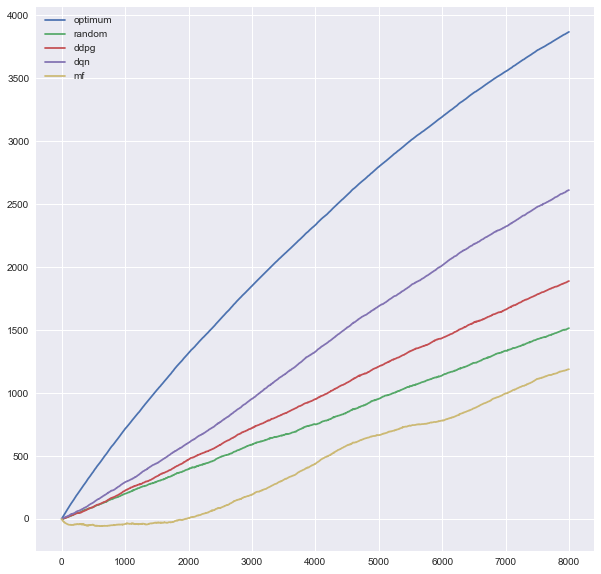

In [596]:
t = -1
plt.figure(figsize=(10, 10))
plt.plot(np.cumsum(opt[:t]), label='optimum')
plt.plot(np.cumsum(rand[:t]), label='random')
plt.plot(np.cumsum(ddpg_rs[:t]), label='ddpg')
plt.plot(np.cumsum(dqn_rs[:t]), label='dqn')
plt.plot(np.cumsum(mf_rs[:t]), label='mf')
plt.legend()
plt.show();